# Introduction

## Imports

In [1]:
from datetime import datetime
import itertools
import json
import math
import os
import random
import shutil
import sys
import time

In [2]:
from data.InstagramAPI.InstagramAPI import InstagramAPI
from data.plots import plot_confusion_matrix

Fail to import moviepy. Need only for Video upload.


In [3]:
from imutils import paths #pip install opencv-python
from IPython.display import Image, display
from sklearn import metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tensorflow as tf

### Install Packages

In [ ]:
#On Anaconda Prompt:
#pip install tensorflow

In [ ]:
pip install plotly

In [ ]:
pip install requests_toolbelt

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:
pip install sklearn

In [ ]:
pip install imutils

In [ ]:
pip install opencv-python

## Configs

In [21]:
TYPE = "travel"

DATE_BEGIN = datetime(2018,1,1,0,0).timestamp()

PATH_BASE                   = os.getcwd()
PATH_BASE_DATA              = os.path.join(PATH_BASE, "data")
PATH_1_CREATING_DATASET     = os.path.join(PATH_BASE_DATA, "1-Creating_Dataset")
PATH_FIRST_DATASET          = os.path.join(PATH_1_CREATING_DATASET, "Dataset")
PATH_FIRST_DATASET_TYPE     = os.path.join(PATH_FIRST_DATASET, TYPE)
PATH_FIRST_STATISTICS       = os.path.join(PATH_1_CREATING_DATASET, "Statistics")
PATH_FIRST_STATISTICS_TYPE  = os.path.join(PATH_FIRST_STATISTICS, TYPE)
PATH_2_PREPARING_DATASET    = os.path.join(PATH_BASE_DATA, "2-Preparing_Dataset")
PATH_CLEAN_DATASET          = os.path.join(PATH_2_PREPARING_DATASET, "Clean_Dataset")
PATH_CLEAN_DATASET_TYPE     = os.path.join(PATH_CLEAN_DATASET, TYPE)
PATH_3_PROCESSING_DATASET   = os.path.join(PATH_BASE_DATA, "3-Processing_Dataset")
PATH_SIMILARY_ACCOUNTS      = os.path.join(PATH_3_PROCESSING_DATASET, "Similary_Accounts")
PATH_SIMILARY_ACCOUNTS_TYPE = os.path.join(PATH_SIMILARY_ACCOUNTS, TYPE)
PATH_LABEL_COUNTER          = os.path.join(PATH_3_PROCESSING_DATASET, "Label_Counter")
PATH_LABEL_COUNTER_TYPE     = os.path.join(PATH_LABEL_COUNTER, TYPE)
PATH_4_CLASSIFYING_DATASET  = os.path.join(PATH_BASE_DATA, "4-Classifying_Dataset")

MIN_FOLLOWERS = 1000
MEDIA_TYPES = [1] #8
CANDIDATE = "N"
#CANDIDATE = -1
#CANDIDATE = 0
#CANDIDATE = 1
#CANDIDATE = 2

ONLY_WITH_COMMENTS = True

PRINT_IMAGE_AND_PREDICTED_LABELS = False
DISPLAY_IMAGE_LABEL = f"non_{TYPE}"

FOLLOWERS_RADIUS = 5
LIKES_COMMENTS_RADIUS = 95

RANDOMIZE_IF_EQUALS = True
#RANDOMIZE_IF_EQUALS = False

BATCH_SIZE = 60

#CNN_MODEL = "VGG16"
CNN_MODEL = "VGG19"
CNN_MODEL = "RESNET"
CNN_MODEL = "RESNET"
CNN_MODEL = "RESNET"
CV = 10

print(f"DATE_BEGIN                  : {DATE_BEGIN}")
print(f"PATH_BASE                   : {PATH_BASE}")
print(f"PATH_BASE_DATA              : {PATH_BASE_DATA}")
print(f"PATH_1_CREATING_DATASET     : {PATH_1_CREATING_DATASET}")
print(f"PATH_FIRST_DATASET          : {PATH_FIRST_DATASET}")
print(f"PATH_FIRST_DATASET_TYPE     : {PATH_FIRST_DATASET_TYPE}")
print(f"PATH_FIRST_STATISTICS       : {PATH_FIRST_STATISTICS}")
print(f"PATH_FIRST_STATISTICS_TYPE  : {PATH_FIRST_STATISTICS_TYPE}")
print(f"PATH_2_PREPARING_DATASET    : {PATH_2_PREPARING_DATASET}")
print(f"PATH_CLEAN_DATASET          : {PATH_CLEAN_DATASET}")
print(f"PATH_CLEAN_DATASET_TYPE     : {PATH_CLEAN_DATASET_TYPE}")
print(f"PATH_3_PROCESSING_DATASET   : {PATH_3_PROCESSING_DATASET}")
print(f"PATH_SIMILARY_ACCOUNTS      : {PATH_SIMILARY_ACCOUNTS}")
print(f"PATH_SIMILARY_ACCOUNTS_TYPE : {PATH_SIMILARY_ACCOUNTS_TYPE}")
print(f"PATH_LABEL_COUNTER          : {PATH_LABEL_COUNTER}")
print(f"PATH_LABEL_COUNTER_TYPE     : {PATH_LABEL_COUNTER_TYPE}")
print(f"PATH_4_CLASSIFYING_DATASET  : {PATH_4_CLASSIFYING_DATASET}")

DATE_BEGIN                  : 1514775600.0
PATH_BASE                   : D:\IC\tcc_insta
PATH_BASE_DATA              : D:\IC\tcc_insta\data
PATH_1_CREATING_DATASET     : D:\IC\tcc_insta\data\1-Creating_Dataset
PATH_FIRST_DATASET          : D:\IC\tcc_insta\data\1-Creating_Dataset\Dataset
PATH_FIRST_DATASET_TYPE     : D:\IC\tcc_insta\data\1-Creating_Dataset\Dataset\travel
PATH_FIRST_STATISTICS       : D:\IC\tcc_insta\data\1-Creating_Dataset\Statistics
PATH_FIRST_STATISTICS_TYPE  : D:\IC\tcc_insta\data\1-Creating_Dataset\Statistics\travel
PATH_2_PREPARING_DATASET    : D:\IC\tcc_insta\data\2-Preparing_Dataset
PATH_CLEAN_DATASET          : D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset
PATH_CLEAN_DATASET_TYPE     : D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\travel
PATH_3_PROCESSING_DATASET   : D:\IC\tcc_insta\data\3-Processing_Dataset
PATH_SIMILARY_ACCOUNTS      : D:\IC\tcc_insta\data\3-Processing_Dataset\Similary_Accounts
PATH_SIMILARY_ACCOUNTS_TYPE : D:\IC\tcc_insta\da

## Global Functions

In [22]:
def write_file(path_file, data, access_mode='a'):
    file = open(path_file, access_mode)
    if isinstance(data, list):
        for d in data:
            file.write(d)
    else:
        file.write(data)
    file.close()
    
def read_file(path_file, access_mode='r'):
    file = open(path_file, access_mode)
    data = file.readlines()
    file.close()  
    return data

def write_json(json_path, data, access_mode='w', encoding="utf-8"):
    with open(json_path, access_mode, encoding=encoding) as json_file:
        json.dump(data, json_file, indent=4, ensure_ascii=False)

def read_json(json_path, access_mode='r', encoding="utf-8"):
    with open(json_path, access_mode, encoding=encoding) as json_file:
        data = json.load(json_file)
    return data

##############################################

def get_accounts():
    list_accounts_file = read_file(os.path.join(PATH_1_CREATING_DATASET, f"{TYPE}_users.txt"))
    list_accounts = []
    for acc_file in list_accounts_file:
        acc = acc_file.strip().lower()
        if acc[0] != "#":
            list_accounts.append(acc)
    return list_accounts

def log_print(data):
    print(f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - {data}", flush=True)

def create_path(path):
    if not os.path.exists(path):
        os.makedirs(path)
        log_print(f"Path '{path}' was created.")

def delete_path(path):
    if os.path.exists(path):
        shutil.rmtree(path, ignore_errors=True)
        log_print(f"Path '{path}' was deleted.")

def random_sleep(min=0.1, max=3):
    time.sleep(round(random.uniform(min, max), 1))

##############################################

def remove_users_without_images(dataset_path, overview_file):
    type_folder = os.path.join(dataset_path, "Dataset", TYPE)
    for user_folder in next(os.walk(type_folder))[1]: #0 - root, 1 - dirs, 2 - files
        user_path = os.path.join(type_folder, user_folder)
        user_images_path = os.path.join(user_path, "images")
        try:
            posts_overview = read_json(os.path.join(user_path, overview_file))
            if (len(next(os.walk(user_images_path))[2]) == 0) or posts_overview["media_count_total"] == 0:
                log_print(user_folder)
                #error_log(user_folder, "RemoveUsersWithoutImages", "")
                write_file(os.path.join(dataset_path, f"{TYPE}_users_error.log"), [f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - RemoveUsersWithoutImages - {user_folder}", "\n"])
        except Exception as e:
            log_print(f"ERROR: {user_folder} - {e}")
            write_file(os.path.join(dataset_path, f"{TYPE}_users_error.log"), [f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - RemoveUsersWithoutImages - {user_folder} - {e}", "\n"])
            
def create_histogram(array, xlabel, ylabel, title, dataset_path, file_name, bins='auto', figsize=(7,6)):
    log_print(f"Creating {title} histogram...")
    h = plt.figure(figsize=figsize)
    n, bins, patches = plt.hist(array, bins=bins, edgecolor='black', linewidth=1)
    rotation = 65
    for i in range(len(bins)-1):
        if n[i] > 0:
            plt.text(bins[i]+((bins[i+1]-bins[i])/3), n[i]+(n[i]*0.02), str(math.ceil(n[i])), rotation=rotation)
    plt.grid(True)
    plt.xticks(bins, rotation=rotation)
    plt.style.use('seaborn-white')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(os.path.join(dataset_path, "Statistics", TYPE, file_name))
    log_print("Histogram created!")
            
def generate_statistics(dataset_path):
    list_accounts = get_accounts()
    df_statistics = pd.DataFrame()
    #total_count_media = 0
    log_print("Getting statistics...")
    
    array_likes = []
    array_comments = []
    array_likes_comments = []
    
    for acc in list_accounts:
        log_print(f"Executing account {acc}")
        user_file = read_json(os.path.join(dataset_path, "Dataset", TYPE, acc, "user_info.json"))
        posts_overview = read_json(os.path.join(dataset_path, "Dataset", TYPE, acc, "user_posts_overview.json"))
        #total_count_media += posts_overview["media_count_total"]
        
        min_likes = posts_overview["items"][0]["like_count"]
        max_likes = posts_overview["items"][0]["like_count"]
        min_comments = posts_overview["items"][0]["comment_count"]
        max_comments = posts_overview["items"][0]["comment_count"]
        min_likes_comments = posts_overview["items"][0]["like_count"]
        max_likes_comments = posts_overview["items"][0]["like_count"]
        
        pk_min_likes = posts_overview["items"][0]["pk"]
        pk_max_likes = posts_overview["items"][0]["pk"]
        pk_min_comments = posts_overview["items"][0]["pk"]
        pk_max_comments = posts_overview["items"][0]["pk"]
        pk_min_likes_comments = posts_overview["items"][0]["pk"]
        pk_max_likes_comments = posts_overview["items"][0]["pk"]
        
        for item in posts_overview["items"]:
            
            array_likes.append(item["like_count"])
            array_comments.append(item["comment_count"])
            array_likes_comments.append(item["like_count"] + item["comment_count"])
            
            if item["like_count"] < min_likes:
                pk_min_likes = item["pk"]
                min_likes = item["like_count"]
            
            if item["like_count"] > max_likes:
                pk_max_likes = item["pk"]
                max_likes = item["like_count"]
            
            if item["comment_count"] < min_comments:
                pk_min_comments = item["pk"]
                min_comments = item["comment_count"]
            
            if item["comment_count"] > max_comments:
                pk_max_comments = item["pk"]
                max_comments = item["comment_count"]
                
            if item["like_count"] + item["comment_count"] < min_likes_comments:
                pk_min_likes_comments = item["pk"]
                min_likes_comments = item["like_count"] + item["comment_count"]
            
            if item["like_count"] + item["comment_count"] > max_likes_comments:
                pk_max_likes_comments = item["pk"]
                max_likes_comments = item["like_count"] + item["comment_count"]
        
        new_row = {
            'user': acc,
            'followers_count': user_file["follower_count"],
            'media_count_total': int(math.ceil(posts_overview["media_count_total"])),
            'min_likes': int(math.ceil(min_likes)), 
            'max_likes': math.ceil(max_likes),
            'min_comments': math.ceil(min_comments),
            'max_comments': math.ceil(max_comments),
            'min_likes_comments': math.ceil(min_likes_comments),
            'max_likes_comments': math.ceil(max_likes_comments),
            'pk_min_likes': f"'{pk_min_likes}'",
            'pk_max_likes': f"'{pk_max_likes}'",
            'pk_min_comments': f"'{pk_min_comments}'",
            'pk_max_comments': f"'{pk_max_comments}'",
            'pk_min_likes_comments': f"'{pk_min_likes_comments}'",
            'pk_max_likes_comments': f"'{pk_max_likes_comments}'"
        }
        df_statistics = df_statistics.append(new_row, ignore_index=True)
    
    df_statistics = df_statistics.sort_values(by=['followers_count'], ascending=False)
    
    return {
        "df_statistics": df_statistics,
        "array_likes": array_likes,
        "array_comments": array_comments,
        "array_likes_comments": array_likes_comments
    }
    
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1 #IQR is interquartile range. 

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 *IQR)
    return df.loc[filter]

def generate_boxplots(df_statistics, dataset_path):
    file_name = "statistics_with_outliers.csv"
    log_print(f"Creating file {file_name}")
    df_statistics_with_outliers = df_statistics.copy()
    df_statistics_with_outliers.to_csv(os.path.join(dataset_path, "Statistics", TYPE, file_name), index=False)
    log_print(f"File {file_name} created!")

    file_name = "boxplot_with_outliers.png"
    log_print(f"Creating file {file_name}")
    plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
    plt.clf()
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=df_statistics["followers_count"])
    ax.get_figure().savefig(os.path.join(dataset_path, "Statistics", TYPE, file_name))
    log_print(f"File {file_name} created!")
    
    file_name = "boxplot_without_outliers.png"
    log_print(f"Creating file {file_name}")
    plt.clf()
    sns.set_theme(style="whitegrid")
    ax = sns.boxplot(x=df_statistics["followers_count"], showfliers=False)
    ax.get_figure().savefig(os.path.join(dataset_path, "Statistics", TYPE, file_name))
    log_print(f"File {file_name} created!")
    
    log_print("Removing outliers...")
    df_statistics = remove_outliers(df_statistics, "followers_count")
    df_statistics = df_statistics.sort_values(by=['followers_count'], ascending=False)
    
    file_name = "statistics_without_outliers.csv"
    log_print(f"Creating file {file_name}")
    df_statistics_without_outliers = df_statistics.copy()
    df_statistics_without_outliers.to_csv(os.path.join(dataset_path, "Statistics", TYPE, file_name), index=False)
    log_print(f"File {file_name} created!")
    
    return df_statistics
    
##############################################

def loop_images_extract_features(imagePaths, labels, csv):
    # loop over the images in batches
    for (b, i) in enumerate(range(0, len(imagePaths), BATCH_SIZE)):
        # extract the batch of images and labels, then initialize the
        # list of actual images that will be passed through the network
        # for feature extraction
        log_print("[INFO] processing batch {}/{}".format(b + 1, int(np.ceil(len(imagePaths) / float(BATCH_SIZE)))))
        batchPaths = imagePaths[i:i + BATCH_SIZE]
        batchLabels = le.transform(labels[i:i + BATCH_SIZE])
        batchImages = []

        # loop over the images and labels in the current batch
        for imagePath in batchPaths:
            # load the input image using the Keras helper utility while ensuring the image is resized to 224x224 pixels
            image = load_img(imagePath, target_size=(224, 224))
            image = img_to_array(image)

            # preprocess the image by (1) expanding the dimensions and
            # (2) subtracting the mean RGB pixel intensity from the ImageNet dataset
            image = np.expand_dims(image, axis=0)
            image = imagenet_utils.preprocess_input(image)

            # add the image to the batch
            batchImages.append(image)

        # pass the images through the network and use the outputs as
        # our actual features, then reshape the features into a
        # flattened volume
        batchImages = np.vstack(batchImages)
        features = model.predict(batchImages, batch_size=BATCH_SIZE)
        features = features.reshape((features.shape[0], 7 * 7 * 512))

        # loop over the class labels and extracted features
        for (label, vec) in zip(batchLabels, features):
            # construct a row that exists of the class label and
            # extracted features
            vec = ",".join([str(v) for v in vec])
            csv.write(f"{label},{vec}\n")
            
def load_data_split(splitPath):
    # initialize the data and labels
    data = []
    labels = []

    # loop over the rows in the data split file
    for row in open(splitPath):
        # extract the class label and features from the row
        row = row.strip().split(",")
        label = row[0]
        features = np.array(row[1:], dtype="float")

        # update the data and label lists
        data.append(features)
        labels.append(label)

    # convert the data and labels to NumPy arrays
    data = np.array(data)
    labels = np.array(labels)

    # return a tuple of the data and labels
    return (data, labels)

##################################################

def error_log(acc, log_type, e):
    log_print(f"Failed to process {acc} account: {str(e)}")
    log_print(f"Appending to file {TYPE}_users_error.log")
    write_file(os.path.join(PATH_1_CREATING_DATASET, f"{TYPE}_users_error.log"), \
               [f"{datetime.now().strftime('%Y-%m-%d %H:%M:%S')} - {log_type} - {acc} - {str(e)}", "\n"])
    print("**********************************************\n")

##################################################

def download_image(url, path):
    resp = requests.get(url, stream=True, timeout=20)  # Open the url image, set stream to True, this will return the stream content.
    local_file = open(path, 'wb')  # Open a local file with wb ( write binary ) permission.
    resp.raw.decode_content = True  # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
    shutil.copyfileobj(resp.raw, local_file)  # Copy the response stream raw data to local image file.

### Reset Type

In [ ]:
delete_path(PATH_FIRST_DATASET_TYPE)
delete_path(PATH_FIRST_STATISTICS_TYPE)
delete_path(PATH_CLEAN_DATASET_TYPE)
delete_path(PATH_SIMILARY_ACCOUNTS_TYPE)
delete_path(PATH_LABEL_COUNTER_TYPE)

### Checking Folders

In [ ]:
#create_path(PATH_BASE_DATA)
#create_path(PATH_1_CREATING_DATASET)
#create_path(PATH_FIRST_DATASET)
create_path(PATH_FIRST_DATASET_TYPE)
#create_path(PATH_FIRST_STATISTICS)
create_path(PATH_FIRST_STATISTICS_TYPE)
#create_path(PATH_2_PREPARING_DATASET)
#create_path(PATH_CLEAN_DATASET)
create_path(PATH_CLEAN_DATASET_TYPE)
#create_path(PATH_3_PROCESSING_DATASET)
#create_path(PATH_SIMILARY_ACCOUNTS)
create_path(PATH_SIMILARY_ACCOUNTS_TYPE)
#create_path(PATH_LABEL_COUNTER)
create_path(PATH_LABEL_COUNTER_TYPE)
create_path(PATH_4_CLASSIFYING_DATASET)

# Creating Dataset

## Getting Data

In [10]:
file_logins = read_json(os.path.join(PATH_1_CREATING_DATASET, "logins.json"))
    
def next_login(id_login, len_logins):
    id_login += 1
    random_sleep()
    return id_login

def get_login(id_login=0, logins=file_logins["Logins"]):
    api = None
    logged = False
    while not logged:
        if not logins[id_login]["temporaly_blocked"]:
            log_print("Trying login in account: " + logins[id_login]["username"])
            api = InstagramAPI(logins[id_login]["username"], logins[id_login]["password"])
            logged = api.login()
            if not logged:
                id_login = next_login(id_login, len(logins))
        else:
            id_login = next_login(id_login, len(logins))
    return (api, id_login)

def get_from_api(api_function, api, id_login, params):

    aux_apilastjson = ""
    while True:
        
        if api_function == "searchUsername":
            api.searchUsername(params["acc"])
        elif api_function == "getUserFeed":
            if params["next_max_id"] == None:
                api.getUserFeed(params["user"]["pk"], minTimestamp=int(DATE_BEGIN))
            else:
                api.getUserFeed(params["user"]["pk"], maxid=params["next_max_id"], minTimestamp=int(DATE_BEGIN))

        log_print(f"{api_function}-status_code: {api.LastResponse.status_code}")
        if api.LastResponse.status_code == 560 or api.LastResponse.status_code == 500:
            log_print("Retry...")
            continue
        elif api.LastResponse.status_code == 429 or ('feedback_message' in api.LastJson and 'We restrict certain activity to protect our community. Based on your use, this action will be unavailable for you until' in api.LastJson["feedback_message"]) or ('message' in api.LastJson and api.LastJson["message"] == 'challenge_required'):
            (api, id_login) = get_login(id_login=id_login+1)
        elif api.LastResponse.status_code != 200:
            log_print(f"LastResponse: {api.LastResponse}")
            if aux_apilastjson != api.LastJson:
                log_print(f"LastJson: {api.LastJson}")
                raise Exception(f"{api.LastResponse.status_code}-{api.LastJson}")
            else:
                raise Exception(f"{api.LastResponse.status_code}")
        else:
            break
        
        aux_apilastjson = api.LastJson
        random_sleep()
    
    return (api, id_login)

def search_username(api, id_login, acc):
    log_print(f"Searching username {acc}")

    params = {}
    params["acc"] = acc
    (api, id_login) = get_from_api("searchUsername", api, id_login, params)
    
    return (api, id_login)

def create_file_user_info(api, id_login, acc):
    
    (api, id_login) = search_username(api, id_login, acc)
    
    imgs_user = {}
    imgs_user["user"] = acc
    imgs_user["downloaded"] = 0

    user = api.LastJson["user"]
    
    if user["follower_count"] >= MIN_FOLLOWERS:
        create_path(os.path.join(PATH_FIRST_DATASET_TYPE, acc))
        log_print("Creating file user_info")
        user["collected_at"] = datetime.timestamp(datetime.now())
        write_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_info.json"), user)
        log_print("File user_info created")
    else:
        raise Exception(f"User has fewer followers than {MIN_FOLLOWERS}")
    
    return (api, id_login, user,)

def get_user_feed(api, id_login, user, next_max_id=None):  
    
    params = {}
    params["next_max_id"] = next_max_id
    params["user"] = user
    (api, id_login) = get_from_api("getUserFeed", api, id_login, params)
    
    return (api, id_login)

def create_file_user_posts(api, id_login, user):
    log_print("Creating file user_posts")
    (api, id_login) = get_user_feed(api, id_login, user)
        
    posts = api.LastJson

    while (posts["more_available"]):
        random_sleep()
        aux_bool = False
        (api, id_login) = get_user_feed(api, id_login, user, posts["next_max_id"])

        posts["items"].extend(api.LastJson["items"])
        posts["num_results"] += api.LastJson["num_results"]
        posts["more_available"] =  api.LastJson["more_available"]
        if posts["more_available"]:
            posts["next_max_id"] = api.LastJson["next_max_id"]
        else:
            del posts['next_max_id']
        posts["auto_load_more_enabled"] = api.LastJson["auto_load_more_enabled"]
        posts["status"] = api.LastJson["status"]
        
    posts["collected_at"] = datetime.timestamp(datetime.now())
    if posts["num_results"] > 0:
        write_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_posts.json"), posts)
        log_print("File user_posts created")
    else:
        raise Exception(f"User has 0 posts")
    
    return (api, id_login, posts)

In [ ]:
if not os.path.exists(os.path.join(PATH_1_CREATING_DATASET, f"{TYPE}_users.bkp")):
    shutil.copyfile(os.path.join(PATH_1_CREATING_DATASET, f"{TYPE}_users.txt"), os.path.join(PATH_1_CREATING_DATASET, f"{TYPE}_users.bkp"))

(api, id_login) = get_login()

log_print("Type: " + TYPE)
log_print("Starting...\n")

list_accounts = get_accounts()
for acc in list_accounts:
    try:
        
        (api, id_login, user) = create_file_user_info(api, id_login, acc)
        (api, id_login, posts) = create_file_user_posts(api, id_login, user)
            
    except Exception as e:
        error_log(acc, "GettingData", e)
    else:
        log_print(f"Account {acc} successfully processed")
        print("**********************************************\n")

log_print("Finished")

## Creating Overview

In [ ]:
def get_candidate(post):
    if CANDIDATE != "N": 
        candidate_aux = CANDIDATE
        while (candidate_aux < 0 and abs(candidate_aux) > len(post["image_versions2"]["candidates"])) or \
            (candidate_aux >= 0 and candidate_aux >= len(post["image_versions2"]["candidates"])):
            if candidate_aux > 0:
                candidate_aux -= 1
            elif candidate_aux < 0:
                candidate_aux += 1
    else:
        candidate_aux = -1
        while post["image_versions2"]["candidates"][candidate_aux]["width"] < 500 or post["image_versions2"]["candidates"][candidate_aux]["height"] < 500:
            candidate_aux -= 1
            if abs(candidate_aux) > len(post["image_versions2"]["candidates"]):
                return None
    
    return candidate_aux

def create_file_user_posts_overview(posts):
    
    log_print("Creating file user_posts_overview")
    
    media_count_total = 0
    posts_overview = {}
    posts_overview["collected_at"] = posts["collected_at"]
    posts_overview["num_results"] = posts["num_results"]
    posts_overview["items"] = []
    
    for post in posts["items"]:
        if not post["media_type"] in MEDIA_TYPES:
            continue
        if ONLY_WITH_COMMENTS and "comments_disabled" in post:
            continue
            
        post_overview = {}
        post_overview["pk"] = post["pk"]
        post_overview["id"] = post["id"]
        post_overview["taken_at"] = post["taken_at"]
        post_overview["taken_at_year"] = datetime.fromtimestamp(post_overview["taken_at"]).year

        post_overview["caption_text"] = ""
        if not post["caption"] is None:
            post_overview["caption_text"] = post["caption"]["text"]

        post_overview["media_type"] = post["media_type"]
        post_overview["images"] = []
        if post_overview["media_type"] == 1:
            post_overview["media_count"] = 1
            
            candidate_aux = get_candidate(post)
            
            if candidate_aux == None:
                continue
            
            image = {}
            image["pk"] = post_overview["pk"]
            image["width"] = post["image_versions2"]["candidates"][candidate_aux]["width"]
            image["height"] = post["image_versions2"]["candidates"][candidate_aux]["height"]
            image["url"] = post["image_versions2"]["candidates"][candidate_aux]["url"]
            post_overview["images"].append(image)
        elif post_overview["media_type"] == 8:
            post_overview["media_count"] = post["carousel_media_count"]
            for carousel_post in post["carousel_media"]:
                
                candidate_aux = get_candidate(carousel_post)
                
                image = {}
                image["pk"] = carousel_post["pk"]
                image["width"] = carousel_post["image_versions2"]["candidates"][candidate_aux]["width"]
                image["height"] = carousel_post["image_versions2"]["candidates"][candidate_aux]["height"]
                image["url"] = carousel_post["image_versions2"]["candidates"][candidate_aux]["url"]
                post_overview["images"].append(image)

        media_count_total += post_overview["media_count"]
        
        post_overview["location"] = None
        if "location" in post:
            post_overview["location"] = post["location"]

        post_overview["like_count"] = post["like_count"]

        post_overview["comments_disabled"] = False
        if "comments_disabled" in post:
            post_overview["comments_disabled"] = post["comments_disabled"]
        if post_overview["comments_disabled"]:
            post_overview["comment_count"] = 0
        else:
            post_overview["comment_count"] = post["comment_count"]

        post_overview["like_comment_count"] = post_overview["like_count"] + post_overview["comment_count"]
            
        post_overview["caption_text_length"] = len(post_overview["caption_text"])
        hashtags = [word[1:] for word in post_overview["caption_text"].split() if word[0] == '#']
        post_overview["caption_hashtags_count"] = len(hashtags)
        post_overview["caption_hashtags"] = []
        
        if post_overview["caption_hashtags_count"] > 0:
            post_overview["caption_hashtags"] = hashtags
        post_overview["timestamp_duration"] = posts_overview["collected_at"] - post_overview["taken_at"]
        post_overview["likes_by_duration"] = post_overview["like_count"] / post_overview["timestamp_duration"]
        post_overview["comments_by_duration"] = post_overview["comment_count"] / post_overview["timestamp_duration"]

        posts_overview["items"].append(post_overview)
            
    posts_overview["media_count_total"] = media_count_total
    write_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_posts_overview.json"), posts_overview)
    log_print("File user_posts_overview created")

In [ ]:
list_accounts = get_accounts()
for acc in list_accounts:
    
    try:
        log_print(f"Processing account {acc}")

        posts = read_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_posts.json"))

        create_file_user_posts_overview(posts)

    except Exception as e:
        error_log(acc, "CreatingOverview", e)
    else:
        log_print(f"Account {acc} successfully processed")
        print("**********************************************\n")
        
log_print("Finished")

## Downloading Images

In [ ]:
again = True
while again:
    again = False
    list_accounts = get_accounts()
    for acc in list_accounts:

        try:
            log_print(f"Processing account {acc}")
            
            create_path(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images"))
                
            posts_overview = read_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_posts_overview.json"))

            log_print("Downloading posts pictures:")
            imgs_user_downloaded = len(list(next(os.walk(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images")))[2])) - 1 #0 - root, 1 - dirs, 2 - files
            if imgs_user_downloaded <= 0:
                imgs_user_downloaded = 0
            if imgs_user_downloaded < posts_overview['media_count_total']:
                for post in posts_overview["items"]:
                    for image in post["images"]:
                        if not os.path.exists(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images", str(image["pk"]) + ".jpg")):
                            download_image(image['url'], os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images", f"{image['pk']}.jpg"))
                            imgs_user_downloaded += 1
                            log_print(f"{acc} - {imgs_user_downloaded}/{posts_overview['media_count_total']}")
                
            log_print(f"{imgs_user_downloaded} image(s) downloaded")
        except Exception as e:
            error_log(acc, "DownloadingImages", e)
            again = True
        else:
            log_print(f"Account {acc} successfully processed")
            print("**********************************************\n")
            
log_print("Finished")

## Statistics

### Remove Users Without Images

In [ ]:
remove_users_without_images(PATH_1_CREATING_DATASET, "user_posts_overview.json")

### Generate Statistics

In [ ]:
statistics = generate_statistics(PATH_1_CREATING_DATASET)

In [ ]:
statistics = generate_boxplots(statistics["df_statistics"], PATH_1_CREATING_DATASET)
log_print("REMOVA OS USUÁRIOS DO TXT")

In [ ]:
statistics = generate_statistics(PATH_1_CREATING_DATASET)

In [ ]:
create_histogram(statistics['df_statistics']['followers_count'].tolist(), "Seguidores", "Frequência", "Frequência de seguidores dos usuários", PATH_1_CREATING_DATASET, "histogram_followers_without_outliers.png")
create_histogram(statistics['array_likes'], "Curtidas", "Frequência", "Frequência de curtidas das imagens", PATH_1_CREATING_DATASET, "histogram_likes_without_outliers.png", 40, (18,6))
create_histogram(statistics['array_comments'], "Comentários", "Frequência", "Frequência de comentários das imagens", PATH_1_CREATING_DATASET, "histogram_comments_without_outliers.png", 40, (18,6))
create_histogram(statistics['array_likes_comments'], "Curtidas+Comentários", "Frequência", "Frequência de curtidas+comentários das imagens", PATH_1_CREATING_DATASET, "histogram_likes+comments_without_outliers.png", 40, (18,6))

# Preparing Dataset

## CNN Clean Configs

In [23]:
PATH_CNN_CLEAN_BASE                       = os.path.join(PATH_2_PREPARING_DATASET, "CNN_Clean")
PATH_CNN_CLEAN_DATASET                    = os.path.join(PATH_CNN_CLEAN_BASE, "CNN_Dataset")
PATH_CNN_CLEAN_DATASET_TYPE               = os.path.join(PATH_CNN_CLEAN_DATASET, TYPE)
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN         = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE, "Train")
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE    = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN, TYPE)
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN, f"non_{TYPE}")
PATH_CNN_CLEAN_DATASET_TYPE_TEST          = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE, "Test")
PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE     = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE_TEST, TYPE)
PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE  = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE_TEST, f"non_{TYPE}")
PATH_CNN_CLEAN_OUTPUT                     = os.path.join(PATH_CNN_CLEAN_BASE, "CNN_Output")
PATH_CNN_CLEAN_OUTPUT_TYPE                = os.path.join(PATH_CNN_CLEAN_OUTPUT, TYPE)

print(f"PATH_CNN_CLEAN_BASE                      : {PATH_CNN_CLEAN_BASE}")
print(f"PATH_CNN_CLEAN_DATASET                   : {PATH_CNN_CLEAN_DATASET}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE              : {PATH_CNN_CLEAN_DATASET_TYPE}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TRAIN        : {PATH_CNN_CLEAN_DATASET_TYPE_TRAIN}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE   : {PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE: {PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TEST         : {PATH_CNN_CLEAN_DATASET_TYPE_TEST}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE    : {PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE}")
print(f"PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE : {PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE}")
print(f"PATH_CNN_CLEAN_OUTPUT                    : {PATH_CNN_CLEAN_OUTPUT}")
print(f"PATH_CNN_CLEAN_OUTPUT_TYPE               : {PATH_CNN_CLEAN_OUTPUT_TYPE}")

PATH_CNN_CLEAN_BASE                      : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean
PATH_CNN_CLEAN_DATASET                   : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset
PATH_CNN_CLEAN_DATASET_TYPE              : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN        : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel\Train
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE   : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel\Train\travel
PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE: D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel\Train\non_travel
PATH_CNN_CLEAN_DATASET_TYPE_TEST         : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel\Test
PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE    : D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Dataset\travel\Test\travel
PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE : D:\IC\tcc_insta\data\2-Pre

### Reset Type

In [ ]:
delete_path(PATH_CNN_CLEAN_DATASET_TYPE)
delete_path(PATH_CNN_CLEAN_OUTPUT_TYPE)

### Checking Folders

In [24]:
#create_path(PATH_CNN_CLEAN_BASE)
#create_path(PATH_CNN_CLEAN_DATASET)
#create_path(PATH_CNN_CLEAN_DATASET_TYPE)
#create_path(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN)
create_path(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE)
create_path(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE)
#create_path(PATH_CNN_CLEAN_DATASET_TYPE_TEST)
create_path(PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE)
create_path(PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE)
#create_path(PATH_CNN_CLEAN_OUTPUT)
create_path(PATH_CNN_CLEAN_OUTPUT_TYPE)

2021-10-05 00:04:54 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\CNN_Clean\CNN_Output\travel' was created.


## Renaming Images

In [25]:
def rename_images(img_list, file_path, prefix):
    count = 0
    for img in img_list:
        os.rename(os.path.join(file_path, img), os.path.join(file_path, f"{prefix}_{count}.jpg"))
        count += 1
    
train_type_images = next(os.walk(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE))[2] #0 - root, 1 - dirs, 2 - files
train_nontype_images = next(os.walk(PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE))[2] #0 - root, 1 - dirs, 2 - files
test_type_images = next(os.walk(PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE))[2] #0 - root, 1 - dirs, 2 - files
test_nontype_images = next(os.walk(PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE))[2] #0 - root, 1 - dirs, 2 - files

rename_images(train_type_images, PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_TYPE, 1)
rename_images(train_nontype_images, PATH_CNN_CLEAN_DATASET_TYPE_TRAIN_NONTYPE, 0)
rename_images(test_type_images, PATH_CNN_CLEAN_DATASET_TYPE_TEST_TYPE, 1)
rename_images(test_nontype_images, PATH_CNN_CLEAN_DATASET_TYPE_TEST_NONTYPE, 0)

log_print("All images has been renamed")

2021-10-05 00:06:19 - All images has been renamed


## Extract Features

In [ ]:
le = LabelEncoder()
le.fit([f"non_{TYPE}", TYPE])
# serialize the label encoder to disk
joblib.dump(le, os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "le.pickle"))

# load the VGG16 network and initialize the label encoder
log_print("[INFO] loading network...")
model = tf.keras.applications.VGG16(weights="imagenet", include_top=False)

# loop over the data splits
for split in (["Train", "Test"]):
    # grab all image paths in the current split
    log_print(f"[INFO] processing '{split} split'...")
    p = os.path.join(PATH_CNN_CLEAN_DATASET_TYPE, split)
    imagePaths = list(paths.list_images(p))

    # randomly shuffle the image paths and then extract the class
    # labels from the file paths
    random.shuffle(imagePaths)

    labels = [p.split(os.path.sep)[-2] for p in imagePaths]

    # open the output CSV file for writing
    csv = open(os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, split + ".csv"), "w")

    loop_images_extract_features(imagePaths, labels, csv)

    # close the CSV file
    csv.close()
log_print("Finished")

2021-10-05 00:06:58 - [INFO] loading network...
2021-10-05 00:06:59 - [INFO] processing 'Train split'...
2021-10-05 00:06:59 - [INFO] processing batch 1/64
2021-10-05 00:07:11 - [INFO] processing batch 2/64
2021-10-05 00:07:23 - [INFO] processing batch 3/64
2021-10-05 00:07:35 - [INFO] processing batch 4/64
2021-10-05 00:07:47 - [INFO] processing batch 5/64
2021-10-05 00:07:58 - [INFO] processing batch 6/64
2021-10-05 00:08:14 - [INFO] processing batch 7/64
2021-10-05 00:08:29 - [INFO] processing batch 8/64
2021-10-05 00:08:44 - [INFO] processing batch 9/64
2021-10-05 00:08:56 - [INFO] processing batch 10/64
2021-10-05 00:09:10 - [INFO] processing batch 11/64
2021-10-05 00:09:22 - [INFO] processing batch 12/64
2021-10-05 00:09:35 - [INFO] processing batch 13/64
2021-10-05 00:09:49 - [INFO] processing batch 14/64
2021-10-05 00:10:03 - [INFO] processing batch 15/64
2021-10-05 00:10:18 - [INFO] processing batch 16/64
2021-10-05 00:10:34 - [INFO] processing batch 17/64
2021-10-05 00:10:48 

## Train

2021-10-04 19:14:04 - [INFO] loading data...
2021-10-04 19:14:33 - [INFO] training model...
2021-10-04 19:14:44 - [INFO] evaluating...
2021-10-04 19:14:44 -               precision    recall  f1-score   support

        food       0.99      0.96      0.98       700
    non_food       0.97      0.99      0.98       700

    accuracy                           0.98      1400
   macro avg       0.98      0.98      0.98      1400
weighted avg       0.98      0.98      0.98      1400



D:\Programs\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Normalized confusion matrix
[[0.96428571 0.03571429]
 [0.01285714 0.98714286]]
2021-10-04 19:14:44 - [INFO] saving model...


['D:\\IC\\tcc_insta\\data\\2-Preparing_Dataset\\CNN_Clean\\CNN_Output\\food\\model.pickle']

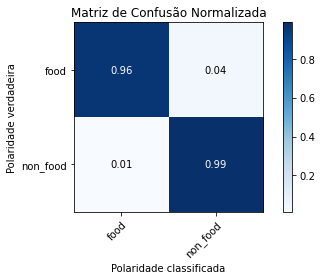

In [15]:
# derive the paths to the training and testing CSV files
trainingPath = os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "Train.csv")
testingPath = os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "Test.csv")

# load the data from disk
log_print("[INFO] loading data...")
(trainX, trainY) = load_data_split(trainingPath)
(testX, testY) = load_data_split(testingPath)

# load the label encoder from disk
le = joblib.load(os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "le.pickle"))

# train the model
log_print("[INFO] training model...")
model = LogisticRegression(solver="lbfgs", multi_class="auto")
model.fit(trainX, trainY)

# evaluate the model
log_print("[INFO] evaluating...")
preds = model.predict(testX)
log_print(metrics.classification_report(testY, preds, target_names=le.classes_))
plot_confusion_matrix(testY, preds, np.array(le.classes_), normalize=True)

# serialize the model to disk
log_print("[INFO] saving model...")
plt.savefig(os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "test_normalized.svg"))
joblib.dump(model, os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "model.pickle"))

## Clean

In [16]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
testX = None
textY = None
trainX = None
trainY = None

In [17]:
def process_image(row):
    retry = 1
    while retry <= 3:
        try:
            retry += 1
            img = load_img(row["path_image"], target_size=(224, 224))
            img = img_to_array(img)
            img = np.expand_dims(img, axis=0)
            img = imagenet_utils.preprocess_input(img)
            return img
        except Exception as e:
            log_print(f"Retrying ({retry}): Downloading {row['url']}")
            download_image(row["url"], row["path_image"])
    raise Exception(f"{row['path_image']}")
    

In [18]:
le = joblib.load(os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "le.pickle"))
model = joblib.load(os.path.join(PATH_CNN_CLEAN_OUTPUT_TYPE, "model.pickle"))

list_accounts = get_accounts()

log_print("[INFO] loading network...")
vgg16 = tf.keras.applications.VGG16(weights="imagenet", include_top=False)

for acc in list_accounts:

    log_print(f"Processing account: {acc}")

    try:
    
        posts_overview = read_json(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_posts_overview.json"))
        if len(posts_overview["items"]) > 0:
            df_posts_overview = None
            df_posts_overview = pd.DataFrame(posts_overview["items"])
            df_posts_overview = df_posts_overview.apply(lambda x: [ (x["pk"], image["pk"], os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images", f"{image['pk']}.jpg"), image["url"]) for image in x["images"]], axis=1)
            df_posts_overview = pd.DataFrame(list(itertools.chain.from_iterable(df_posts_overview.to_list())), columns=["pk_item", "pk_image", "path_image", "url"])

            tam = len(df_posts_overview.index)
            for offset in range(0, tam, BATCH_SIZE):
                log_print(f"Batch {round(((offset+1)/BATCH_SIZE)+0.5)}/{round((tam/BATCH_SIZE)+0.5)}")

                log_print("Creating image_values")
                df_posts_overview.loc[offset:offset+BATCH_SIZE,'image_values'] = df_posts_overview.apply(lambda row: process_image(row), axis=1)

                log_print("Predicting")
                batchImages = np.vstack(df_posts_overview.loc[offset:offset+BATCH_SIZE,'image_values'])
                features = vgg16.predict(batchImages, batch_size=BATCH_SIZE)
                features = features.reshape((features.shape[0], 7 * 7 * 512))
                resul = model.predict(features)
                df_posts_overview.loc[offset:offset+BATCH_SIZE,'predicted_label'] = resul

                if PRINT_IMAGE_AND_PREDICTED_LABELS:
                    log_print("Showing images and predicted labels:")
                    for index, row in df_posts_overview.loc[offset:offset+BATCH_SIZE].iterrows():
                        if DISPLAY_IMAGE_LABEL == "ALL" or DISPLAY_IMAGE_LABEL == le.classes_[int(row['predicted_label'])]:
                            display(Image(filename=row['path_image']))
                        log_print(f"Path: {row['path_image']}")
                        log_print(f"Label: {le.classes_[int(row['predicted_label'])]}") 
                    print("**********************************************\n")

            log_print("Creating user_posts_overview_clean.json") 

            posts_overview_clean = {}
            posts_overview_clean["collected_at"] = posts_overview["collected_at"]
            posts_overview_clean["item_count"] = 0
            posts_overview_clean["items"] = []
            posts_overview_clean["image_count_total"] = 0

            for index, row in df_posts_overview.iterrows():
                if le.classes_[int(row['predicted_label'])] == TYPE:
                    for item in posts_overview["items"]:
                        if row['pk_item'] == item["pk"]:
                            item_copy = item.copy()
                            item_copy["images"] = []
                            item_copy["image_count"] = 0

                            for image in item["images"]:
                                if row['pk_image'] == image["pk"]:
                                    item_copy["images"].append(image)
                                    item_copy["image_count"] += 1
                                    posts_overview_clean["image_count_total"] += 1
                                    break

                            if item_copy["image_count"] > 0:
                                posts_overview_clean["items"].append(item_copy)
                                posts_overview_clean["item_count"] += 1

                            break

            if posts_overview_clean["image_count_total"] > 0:
                create_path(os.path.join(PATH_CLEAN_DATASET_TYPE, acc))
                write_json(os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "user_posts_overview_clean.json"), posts_overview_clean)
    except Exception as e:
        error_log(acc, "Cleaning", e)
    print("**********************************************\n")
log_print("Finished.")
                    
    

2021-10-04 19:15:27 - [INFO] loading network...
2021-10-04 19:15:28 - Processing account: abhishekdekate
2021-10-04 19:15:28 - Batch 1/10
2021-10-04 19:15:28 - Creating image_values
2021-10-04 19:15:41 - Predicting
2021-10-04 19:15:50 - Batch 2/10
2021-10-04 19:15:50 - Creating image_values
2021-10-04 19:16:02 - Predicting
2021-10-04 19:16:12 - Batch 3/10
2021-10-04 19:16:12 - Creating image_values
2021-10-04 19:16:24 - Predicting
2021-10-04 19:16:35 - Batch 4/10
2021-10-04 19:16:35 - Creating image_values
2021-10-04 19:16:46 - Predicting
2021-10-04 19:16:57 - Batch 5/10
2021-10-04 19:16:57 - Creating image_values
2021-10-04 19:17:10 - Predicting
2021-10-04 19:17:20 - Batch 6/10
2021-10-04 19:17:20 - Creating image_values
2021-10-04 19:17:32 - Predicting
2021-10-04 19:17:42 - Batch 7/10
2021-10-04 19:17:42 - Creating image_values
2021-10-04 19:17:54 - Predicting
2021-10-04 19:18:05 - Batch 8/10
2021-10-04 19:18:05 - Creating image_values
2021-10-04 19:18:16 - Predicting
2021-10-04 19:1

**********************************************

2021-10-04 19:36:01 - Processing account: bakerella
2021-10-04 19:36:01 - Batch 1/2
2021-10-04 19:36:01 - Creating image_values
2021-10-04 19:36:03 - Predicting
2021-10-04 19:36:14 - Batch 2/2
2021-10-04 19:36:14 - Creating image_values
2021-10-04 19:36:16 - Predicting
2021-10-04 19:36:25 - Creating user_posts_overview_clean.json
2021-10-04 19:36:26 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\bakerella' was created.
**********************************************

2021-10-04 19:36:26 - Processing account: bliu07
2021-10-04 19:36:26 - Batch 1/1
2021-10-04 19:36:26 - Creating image_values
2021-10-04 19:36:27 - Predicting
2021-10-04 19:36:35 - Creating user_posts_overview_clean.json
2021-10-04 19:36:35 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\bliu07' was created.
**********************************************

2021-10-04 19:36:35 - Processing account: blondieandrye
2021-10-04 19:36:35 - Batch

**********************************************

2021-10-04 19:49:21 - Processing account: cookieandkate
2021-10-04 19:49:21 - Batch 1/18
2021-10-04 19:49:21 - Creating image_values
2021-10-04 19:49:47 - Predicting
2021-10-04 19:49:57 - Batch 2/18
2021-10-04 19:49:57 - Creating image_values
2021-10-04 19:50:18 - Predicting
2021-10-04 19:50:29 - Batch 3/18
2021-10-04 19:50:29 - Creating image_values
2021-10-04 19:50:49 - Predicting
2021-10-04 19:51:00 - Batch 4/18
2021-10-04 19:51:00 - Creating image_values
2021-10-04 19:51:19 - Predicting
2021-10-04 19:51:30 - Batch 5/18
2021-10-04 19:51:30 - Creating image_values
2021-10-04 19:51:53 - Predicting
2021-10-04 19:52:04 - Batch 6/18
2021-10-04 19:52:04 - Creating image_values
2021-10-04 19:52:27 - Predicting
2021-10-04 19:52:40 - Batch 7/18
2021-10-04 19:52:40 - Creating image_values
2021-10-04 19:53:00 - Predicting
2021-10-04 19:53:11 - Batch 8/18
2021-10-04 19:53:11 - Creating image_values
2021-10-04 19:53:31 - Predicting
2021-10-04 19:53

2021-10-04 20:16:10 - Predicting
2021-10-04 20:16:21 - Batch 4/11
2021-10-04 20:16:21 - Creating image_values
2021-10-04 20:16:33 - Predicting
2021-10-04 20:16:44 - Batch 5/11
2021-10-04 20:16:44 - Creating image_values
2021-10-04 20:16:59 - Predicting
2021-10-04 20:17:11 - Batch 6/11
2021-10-04 20:17:11 - Creating image_values
2021-10-04 20:17:24 - Predicting
2021-10-04 20:17:35 - Batch 7/11
2021-10-04 20:17:35 - Creating image_values
2021-10-04 20:17:48 - Predicting
2021-10-04 20:17:59 - Batch 8/11
2021-10-04 20:17:59 - Creating image_values
2021-10-04 20:18:14 - Predicting
2021-10-04 20:18:25 - Batch 9/11
2021-10-04 20:18:25 - Creating image_values
2021-10-04 20:18:37 - Predicting
2021-10-04 20:18:48 - Batch 10/11
2021-10-04 20:18:48 - Creating image_values
2021-10-04 20:19:01 - Predicting
2021-10-04 20:19:13 - Batch 11/11
2021-10-04 20:19:13 - Creating image_values
2021-10-04 20:19:25 - Predicting
2021-10-04 20:19:30 - Creating user_posts_overview_clean.json
2021-10-04 20:19:31 - P

2021-10-04 20:35:35 - Predicting
2021-10-04 20:35:36 - Creating user_posts_overview_clean.json
2021-10-04 20:35:36 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\idafrosk' was created.
**********************************************

2021-10-04 20:35:36 - Processing account: issycroker
2021-10-04 20:35:36 - Batch 1/7
2021-10-04 20:35:36 - Creating image_values
2021-10-04 20:35:45 - Predicting
2021-10-04 20:35:56 - Batch 2/7
2021-10-04 20:35:56 - Creating image_values
2021-10-04 20:36:03 - Predicting
2021-10-04 20:36:13 - Batch 3/7
2021-10-04 20:36:13 - Creating image_values
2021-10-04 20:36:20 - Predicting
2021-10-04 20:36:30 - Batch 4/7
2021-10-04 20:36:30 - Creating image_values
2021-10-04 20:36:37 - Predicting
2021-10-04 20:36:48 - Batch 5/7
2021-10-04 20:36:48 - Creating image_values
2021-10-04 20:36:54 - Predicting
2021-10-04 20:37:06 - Batch 6/7
2021-10-04 20:37:06 - Creating image_values
2021-10-04 20:37:13 - Predicting
2021-10-04 20:37:24 - Batch 7/7
2021-10

2021-10-04 21:03:00 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\julskitchen' was created.
**********************************************

2021-10-04 21:03:00 - Processing account: justinchapple
2021-10-04 21:03:00 - Batch 1/10
2021-10-04 21:03:00 - Creating image_values
2021-10-04 21:03:13 - Predicting
2021-10-04 21:03:24 - Batch 2/10
2021-10-04 21:03:24 - Creating image_values
2021-10-04 21:03:34 - Predicting
2021-10-04 21:03:45 - Batch 3/10
2021-10-04 21:03:45 - Creating image_values
2021-10-04 21:03:56 - Predicting
2021-10-04 21:04:08 - Batch 4/10
2021-10-04 21:04:08 - Creating image_values
2021-10-04 21:04:19 - Predicting
2021-10-04 21:04:30 - Batch 5/10
2021-10-04 21:04:30 - Creating image_values
2021-10-04 21:04:40 - Predicting
2021-10-04 21:04:52 - Batch 6/10
2021-10-04 21:04:52 - Creating image_values
2021-10-04 21:05:02 - Predicting
2021-10-04 21:05:14 - Batch 7/10
2021-10-04 21:05:14 - Creating image_values
2021-10-04 21:05:25 - Predicting
2021-10-04 2

2021-10-04 21:25:21 - Batch 1/6
2021-10-04 21:25:21 - Creating image_values
2021-10-04 21:25:32 - Predicting
2021-10-04 21:25:44 - Batch 2/6
2021-10-04 21:25:44 - Creating image_values
2021-10-04 21:25:52 - Predicting
2021-10-04 21:26:04 - Batch 3/6
2021-10-04 21:26:04 - Creating image_values
2021-10-04 21:26:16 - Predicting
2021-10-04 21:26:31 - Batch 4/6
2021-10-04 21:26:31 - Creating image_values
2021-10-04 21:26:40 - Predicting
2021-10-04 21:26:53 - Batch 5/6
2021-10-04 21:26:53 - Creating image_values
2021-10-04 21:27:03 - Predicting
2021-10-04 21:27:17 - Batch 6/6
2021-10-04 21:27:17 - Creating image_values
2021-10-04 21:27:25 - Predicting
2021-10-04 21:27:38 - Creating user_posts_overview_clean.json
2021-10-04 21:27:39 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\maurizio' was created.
**********************************************

2021-10-04 21:27:39 - Processing account: mollyyeh
2021-10-04 21:27:39 - Batch 1/13
2021-10-04 21:27:39 - Creating image_valu

2021-10-04 21:44:30 - Predicting
2021-10-04 21:44:41 - Batch 6/6
2021-10-04 21:44:41 - Creating image_values
2021-10-04 21:44:47 - Predicting
2021-10-04 21:44:47 - Creating user_posts_overview_clean.json
2021-10-04 21:44:48 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\signebay' was created.
**********************************************

2021-10-04 21:44:48 - Processing account: silverspies
2021-10-04 21:44:48 - Batch 1/2
2021-10-04 21:44:48 - Creating image_values
2021-10-04 21:44:50 - Predicting
2021-10-04 21:45:01 - Batch 2/2
2021-10-04 21:45:01 - Creating image_values
2021-10-04 21:45:03 - Predicting
2021-10-04 21:45:14 - Creating user_posts_overview_clean.json
2021-10-04 21:45:14 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\silverspies' was created.
**********************************************

2021-10-04 21:45:14 - Processing account: simplyrecipes
2021-10-04 21:45:14 - Batch 1/46
2021-10-04 21:45:14 - Creating image_values
2021-10-

2021-10-04 22:48:29 - Batch 8/15
2021-10-04 22:48:29 - Creating image_values
2021-10-04 22:48:49 - Predicting
2021-10-04 22:49:19 - Batch 9/15
2021-10-04 22:49:19 - Creating image_values
2021-10-04 22:49:40 - Predicting
2021-10-04 22:50:08 - Batch 10/15
2021-10-04 22:50:08 - Creating image_values
2021-10-04 22:50:28 - Predicting
2021-10-04 22:50:55 - Batch 11/15
2021-10-04 22:50:55 - Creating image_values
2021-10-04 22:51:14 - Predicting
2021-10-04 22:51:42 - Batch 12/15
2021-10-04 22:51:42 - Creating image_values
2021-10-04 22:52:00 - Predicting
2021-10-04 22:52:29 - Batch 13/15
2021-10-04 22:52:29 - Creating image_values
2021-10-04 22:52:50 - Predicting
2021-10-04 22:53:18 - Batch 14/15
2021-10-04 22:53:18 - Creating image_values
2021-10-04 22:53:39 - Predicting
2021-10-04 22:54:07 - Batch 15/15
2021-10-04 22:54:07 - Creating image_values
2021-10-04 22:54:27 - Predicting
2021-10-04 22:54:38 - Creating user_posts_overview_clean.json
2021-10-04 22:54:40 - Path 'D:\IC\tcc_insta\data\2-P

2021-10-04 23:27:50 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\themodernproper' was created.
**********************************************

2021-10-04 23:27:50 - Processing account: tifforelie
2021-10-04 23:27:50 - Batch 1/4
2021-10-04 23:27:50 - Creating image_values
2021-10-04 23:27:59 - Predicting
2021-10-04 23:28:17 - Batch 2/4
2021-10-04 23:28:17 - Creating image_values
2021-10-04 23:28:23 - Predicting
2021-10-04 23:28:37 - Batch 3/4
2021-10-04 23:28:37 - Creating image_values
2021-10-04 23:28:42 - Predicting
2021-10-04 23:28:55 - Batch 4/4
2021-10-04 23:28:55 - Creating image_values
2021-10-04 23:29:00 - Predicting
2021-10-04 23:29:12 - Creating user_posts_overview_clean.json
2021-10-04 23:29:13 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\tifforelie' was created.
**********************************************

2021-10-04 23:29:13 - Processing account: victoriagranof
2021-10-04 23:29:13 - Batch 1/3
2021-10-04 23:29:13 - Creating im

2021-10-04 23:50:36 - Creating image_values
2021-10-04 23:50:50 - Predicting
2021-10-04 23:51:06 - Batch 7/10
2021-10-04 23:51:06 - Creating image_values
2021-10-04 23:51:18 - Predicting
2021-10-04 23:51:36 - Batch 8/10
2021-10-04 23:51:36 - Creating image_values
2021-10-04 23:51:48 - Predicting
2021-10-04 23:52:03 - Batch 9/10
2021-10-04 23:52:03 - Creating image_values
2021-10-04 23:52:14 - Predicting
2021-10-04 23:52:30 - Batch 10/10
2021-10-04 23:52:30 - Creating image_values
2021-10-04 23:52:44 - Predicting
2021-10-04 23:52:49 - Creating user_posts_overview_clean.json
2021-10-04 23:52:49 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\xlbcr' was created.
**********************************************

2021-10-04 23:52:49 - Processing account: yossyarefi
2021-10-04 23:52:50 - Batch 1/5
2021-10-04 23:52:50 - Creating image_values
2021-10-04 23:52:59 - Predicting
2021-10-04 23:53:12 - Batch 2/5
2021-10-04 23:53:12 - Creating image_values
2021-10-04 23:53:21 - Pred

## Moving Images

In [20]:
list_accounts = get_accounts()

for acc in list_accounts:
    
    try:
        log_print(f"Processing account {acc}")

        shutil.copyfile(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "user_info.json"), os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "user_info.json"))

        create_path(os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "images"))

        overview_clean = read_json(os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "user_posts_overview_clean.json"))

        images_moved = len(list(next(os.walk(os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "images")))[2])) - 1 #0 - root, 1 - dirs, 2 - files
        if images_moved <= 0:
            images_moved = 0
        for item in overview_clean["items"]:
            for image in item["images"]:
                if not os.path.exists(os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "images", str(image["pk"]) + ".jpg")):
                    shutil.move(os.path.join(PATH_FIRST_DATASET_TYPE, acc, "images", str(image["pk"]) + ".jpg"), os.path.join(PATH_CLEAN_DATASET_TYPE, acc, "images", str(image["pk"]) + ".jpg"))
                    images_moved += 1
                    log_print(f"{acc}: {images_moved}/{overview_clean['image_count_total']}") 
        print("**********************************************\n")
    except Exception as e:
        error_log(acc, "MovingImages", e)
            
log_print("Finished")

oi
2021-10-04 23:58:25 - Processing account abhishekdekate
2021-10-04 23:58:25 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\abhishekdekate\images' was created.
2021-10-04 23:58:26 - 1/206
2021-10-04 23:58:26 - 2/206
2021-10-04 23:58:26 - 3/206
2021-10-04 23:58:26 - 4/206
2021-10-04 23:58:26 - 5/206
2021-10-04 23:58:26 - 6/206
2021-10-04 23:58:26 - 7/206
2021-10-04 23:58:26 - 8/206
2021-10-04 23:58:26 - 9/206
2021-10-04 23:58:26 - 10/206
2021-10-04 23:58:26 - 11/206
2021-10-04 23:58:26 - 12/206
2021-10-04 23:58:26 - 13/206
2021-10-04 23:58:26 - 14/206
2021-10-04 23:58:26 - 15/206
2021-10-04 23:58:26 - 16/206
2021-10-04 23:58:26 - 17/206
2021-10-04 23:58:26 - 18/206
2021-10-04 23:58:26 - 19/206
2021-10-04 23:58:26 - 20/206
2021-10-04 23:58:26 - 21/206
2021-10-04 23:58:26 - 22/206
2021-10-04 23:58:26 - 23/206
2021-10-04 23:58:26 - 24/206
2021-10-04 23:58:26 - 25/206
2021-10-04 23:58:26 - 26/206
2021-10-04 23:58:26 - 27/206
2021-10-04 23:58:26 - 28/206
2021-10-04 23:

2021-10-04 23:58:28 - 61/521
2021-10-04 23:58:28 - 62/521
2021-10-04 23:58:28 - 63/521
2021-10-04 23:58:28 - 64/521
2021-10-04 23:58:28 - 65/521
2021-10-04 23:58:28 - 66/521
2021-10-04 23:58:28 - 67/521
2021-10-04 23:58:28 - 68/521
2021-10-04 23:58:28 - 69/521
2021-10-04 23:58:28 - 70/521
2021-10-04 23:58:28 - 71/521
2021-10-04 23:58:28 - 72/521
2021-10-04 23:58:28 - 73/521
2021-10-04 23:58:28 - 74/521
2021-10-04 23:58:28 - 75/521
2021-10-04 23:58:28 - 76/521
2021-10-04 23:58:28 - 77/521
2021-10-04 23:58:28 - 78/521
2021-10-04 23:58:28 - 79/521
2021-10-04 23:58:28 - 80/521
2021-10-04 23:58:28 - 81/521
2021-10-04 23:58:28 - 82/521
2021-10-04 23:58:28 - 83/521
2021-10-04 23:58:28 - 84/521
2021-10-04 23:58:28 - 85/521
2021-10-04 23:58:28 - 86/521
2021-10-04 23:58:28 - 87/521
2021-10-04 23:58:28 - 88/521
2021-10-04 23:58:28 - 89/521
2021-10-04 23:58:28 - 90/521
2021-10-04 23:58:28 - 91/521
2021-10-04 23:58:28 - 92/521
2021-10-04 23:58:28 - 93/521
2021-10-04 23:58:28 - 94/521
2021-10-04 23:

2021-10-04 23:58:30 - 336/521
2021-10-04 23:58:30 - 337/521
2021-10-04 23:58:30 - 338/521
2021-10-04 23:58:30 - 339/521
2021-10-04 23:58:30 - 340/521
2021-10-04 23:58:30 - 341/521
2021-10-04 23:58:30 - 342/521
2021-10-04 23:58:30 - 343/521
2021-10-04 23:58:30 - 344/521
2021-10-04 23:58:30 - 345/521
2021-10-04 23:58:30 - 346/521
2021-10-04 23:58:30 - 347/521
2021-10-04 23:58:30 - 348/521
2021-10-04 23:58:30 - 349/521
2021-10-04 23:58:30 - 350/521
2021-10-04 23:58:30 - 351/521
2021-10-04 23:58:30 - 352/521
2021-10-04 23:58:30 - 353/521
2021-10-04 23:58:30 - 354/521
2021-10-04 23:58:30 - 355/521
2021-10-04 23:58:30 - 356/521
2021-10-04 23:58:30 - 357/521
2021-10-04 23:58:30 - 358/521
2021-10-04 23:58:30 - 359/521
2021-10-04 23:58:30 - 360/521
2021-10-04 23:58:30 - 361/521
2021-10-04 23:58:30 - 362/521
2021-10-04 23:58:30 - 363/521
2021-10-04 23:58:30 - 364/521
2021-10-04 23:58:30 - 365/521
2021-10-04 23:58:30 - 366/521
2021-10-04 23:58:30 - 367/521
2021-10-04 23:58:30 - 368/521
2021-10-04

2021-10-04 23:58:32 - 84/230
2021-10-04 23:58:32 - 85/230
2021-10-04 23:58:32 - 86/230
2021-10-04 23:58:32 - 87/230
2021-10-04 23:58:32 - 88/230
2021-10-04 23:58:32 - 89/230
2021-10-04 23:58:32 - 90/230
2021-10-04 23:58:32 - 91/230
2021-10-04 23:58:32 - 92/230
2021-10-04 23:58:32 - 93/230
2021-10-04 23:58:32 - 94/230
2021-10-04 23:58:32 - 95/230
2021-10-04 23:58:32 - 96/230
2021-10-04 23:58:32 - 97/230
2021-10-04 23:58:32 - 98/230
2021-10-04 23:58:32 - 99/230
2021-10-04 23:58:32 - 100/230
2021-10-04 23:58:32 - 101/230
2021-10-04 23:58:32 - 102/230
2021-10-04 23:58:32 - 103/230
2021-10-04 23:58:32 - 104/230
2021-10-04 23:58:32 - 105/230
2021-10-04 23:58:32 - 106/230
2021-10-04 23:58:32 - 107/230
2021-10-04 23:58:32 - 108/230
2021-10-04 23:58:32 - 109/230
2021-10-04 23:58:32 - 110/230
2021-10-04 23:58:32 - 111/230
2021-10-04 23:58:32 - 112/230
2021-10-04 23:58:32 - 113/230
2021-10-04 23:58:32 - 114/230
2021-10-04 23:58:32 - 115/230
2021-10-04 23:58:32 - 116/230
2021-10-04 23:58:32 - 117/

2021-10-04 23:58:34 - 124/212
2021-10-04 23:58:34 - 125/212
2021-10-04 23:58:34 - 126/212
2021-10-04 23:58:34 - 127/212
2021-10-04 23:58:34 - 128/212
2021-10-04 23:58:34 - 129/212
2021-10-04 23:58:34 - 130/212
2021-10-04 23:58:34 - 131/212
2021-10-04 23:58:34 - 132/212
2021-10-04 23:58:34 - 133/212
2021-10-04 23:58:34 - 134/212
2021-10-04 23:58:34 - 135/212
2021-10-04 23:58:34 - 136/212
2021-10-04 23:58:34 - 137/212
2021-10-04 23:58:34 - 138/212
2021-10-04 23:58:34 - 139/212
2021-10-04 23:58:34 - 140/212
2021-10-04 23:58:34 - 141/212
2021-10-04 23:58:34 - 142/212
2021-10-04 23:58:34 - 143/212
2021-10-04 23:58:34 - 144/212
2021-10-04 23:58:34 - 145/212
2021-10-04 23:58:34 - 146/212
2021-10-04 23:58:34 - 147/212
2021-10-04 23:58:34 - 148/212
2021-10-04 23:58:34 - 149/212
2021-10-04 23:58:34 - 150/212
2021-10-04 23:58:34 - 151/212
2021-10-04 23:58:34 - 152/212
2021-10-04 23:58:34 - 153/212
2021-10-04 23:58:34 - 154/212
2021-10-04 23:58:34 - 155/212
2021-10-04 23:58:34 - 156/212
2021-10-04

2021-10-04 23:58:36 - 182/513
2021-10-04 23:58:36 - 183/513
2021-10-04 23:58:36 - 184/513
2021-10-04 23:58:36 - 185/513
2021-10-04 23:58:36 - 186/513
2021-10-04 23:58:36 - 187/513
2021-10-04 23:58:36 - 188/513
2021-10-04 23:58:36 - 189/513
2021-10-04 23:58:36 - 190/513
2021-10-04 23:58:36 - 191/513
2021-10-04 23:58:36 - 192/513
2021-10-04 23:58:36 - 193/513
2021-10-04 23:58:36 - 194/513
2021-10-04 23:58:36 - 195/513
2021-10-04 23:58:36 - 196/513
2021-10-04 23:58:36 - 197/513
2021-10-04 23:58:36 - 198/513
2021-10-04 23:58:36 - 199/513
2021-10-04 23:58:36 - 200/513
2021-10-04 23:58:36 - 201/513
2021-10-04 23:58:36 - 202/513
2021-10-04 23:58:36 - 203/513
2021-10-04 23:58:36 - 204/513
2021-10-04 23:58:36 - 205/513
2021-10-04 23:58:36 - 206/513
2021-10-04 23:58:36 - 207/513
2021-10-04 23:58:36 - 208/513
2021-10-04 23:58:36 - 209/513
2021-10-04 23:58:36 - 210/513
2021-10-04 23:58:36 - 211/513
2021-10-04 23:58:36 - 212/513
2021-10-04 23:58:36 - 213/513
2021-10-04 23:58:36 - 214/513
2021-10-04

2021-10-04 23:58:38 - 456/513
2021-10-04 23:58:38 - 457/513
2021-10-04 23:58:38 - 458/513
2021-10-04 23:58:38 - 459/513
2021-10-04 23:58:38 - 460/513
2021-10-04 23:58:38 - 461/513
2021-10-04 23:58:38 - 462/513
2021-10-04 23:58:38 - 463/513
2021-10-04 23:58:38 - 464/513
2021-10-04 23:58:38 - 465/513
2021-10-04 23:58:38 - 466/513
2021-10-04 23:58:38 - 467/513
2021-10-04 23:58:38 - 468/513
2021-10-04 23:58:38 - 469/513
2021-10-04 23:58:38 - 470/513
2021-10-04 23:58:38 - 471/513
2021-10-04 23:58:38 - 472/513
2021-10-04 23:58:38 - 473/513
2021-10-04 23:58:38 - 474/513
2021-10-04 23:58:38 - 475/513
2021-10-04 23:58:38 - 476/513
2021-10-04 23:58:38 - 477/513
2021-10-04 23:58:38 - 478/513
2021-10-04 23:58:38 - 479/513
2021-10-04 23:58:38 - 480/513
2021-10-04 23:58:38 - 481/513
2021-10-04 23:58:38 - 482/513
2021-10-04 23:58:38 - 483/513
2021-10-04 23:58:38 - 484/513
2021-10-04 23:58:38 - 485/513
2021-10-04 23:58:38 - 486/513
2021-10-04 23:58:38 - 487/513
2021-10-04 23:58:38 - 488/513
2021-10-04

2021-10-04 23:58:40 - 202/291
2021-10-04 23:58:40 - 203/291
2021-10-04 23:58:40 - 204/291
2021-10-04 23:58:40 - 205/291
2021-10-04 23:58:40 - 206/291
2021-10-04 23:58:40 - 207/291
2021-10-04 23:58:40 - 208/291
2021-10-04 23:58:40 - 209/291
2021-10-04 23:58:40 - 210/291
2021-10-04 23:58:40 - 211/291
2021-10-04 23:58:40 - 212/291
2021-10-04 23:58:40 - 213/291
2021-10-04 23:58:40 - 214/291
2021-10-04 23:58:40 - 215/291
2021-10-04 23:58:40 - 216/291
2021-10-04 23:58:40 - 217/291
2021-10-04 23:58:40 - 218/291
2021-10-04 23:58:40 - 219/291
2021-10-04 23:58:40 - 220/291
2021-10-04 23:58:40 - 221/291
2021-10-04 23:58:40 - 222/291
2021-10-04 23:58:40 - 223/291
2021-10-04 23:58:40 - 224/291
2021-10-04 23:58:40 - 225/291
2021-10-04 23:58:40 - 226/291
2021-10-04 23:58:41 - 227/291
2021-10-04 23:58:41 - 228/291
2021-10-04 23:58:41 - 229/291
2021-10-04 23:58:41 - 230/291
2021-10-04 23:58:41 - 231/291
2021-10-04 23:58:41 - 232/291
2021-10-04 23:58:41 - 233/291
2021-10-04 23:58:41 - 234/291
2021-10-04

2021-10-04 23:58:43 - 88/460
2021-10-04 23:58:43 - 89/460
2021-10-04 23:58:43 - 90/460
2021-10-04 23:58:43 - 91/460
2021-10-04 23:58:43 - 92/460
2021-10-04 23:58:43 - 93/460
2021-10-04 23:58:43 - 94/460
2021-10-04 23:58:43 - 95/460
2021-10-04 23:58:43 - 96/460
2021-10-04 23:58:43 - 97/460
2021-10-04 23:58:43 - 98/460
2021-10-04 23:58:43 - 99/460
2021-10-04 23:58:43 - 100/460
2021-10-04 23:58:43 - 101/460
2021-10-04 23:58:43 - 102/460
2021-10-04 23:58:43 - 103/460
2021-10-04 23:58:43 - 104/460
2021-10-04 23:58:43 - 105/460
2021-10-04 23:58:43 - 106/460
2021-10-04 23:58:43 - 107/460
2021-10-04 23:58:43 - 108/460
2021-10-04 23:58:43 - 109/460
2021-10-04 23:58:43 - 110/460
2021-10-04 23:58:43 - 111/460
2021-10-04 23:58:43 - 112/460
2021-10-04 23:58:43 - 113/460
2021-10-04 23:58:43 - 114/460
2021-10-04 23:58:43 - 115/460
2021-10-04 23:58:43 - 116/460
2021-10-04 23:58:43 - 117/460
2021-10-04 23:58:43 - 118/460
2021-10-04 23:58:43 - 119/460
2021-10-04 23:58:43 - 120/460
2021-10-04 23:58:43 - 

2021-10-04 23:58:45 - 362/460
2021-10-04 23:58:45 - 363/460
2021-10-04 23:58:45 - 364/460
2021-10-04 23:58:45 - 365/460
2021-10-04 23:58:45 - 366/460
2021-10-04 23:58:45 - 367/460
2021-10-04 23:58:45 - 368/460
2021-10-04 23:58:45 - 369/460
2021-10-04 23:58:45 - 370/460
2021-10-04 23:58:45 - 371/460
2021-10-04 23:58:45 - 372/460
2021-10-04 23:58:45 - 373/460
2021-10-04 23:58:45 - 374/460
2021-10-04 23:58:45 - 375/460
2021-10-04 23:58:45 - 376/460
2021-10-04 23:58:45 - 377/460
2021-10-04 23:58:45 - 378/460
2021-10-04 23:58:45 - 379/460
2021-10-04 23:58:45 - 380/460
2021-10-04 23:58:45 - 381/460
2021-10-04 23:58:45 - 382/460
2021-10-04 23:58:45 - 383/460
2021-10-04 23:58:45 - 384/460
2021-10-04 23:58:45 - 385/460
2021-10-04 23:58:45 - 386/460
2021-10-04 23:58:45 - 387/460
2021-10-04 23:58:45 - 388/460
2021-10-04 23:58:45 - 389/460
2021-10-04 23:58:45 - 390/460
2021-10-04 23:58:45 - 391/460
2021-10-04 23:58:45 - 392/460
2021-10-04 23:58:45 - 393/460
2021-10-04 23:58:45 - 394/460
2021-10-04

2021-10-04 23:58:47 - 171/215
2021-10-04 23:58:47 - 172/215
2021-10-04 23:58:47 - 173/215
2021-10-04 23:58:47 - 174/215
2021-10-04 23:58:47 - 175/215
2021-10-04 23:58:47 - 176/215
2021-10-04 23:58:47 - 177/215
2021-10-04 23:58:47 - 178/215
2021-10-04 23:58:47 - 179/215
2021-10-04 23:58:47 - 180/215
2021-10-04 23:58:47 - 181/215
2021-10-04 23:58:47 - 182/215
2021-10-04 23:58:47 - 183/215
2021-10-04 23:58:47 - 184/215
2021-10-04 23:58:47 - 185/215
2021-10-04 23:58:47 - 186/215
2021-10-04 23:58:47 - 187/215
2021-10-04 23:58:47 - 188/215
2021-10-04 23:58:47 - 189/215
2021-10-04 23:58:47 - 190/215
2021-10-04 23:58:47 - 191/215
2021-10-04 23:58:47 - 192/215
2021-10-04 23:58:47 - 193/215
2021-10-04 23:58:47 - 194/215
2021-10-04 23:58:47 - 195/215
2021-10-04 23:58:47 - 196/215
2021-10-04 23:58:47 - 197/215
2021-10-04 23:58:47 - 198/215
2021-10-04 23:58:47 - 199/215
2021-10-04 23:58:47 - 200/215
2021-10-04 23:58:47 - 201/215
2021-10-04 23:58:47 - 202/215
2021-10-04 23:58:47 - 203/215
2021-10-04

2021-10-04 23:58:49 - 225/572
2021-10-04 23:58:49 - 226/572
2021-10-04 23:58:49 - 227/572
2021-10-04 23:58:49 - 228/572
2021-10-04 23:58:49 - 229/572
2021-10-04 23:58:49 - 230/572
2021-10-04 23:58:49 - 231/572
2021-10-04 23:58:49 - 232/572
2021-10-04 23:58:49 - 233/572
2021-10-04 23:58:49 - 234/572
2021-10-04 23:58:49 - 235/572
2021-10-04 23:58:49 - 236/572
2021-10-04 23:58:49 - 237/572
2021-10-04 23:58:49 - 238/572
2021-10-04 23:58:49 - 239/572
2021-10-04 23:58:49 - 240/572
2021-10-04 23:58:49 - 241/572
2021-10-04 23:58:49 - 242/572
2021-10-04 23:58:49 - 243/572
2021-10-04 23:58:49 - 244/572
2021-10-04 23:58:49 - 245/572
2021-10-04 23:58:49 - 246/572
2021-10-04 23:58:49 - 247/572
2021-10-04 23:58:49 - 248/572
2021-10-04 23:58:49 - 249/572
2021-10-04 23:58:49 - 250/572
2021-10-04 23:58:49 - 251/572
2021-10-04 23:58:49 - 252/572
2021-10-04 23:58:49 - 253/572
2021-10-04 23:58:49 - 254/572
2021-10-04 23:58:49 - 255/572
2021-10-04 23:58:49 - 256/572
2021-10-04 23:58:49 - 257/572
2021-10-04

2021-10-04 23:58:51 - 499/572
2021-10-04 23:58:51 - 500/572
2021-10-04 23:58:51 - 501/572
2021-10-04 23:58:51 - 502/572
2021-10-04 23:58:51 - 503/572
2021-10-04 23:58:51 - 504/572
2021-10-04 23:58:51 - 505/572
2021-10-04 23:58:51 - 506/572
2021-10-04 23:58:51 - 507/572
2021-10-04 23:58:51 - 508/572
2021-10-04 23:58:51 - 509/572
2021-10-04 23:58:51 - 510/572
2021-10-04 23:58:51 - 511/572
2021-10-04 23:58:51 - 512/572
2021-10-04 23:58:51 - 513/572
2021-10-04 23:58:51 - 514/572
2021-10-04 23:58:51 - 515/572
2021-10-04 23:58:51 - 516/572
2021-10-04 23:58:51 - 517/572
2021-10-04 23:58:51 - 518/572
2021-10-04 23:58:51 - 519/572
2021-10-04 23:58:51 - 520/572
2021-10-04 23:58:51 - 521/572
2021-10-04 23:58:51 - 522/572
2021-10-04 23:58:51 - 523/572
2021-10-04 23:58:51 - 524/572
2021-10-04 23:58:51 - 525/572
2021-10-04 23:58:51 - 526/572
2021-10-04 23:58:51 - 527/572
2021-10-04 23:58:51 - 528/572
2021-10-04 23:58:51 - 529/572
2021-10-04 23:58:51 - 530/572
2021-10-04 23:58:51 - 531/572
2021-10-04

2021-10-04 23:58:53 - 40/286
2021-10-04 23:58:53 - 41/286
2021-10-04 23:58:53 - 42/286
2021-10-04 23:58:53 - 43/286
2021-10-04 23:58:53 - 44/286
2021-10-04 23:58:53 - 45/286
2021-10-04 23:58:53 - 46/286
2021-10-04 23:58:53 - 47/286
2021-10-04 23:58:53 - 48/286
2021-10-04 23:58:53 - 49/286
2021-10-04 23:58:53 - 50/286
2021-10-04 23:58:53 - 51/286
2021-10-04 23:58:53 - 52/286
2021-10-04 23:58:53 - 53/286
2021-10-04 23:58:53 - 54/286
2021-10-04 23:58:53 - 55/286
2021-10-04 23:58:53 - 56/286
2021-10-04 23:58:53 - 57/286
2021-10-04 23:58:53 - 58/286
2021-10-04 23:58:53 - 59/286
2021-10-04 23:58:53 - 60/286
2021-10-04 23:58:53 - 61/286
2021-10-04 23:58:53 - 62/286
2021-10-04 23:58:53 - 63/286
2021-10-04 23:58:53 - 64/286
2021-10-04 23:58:53 - 65/286
2021-10-04 23:58:53 - 66/286
2021-10-04 23:58:53 - 67/286
2021-10-04 23:58:54 - 68/286
2021-10-04 23:58:54 - 69/286
2021-10-04 23:58:54 - 70/286
2021-10-04 23:58:54 - 71/286
2021-10-04 23:58:54 - 72/286
2021-10-04 23:58:54 - 73/286
2021-10-04 23:

2021-10-04 23:58:55 - 30/57
2021-10-04 23:58:55 - 31/57
2021-10-04 23:58:55 - 32/57
2021-10-04 23:58:55 - 33/57
2021-10-04 23:58:55 - 34/57
2021-10-04 23:58:55 - 35/57
2021-10-04 23:58:55 - 36/57
2021-10-04 23:58:55 - 37/57
2021-10-04 23:58:55 - 38/57
2021-10-04 23:58:55 - 39/57
2021-10-04 23:58:56 - 40/57
2021-10-04 23:58:56 - 41/57
2021-10-04 23:58:56 - 42/57
2021-10-04 23:58:56 - 43/57
2021-10-04 23:58:56 - 44/57
2021-10-04 23:58:56 - 45/57
2021-10-04 23:58:56 - 46/57
2021-10-04 23:58:56 - 47/57
2021-10-04 23:58:56 - 48/57
2021-10-04 23:58:56 - 49/57
2021-10-04 23:58:56 - 50/57
2021-10-04 23:58:56 - 51/57
2021-10-04 23:58:56 - 52/57
2021-10-04 23:58:56 - 53/57
2021-10-04 23:58:56 - 54/57
2021-10-04 23:58:56 - 55/57
2021-10-04 23:58:56 - 56/57
2021-10-04 23:58:56 - 57/57
**********************************************

2021-10-04 23:58:56 - Processing account chocolateforbasil
2021-10-04 23:58:56 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\chocolateforbasil\ima

2021-10-04 23:58:58 - 128/1063
2021-10-04 23:58:58 - 129/1063
2021-10-04 23:58:58 - 130/1063
2021-10-04 23:58:58 - 131/1063
2021-10-04 23:58:58 - 132/1063
2021-10-04 23:58:58 - 133/1063
2021-10-04 23:58:58 - 134/1063
2021-10-04 23:58:58 - 135/1063
2021-10-04 23:58:58 - 136/1063
2021-10-04 23:58:58 - 137/1063
2021-10-04 23:58:58 - 138/1063
2021-10-04 23:58:58 - 139/1063
2021-10-04 23:58:58 - 140/1063
2021-10-04 23:58:58 - 141/1063
2021-10-04 23:58:58 - 142/1063
2021-10-04 23:58:58 - 143/1063
2021-10-04 23:58:58 - 144/1063
2021-10-04 23:58:58 - 145/1063
2021-10-04 23:58:58 - 146/1063
2021-10-04 23:58:58 - 147/1063
2021-10-04 23:58:58 - 148/1063
2021-10-04 23:58:58 - 149/1063
2021-10-04 23:58:58 - 150/1063
2021-10-04 23:58:58 - 151/1063
2021-10-04 23:58:58 - 152/1063
2021-10-04 23:58:58 - 153/1063
2021-10-04 23:58:58 - 154/1063
2021-10-04 23:58:58 - 155/1063
2021-10-04 23:58:58 - 156/1063
2021-10-04 23:58:58 - 157/1063
2021-10-04 23:58:58 - 158/1063
2021-10-04 23:58:58 - 159/1063
2021-10-

2021-10-04 23:59:00 - 393/1063
2021-10-04 23:59:00 - 394/1063
2021-10-04 23:59:00 - 395/1063
2021-10-04 23:59:00 - 396/1063
2021-10-04 23:59:00 - 397/1063
2021-10-04 23:59:00 - 398/1063
2021-10-04 23:59:00 - 399/1063
2021-10-04 23:59:00 - 400/1063
2021-10-04 23:59:00 - 401/1063
2021-10-04 23:59:00 - 402/1063
2021-10-04 23:59:00 - 403/1063
2021-10-04 23:59:00 - 404/1063
2021-10-04 23:59:00 - 405/1063
2021-10-04 23:59:00 - 406/1063
2021-10-04 23:59:00 - 407/1063
2021-10-04 23:59:00 - 408/1063
2021-10-04 23:59:00 - 409/1063
2021-10-04 23:59:00 - 410/1063
2021-10-04 23:59:00 - 411/1063
2021-10-04 23:59:00 - 412/1063
2021-10-04 23:59:00 - 413/1063
2021-10-04 23:59:00 - 414/1063
2021-10-04 23:59:00 - 415/1063
2021-10-04 23:59:00 - 416/1063
2021-10-04 23:59:00 - 417/1063
2021-10-04 23:59:00 - 418/1063
2021-10-04 23:59:00 - 419/1063
2021-10-04 23:59:00 - 420/1063
2021-10-04 23:59:00 - 421/1063
2021-10-04 23:59:00 - 422/1063
2021-10-04 23:59:00 - 423/1063
2021-10-04 23:59:00 - 424/1063
2021-10-

2021-10-04 23:59:02 - 658/1063
2021-10-04 23:59:02 - 659/1063
2021-10-04 23:59:02 - 660/1063
2021-10-04 23:59:02 - 661/1063
2021-10-04 23:59:02 - 662/1063
2021-10-04 23:59:02 - 663/1063
2021-10-04 23:59:02 - 664/1063
2021-10-04 23:59:02 - 665/1063
2021-10-04 23:59:02 - 666/1063
2021-10-04 23:59:02 - 667/1063
2021-10-04 23:59:02 - 668/1063
2021-10-04 23:59:02 - 669/1063
2021-10-04 23:59:02 - 670/1063
2021-10-04 23:59:02 - 671/1063
2021-10-04 23:59:02 - 672/1063
2021-10-04 23:59:02 - 673/1063
2021-10-04 23:59:02 - 674/1063
2021-10-04 23:59:02 - 675/1063
2021-10-04 23:59:02 - 676/1063
2021-10-04 23:59:02 - 677/1063
2021-10-04 23:59:02 - 678/1063
2021-10-04 23:59:02 - 679/1063
2021-10-04 23:59:02 - 680/1063
2021-10-04 23:59:02 - 681/1063
2021-10-04 23:59:02 - 682/1063
2021-10-04 23:59:02 - 683/1063
2021-10-04 23:59:02 - 684/1063
2021-10-04 23:59:02 - 685/1063
2021-10-04 23:59:02 - 686/1063
2021-10-04 23:59:02 - 687/1063
2021-10-04 23:59:02 - 688/1063
2021-10-04 23:59:02 - 689/1063
2021-10-

2021-10-04 23:59:04 - 923/1063
2021-10-04 23:59:04 - 924/1063
2021-10-04 23:59:04 - 925/1063
2021-10-04 23:59:04 - 926/1063
2021-10-04 23:59:04 - 927/1063
2021-10-04 23:59:04 - 928/1063
2021-10-04 23:59:04 - 929/1063
2021-10-04 23:59:04 - 930/1063
2021-10-04 23:59:04 - 931/1063
2021-10-04 23:59:04 - 932/1063
2021-10-04 23:59:04 - 933/1063
2021-10-04 23:59:04 - 934/1063
2021-10-04 23:59:04 - 935/1063
2021-10-04 23:59:04 - 936/1063
2021-10-04 23:59:04 - 937/1063
2021-10-04 23:59:04 - 938/1063
2021-10-04 23:59:04 - 939/1063
2021-10-04 23:59:04 - 940/1063
2021-10-04 23:59:04 - 941/1063
2021-10-04 23:59:04 - 942/1063
2021-10-04 23:59:04 - 943/1063
2021-10-04 23:59:04 - 944/1063
2021-10-04 23:59:04 - 945/1063
2021-10-04 23:59:04 - 946/1063
2021-10-04 23:59:04 - 947/1063
2021-10-04 23:59:04 - 948/1063
2021-10-04 23:59:04 - 949/1063
2021-10-04 23:59:04 - 950/1063
2021-10-04 23:59:04 - 951/1063
2021-10-04 23:59:04 - 952/1063
2021-10-04 23:59:04 - 953/1063
2021-10-04 23:59:04 - 954/1063
2021-10-

2021-10-04 23:59:06 - 163/730
2021-10-04 23:59:06 - 164/730
2021-10-04 23:59:06 - 165/730
2021-10-04 23:59:06 - 166/730
2021-10-04 23:59:06 - 167/730
2021-10-04 23:59:06 - 168/730
2021-10-04 23:59:06 - 169/730
2021-10-04 23:59:06 - 170/730
2021-10-04 23:59:06 - 171/730
2021-10-04 23:59:06 - 172/730
2021-10-04 23:59:06 - 173/730
2021-10-04 23:59:06 - 174/730
2021-10-04 23:59:06 - 175/730
2021-10-04 23:59:06 - 176/730
2021-10-04 23:59:06 - 177/730
2021-10-04 23:59:06 - 178/730
2021-10-04 23:59:06 - 179/730
2021-10-04 23:59:06 - 180/730
2021-10-04 23:59:06 - 181/730
2021-10-04 23:59:06 - 182/730
2021-10-04 23:59:06 - 183/730
2021-10-04 23:59:06 - 184/730
2021-10-04 23:59:06 - 185/730
2021-10-04 23:59:06 - 186/730
2021-10-04 23:59:06 - 187/730
2021-10-04 23:59:06 - 188/730
2021-10-04 23:59:06 - 189/730
2021-10-04 23:59:06 - 190/730
2021-10-04 23:59:06 - 191/730
2021-10-04 23:59:06 - 192/730
2021-10-04 23:59:06 - 193/730
2021-10-04 23:59:06 - 194/730
2021-10-04 23:59:06 - 195/730
2021-10-04

2021-10-04 23:59:08 - 437/730
2021-10-04 23:59:08 - 438/730
2021-10-04 23:59:08 - 439/730
2021-10-04 23:59:08 - 440/730
2021-10-04 23:59:08 - 441/730
2021-10-04 23:59:08 - 442/730
2021-10-04 23:59:08 - 443/730
2021-10-04 23:59:08 - 444/730
2021-10-04 23:59:08 - 445/730
2021-10-04 23:59:08 - 446/730
2021-10-04 23:59:08 - 447/730
2021-10-04 23:59:08 - 448/730
2021-10-04 23:59:08 - 449/730
2021-10-04 23:59:08 - 450/730
2021-10-04 23:59:08 - 451/730
2021-10-04 23:59:08 - 452/730
2021-10-04 23:59:08 - 453/730
2021-10-04 23:59:08 - 454/730
2021-10-04 23:59:08 - 455/730
2021-10-04 23:59:08 - 456/730
2021-10-04 23:59:08 - 457/730
2021-10-04 23:59:08 - 458/730
2021-10-04 23:59:08 - 459/730
2021-10-04 23:59:08 - 460/730
2021-10-04 23:59:08 - 461/730
2021-10-04 23:59:08 - 462/730
2021-10-04 23:59:08 - 463/730
2021-10-04 23:59:08 - 464/730
2021-10-04 23:59:08 - 465/730
2021-10-04 23:59:08 - 466/730
2021-10-04 23:59:08 - 467/730
2021-10-04 23:59:08 - 468/730
2021-10-04 23:59:08 - 469/730
2021-10-04

2021-10-04 23:59:10 - 711/730
2021-10-04 23:59:10 - 712/730
2021-10-04 23:59:10 - 713/730
2021-10-04 23:59:10 - 714/730
2021-10-04 23:59:10 - 715/730
2021-10-04 23:59:10 - 716/730
2021-10-04 23:59:10 - 717/730
2021-10-04 23:59:10 - 718/730
2021-10-04 23:59:10 - 719/730
2021-10-04 23:59:10 - 720/730
2021-10-04 23:59:10 - 721/730
2021-10-04 23:59:10 - 722/730
2021-10-04 23:59:10 - 723/730
2021-10-04 23:59:10 - 724/730
2021-10-04 23:59:10 - 725/730
2021-10-04 23:59:10 - 726/730
2021-10-04 23:59:10 - 727/730
2021-10-04 23:59:10 - 728/730
2021-10-04 23:59:10 - 729/730
2021-10-04 23:59:10 - 730/730
**********************************************

2021-10-04 23:59:10 - Processing account dollyandoatmeal
2021-10-04 23:59:10 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\dollyandoatmeal\images' was created.
2021-10-04 23:59:10 - 1/310
2021-10-04 23:59:10 - 2/310
2021-10-04 23:59:10 - 3/310
2021-10-04 23:59:10 - 4/310
2021-10-04 23:59:10 - 5/310
2021-10-04 23:59:10 - 6/310
20

2021-10-04 23:59:12 - 251/310
2021-10-04 23:59:12 - 252/310
2021-10-04 23:59:12 - 253/310
2021-10-04 23:59:12 - 254/310
2021-10-04 23:59:12 - 255/310
2021-10-04 23:59:12 - 256/310
2021-10-04 23:59:12 - 257/310
2021-10-04 23:59:12 - 258/310
2021-10-04 23:59:12 - 259/310
2021-10-04 23:59:12 - 260/310
2021-10-04 23:59:12 - 261/310
2021-10-04 23:59:12 - 262/310
2021-10-04 23:59:12 - 263/310
2021-10-04 23:59:12 - 264/310
2021-10-04 23:59:12 - 265/310
2021-10-04 23:59:12 - 266/310
2021-10-04 23:59:12 - 267/310
2021-10-04 23:59:12 - 268/310
2021-10-04 23:59:12 - 269/310
2021-10-04 23:59:12 - 270/310
2021-10-04 23:59:12 - 271/310
2021-10-04 23:59:12 - 272/310
2021-10-04 23:59:12 - 273/310
2021-10-04 23:59:12 - 274/310
2021-10-04 23:59:12 - 275/310
2021-10-04 23:59:12 - 276/310
2021-10-04 23:59:12 - 277/310
2021-10-04 23:59:12 - 278/310
2021-10-04 23:59:12 - 279/310
2021-10-04 23:59:12 - 280/310
2021-10-04 23:59:12 - 281/310
2021-10-04 23:59:12 - 282/310
2021-10-04 23:59:12 - 283/310
2021-10-04

2021-10-04 23:59:14 - 211/548
2021-10-04 23:59:14 - 212/548
2021-10-04 23:59:14 - 213/548
2021-10-04 23:59:14 - 214/548
2021-10-04 23:59:14 - 215/548
2021-10-04 23:59:14 - 216/548
2021-10-04 23:59:14 - 217/548
2021-10-04 23:59:14 - 218/548
2021-10-04 23:59:14 - 219/548
2021-10-04 23:59:14 - 220/548
2021-10-04 23:59:14 - 221/548
2021-10-04 23:59:14 - 222/548
2021-10-04 23:59:14 - 223/548
2021-10-04 23:59:14 - 224/548
2021-10-04 23:59:14 - 225/548
2021-10-04 23:59:14 - 226/548
2021-10-04 23:59:14 - 227/548
2021-10-04 23:59:14 - 228/548
2021-10-04 23:59:14 - 229/548
2021-10-04 23:59:14 - 230/548
2021-10-04 23:59:14 - 231/548
2021-10-04 23:59:14 - 232/548
2021-10-04 23:59:14 - 233/548
2021-10-04 23:59:14 - 234/548
2021-10-04 23:59:14 - 235/548
2021-10-04 23:59:14 - 236/548
2021-10-04 23:59:14 - 237/548
2021-10-04 23:59:14 - 238/548
2021-10-04 23:59:14 - 239/548
2021-10-04 23:59:14 - 240/548
2021-10-04 23:59:14 - 241/548
2021-10-04 23:59:14 - 242/548
2021-10-04 23:59:14 - 243/548
2021-10-04

2021-10-04 23:59:16 - 485/548
2021-10-04 23:59:16 - 486/548
2021-10-04 23:59:16 - 487/548
2021-10-04 23:59:16 - 488/548
2021-10-04 23:59:16 - 489/548
2021-10-04 23:59:16 - 490/548
2021-10-04 23:59:16 - 491/548
2021-10-04 23:59:16 - 492/548
2021-10-04 23:59:16 - 493/548
2021-10-04 23:59:16 - 494/548
2021-10-04 23:59:16 - 495/548
2021-10-04 23:59:16 - 496/548
2021-10-04 23:59:16 - 497/548
2021-10-04 23:59:16 - 498/548
2021-10-04 23:59:16 - 499/548
2021-10-04 23:59:16 - 500/548
2021-10-04 23:59:16 - 501/548
2021-10-04 23:59:16 - 502/548
2021-10-04 23:59:16 - 503/548
2021-10-04 23:59:16 - 504/548
2021-10-04 23:59:16 - 505/548
2021-10-04 23:59:16 - 506/548
2021-10-04 23:59:16 - 507/548
2021-10-04 23:59:16 - 508/548
2021-10-04 23:59:16 - 509/548
2021-10-04 23:59:16 - 510/548
2021-10-04 23:59:16 - 511/548
2021-10-04 23:59:16 - 512/548
2021-10-04 23:59:16 - 513/548
2021-10-04 23:59:16 - 514/548
2021-10-04 23:59:16 - 515/548
2021-10-04 23:59:16 - 516/548
2021-10-04 23:59:16 - 517/548
2021-10-04

2021-10-04 23:59:18 - 207/337
2021-10-04 23:59:18 - 208/337
2021-10-04 23:59:18 - 209/337
2021-10-04 23:59:18 - 210/337
2021-10-04 23:59:18 - 211/337
2021-10-04 23:59:18 - 212/337
2021-10-04 23:59:18 - 213/337
2021-10-04 23:59:18 - 214/337
2021-10-04 23:59:18 - 215/337
2021-10-04 23:59:18 - 216/337
2021-10-04 23:59:18 - 217/337
2021-10-04 23:59:18 - 218/337
2021-10-04 23:59:18 - 219/337
2021-10-04 23:59:18 - 220/337
2021-10-04 23:59:18 - 221/337
2021-10-04 23:59:18 - 222/337
2021-10-04 23:59:18 - 223/337
2021-10-04 23:59:18 - 224/337
2021-10-04 23:59:18 - 225/337
2021-10-04 23:59:18 - 226/337
2021-10-04 23:59:18 - 227/337
2021-10-04 23:59:18 - 228/337
2021-10-04 23:59:18 - 229/337
2021-10-04 23:59:18 - 230/337
2021-10-04 23:59:18 - 231/337
2021-10-04 23:59:18 - 232/337
2021-10-04 23:59:18 - 233/337
2021-10-04 23:59:18 - 234/337
2021-10-04 23:59:18 - 235/337
2021-10-04 23:59:18 - 236/337
2021-10-04 23:59:19 - 237/337
2021-10-04 23:59:19 - 238/337
2021-10-04 23:59:19 - 239/337
2021-10-04

2021-10-04 23:59:21 - 140/618
2021-10-04 23:59:21 - 141/618
2021-10-04 23:59:21 - 142/618
2021-10-04 23:59:21 - 143/618
2021-10-04 23:59:21 - 144/618
2021-10-04 23:59:21 - 145/618
2021-10-04 23:59:21 - 146/618
2021-10-04 23:59:21 - 147/618
2021-10-04 23:59:21 - 148/618
2021-10-04 23:59:21 - 149/618
2021-10-04 23:59:21 - 150/618
2021-10-04 23:59:21 - 151/618
2021-10-04 23:59:21 - 152/618
2021-10-04 23:59:21 - 153/618
2021-10-04 23:59:21 - 154/618
2021-10-04 23:59:21 - 155/618
2021-10-04 23:59:21 - 156/618
2021-10-04 23:59:21 - 157/618
2021-10-04 23:59:21 - 158/618
2021-10-04 23:59:21 - 159/618
2021-10-04 23:59:21 - 160/618
2021-10-04 23:59:21 - 161/618
2021-10-04 23:59:21 - 162/618
2021-10-04 23:59:21 - 163/618
2021-10-04 23:59:21 - 164/618
2021-10-04 23:59:21 - 165/618
2021-10-04 23:59:21 - 166/618
2021-10-04 23:59:21 - 167/618
2021-10-04 23:59:21 - 168/618
2021-10-04 23:59:21 - 169/618
2021-10-04 23:59:21 - 170/618
2021-10-04 23:59:21 - 171/618
2021-10-04 23:59:21 - 172/618
2021-10-04

2021-10-04 23:59:22 - 414/618
2021-10-04 23:59:23 - 415/618
2021-10-04 23:59:23 - 416/618
2021-10-04 23:59:23 - 417/618
2021-10-04 23:59:23 - 418/618
2021-10-04 23:59:23 - 419/618
2021-10-04 23:59:23 - 420/618
2021-10-04 23:59:23 - 421/618
2021-10-04 23:59:23 - 422/618
2021-10-04 23:59:23 - 423/618
2021-10-04 23:59:23 - 424/618
2021-10-04 23:59:23 - 425/618
2021-10-04 23:59:23 - 426/618
2021-10-04 23:59:23 - 427/618
2021-10-04 23:59:23 - 428/618
2021-10-04 23:59:23 - 429/618
2021-10-04 23:59:23 - 430/618
2021-10-04 23:59:23 - 431/618
2021-10-04 23:59:23 - 432/618
2021-10-04 23:59:23 - 433/618
2021-10-04 23:59:23 - 434/618
2021-10-04 23:59:23 - 435/618
2021-10-04 23:59:23 - 436/618
2021-10-04 23:59:23 - 437/618
2021-10-04 23:59:23 - 438/618
2021-10-04 23:59:23 - 439/618
2021-10-04 23:59:23 - 440/618
2021-10-04 23:59:23 - 441/618
2021-10-04 23:59:23 - 442/618
2021-10-04 23:59:23 - 443/618
2021-10-04 23:59:23 - 444/618
2021-10-04 23:59:23 - 445/618
2021-10-04 23:59:23 - 446/618
2021-10-04

2021-10-04 23:59:25 - 64/530
2021-10-04 23:59:25 - 65/530
2021-10-04 23:59:25 - 66/530
2021-10-04 23:59:25 - 67/530
2021-10-04 23:59:25 - 68/530
2021-10-04 23:59:25 - 69/530
2021-10-04 23:59:25 - 70/530
2021-10-04 23:59:25 - 71/530
2021-10-04 23:59:25 - 72/530
2021-10-04 23:59:25 - 73/530
2021-10-04 23:59:25 - 74/530
2021-10-04 23:59:25 - 75/530
2021-10-04 23:59:25 - 76/530
2021-10-04 23:59:25 - 77/530
2021-10-04 23:59:25 - 78/530
2021-10-04 23:59:25 - 79/530
2021-10-04 23:59:25 - 80/530
2021-10-04 23:59:25 - 81/530
2021-10-04 23:59:25 - 82/530
2021-10-04 23:59:25 - 83/530
2021-10-04 23:59:25 - 84/530
2021-10-04 23:59:25 - 85/530
2021-10-04 23:59:25 - 86/530
2021-10-04 23:59:25 - 87/530
2021-10-04 23:59:25 - 88/530
2021-10-04 23:59:25 - 89/530
2021-10-04 23:59:25 - 90/530
2021-10-04 23:59:25 - 91/530
2021-10-04 23:59:25 - 92/530
2021-10-04 23:59:25 - 93/530
2021-10-04 23:59:25 - 94/530
2021-10-04 23:59:25 - 95/530
2021-10-04 23:59:25 - 96/530
2021-10-04 23:59:25 - 97/530
2021-10-04 23:

2021-10-04 23:59:26 - 339/530
2021-10-04 23:59:26 - 340/530
2021-10-04 23:59:26 - 341/530
2021-10-04 23:59:26 - 342/530
2021-10-04 23:59:26 - 343/530
2021-10-04 23:59:26 - 344/530
2021-10-04 23:59:26 - 345/530
2021-10-04 23:59:27 - 346/530
2021-10-04 23:59:27 - 347/530
2021-10-04 23:59:27 - 348/530
2021-10-04 23:59:27 - 349/530
2021-10-04 23:59:27 - 350/530
2021-10-04 23:59:27 - 351/530
2021-10-04 23:59:27 - 352/530
2021-10-04 23:59:27 - 353/530
2021-10-04 23:59:27 - 354/530
2021-10-04 23:59:27 - 355/530
2021-10-04 23:59:27 - 356/530
2021-10-04 23:59:27 - 357/530
2021-10-04 23:59:27 - 358/530
2021-10-04 23:59:27 - 359/530
2021-10-04 23:59:27 - 360/530
2021-10-04 23:59:27 - 361/530
2021-10-04 23:59:27 - 362/530
2021-10-04 23:59:27 - 363/530
2021-10-04 23:59:27 - 364/530
2021-10-04 23:59:27 - 365/530
2021-10-04 23:59:27 - 366/530
2021-10-04 23:59:27 - 367/530
2021-10-04 23:59:27 - 368/530
2021-10-04 23:59:27 - 369/530
2021-10-04 23:59:27 - 370/530
2021-10-04 23:59:27 - 371/530
2021-10-04

2021-10-04 23:59:29 - 78/421
2021-10-04 23:59:29 - 79/421
2021-10-04 23:59:29 - 80/421
2021-10-04 23:59:29 - 81/421
2021-10-04 23:59:29 - 82/421
2021-10-04 23:59:29 - 83/421
2021-10-04 23:59:29 - 84/421
2021-10-04 23:59:29 - 85/421
2021-10-04 23:59:29 - 86/421
2021-10-04 23:59:29 - 87/421
2021-10-04 23:59:29 - 88/421
2021-10-04 23:59:29 - 89/421
2021-10-04 23:59:29 - 90/421
2021-10-04 23:59:29 - 91/421
2021-10-04 23:59:29 - 92/421
2021-10-04 23:59:29 - 93/421
2021-10-04 23:59:29 - 94/421
2021-10-04 23:59:29 - 95/421
2021-10-04 23:59:29 - 96/421
2021-10-04 23:59:29 - 97/421
2021-10-04 23:59:29 - 98/421
2021-10-04 23:59:29 - 99/421
2021-10-04 23:59:29 - 100/421
2021-10-04 23:59:29 - 101/421
2021-10-04 23:59:29 - 102/421
2021-10-04 23:59:29 - 103/421
2021-10-04 23:59:29 - 104/421
2021-10-04 23:59:29 - 105/421
2021-10-04 23:59:29 - 106/421
2021-10-04 23:59:29 - 107/421
2021-10-04 23:59:29 - 108/421
2021-10-04 23:59:29 - 109/421
2021-10-04 23:59:29 - 110/421
2021-10-04 23:59:29 - 111/421
20

2021-10-04 23:59:31 - 352/421
2021-10-04 23:59:31 - 353/421
2021-10-04 23:59:31 - 354/421
2021-10-04 23:59:31 - 355/421
2021-10-04 23:59:31 - 356/421
2021-10-04 23:59:31 - 357/421
2021-10-04 23:59:31 - 358/421
2021-10-04 23:59:31 - 359/421
2021-10-04 23:59:31 - 360/421
2021-10-04 23:59:31 - 361/421
2021-10-04 23:59:31 - 362/421
2021-10-04 23:59:31 - 363/421
2021-10-04 23:59:31 - 364/421
2021-10-04 23:59:31 - 365/421
2021-10-04 23:59:31 - 366/421
2021-10-04 23:59:31 - 367/421
2021-10-04 23:59:31 - 368/421
2021-10-04 23:59:31 - 369/421
2021-10-04 23:59:31 - 370/421
2021-10-04 23:59:31 - 371/421
2021-10-04 23:59:31 - 372/421
2021-10-04 23:59:31 - 373/421
2021-10-04 23:59:31 - 374/421
2021-10-04 23:59:31 - 375/421
2021-10-04 23:59:31 - 376/421
2021-10-04 23:59:31 - 377/421
2021-10-04 23:59:31 - 378/421
2021-10-04 23:59:31 - 379/421
2021-10-04 23:59:31 - 380/421
2021-10-04 23:59:31 - 381/421
2021-10-04 23:59:31 - 382/421
2021-10-04 23:59:31 - 383/421
2021-10-04 23:59:31 - 384/421
2021-10-04

2021-10-04 23:59:33 - 200/435
2021-10-04 23:59:33 - 201/435
2021-10-04 23:59:33 - 202/435
2021-10-04 23:59:33 - 203/435
2021-10-04 23:59:33 - 204/435
2021-10-04 23:59:33 - 205/435
2021-10-04 23:59:33 - 206/435
2021-10-04 23:59:33 - 207/435
2021-10-04 23:59:33 - 208/435
2021-10-04 23:59:33 - 209/435
2021-10-04 23:59:33 - 210/435
2021-10-04 23:59:33 - 211/435
2021-10-04 23:59:33 - 212/435
2021-10-04 23:59:33 - 213/435
2021-10-04 23:59:33 - 214/435
2021-10-04 23:59:33 - 215/435
2021-10-04 23:59:33 - 216/435
2021-10-04 23:59:33 - 217/435
2021-10-04 23:59:33 - 218/435
2021-10-04 23:59:33 - 219/435
2021-10-04 23:59:33 - 220/435
2021-10-04 23:59:33 - 221/435
2021-10-04 23:59:33 - 222/435
2021-10-04 23:59:33 - 223/435
2021-10-04 23:59:33 - 224/435
2021-10-04 23:59:33 - 225/435
2021-10-04 23:59:33 - 226/435
2021-10-04 23:59:33 - 227/435
2021-10-04 23:59:33 - 228/435
2021-10-04 23:59:33 - 229/435
2021-10-04 23:59:33 - 230/435
2021-10-04 23:59:33 - 231/435
2021-10-04 23:59:33 - 232/435
2021-10-04

2021-10-04 23:59:35 - 32/334
2021-10-04 23:59:35 - 33/334
2021-10-04 23:59:35 - 34/334
2021-10-04 23:59:35 - 35/334
2021-10-04 23:59:35 - 36/334
2021-10-04 23:59:35 - 37/334
2021-10-04 23:59:35 - 38/334
2021-10-04 23:59:35 - 39/334
2021-10-04 23:59:35 - 40/334
2021-10-04 23:59:35 - 41/334
2021-10-04 23:59:35 - 42/334
2021-10-04 23:59:35 - 43/334
2021-10-04 23:59:35 - 44/334
2021-10-04 23:59:35 - 45/334
2021-10-04 23:59:35 - 46/334
2021-10-04 23:59:35 - 47/334
2021-10-04 23:59:35 - 48/334
2021-10-04 23:59:35 - 49/334
2021-10-04 23:59:35 - 50/334
2021-10-04 23:59:35 - 51/334
2021-10-04 23:59:35 - 52/334
2021-10-04 23:59:35 - 53/334
2021-10-04 23:59:35 - 54/334
2021-10-04 23:59:35 - 55/334
2021-10-04 23:59:35 - 56/334
2021-10-04 23:59:35 - 57/334
2021-10-04 23:59:35 - 58/334
2021-10-04 23:59:35 - 59/334
2021-10-04 23:59:35 - 60/334
2021-10-04 23:59:35 - 61/334
2021-10-04 23:59:35 - 62/334
2021-10-04 23:59:35 - 63/334
2021-10-04 23:59:35 - 64/334
2021-10-04 23:59:35 - 65/334
2021-10-04 23:

2021-10-04 23:59:37 - 308/334
2021-10-04 23:59:37 - 309/334
2021-10-04 23:59:37 - 310/334
2021-10-04 23:59:37 - 311/334
2021-10-04 23:59:37 - 312/334
2021-10-04 23:59:37 - 313/334
2021-10-04 23:59:37 - 314/334
2021-10-04 23:59:37 - 315/334
2021-10-04 23:59:37 - 316/334
2021-10-04 23:59:37 - 317/334
2021-10-04 23:59:37 - 318/334
2021-10-04 23:59:37 - 319/334
2021-10-04 23:59:37 - 320/334
2021-10-04 23:59:37 - 321/334
2021-10-04 23:59:37 - 322/334
2021-10-04 23:59:37 - 323/334
2021-10-04 23:59:37 - 324/334
2021-10-04 23:59:37 - 325/334
2021-10-04 23:59:37 - 326/334
2021-10-04 23:59:37 - 327/334
2021-10-04 23:59:37 - 328/334
2021-10-04 23:59:37 - 329/334
2021-10-04 23:59:37 - 330/334
2021-10-04 23:59:37 - 331/334
2021-10-04 23:59:37 - 332/334
2021-10-04 23:59:37 - 333/334
2021-10-04 23:59:37 - 334/334
**********************************************

2021-10-04 23:59:37 - Processing account gilliehouston
2021-10-04 23:59:37 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food

2021-10-04 23:59:40 - 57/292
2021-10-04 23:59:40 - 58/292
2021-10-04 23:59:40 - 59/292
2021-10-04 23:59:40 - 60/292
2021-10-04 23:59:40 - 61/292
2021-10-04 23:59:40 - 62/292
2021-10-04 23:59:40 - 63/292
2021-10-04 23:59:40 - 64/292
2021-10-04 23:59:40 - 65/292
2021-10-04 23:59:40 - 66/292
2021-10-04 23:59:40 - 67/292
2021-10-04 23:59:40 - 68/292
2021-10-04 23:59:40 - 69/292
2021-10-04 23:59:40 - 70/292
2021-10-04 23:59:40 - 71/292
2021-10-04 23:59:40 - 72/292
2021-10-04 23:59:40 - 73/292
2021-10-04 23:59:40 - 74/292
2021-10-04 23:59:40 - 75/292
2021-10-04 23:59:40 - 76/292
2021-10-04 23:59:40 - 77/292
2021-10-04 23:59:40 - 78/292
2021-10-04 23:59:40 - 79/292
2021-10-04 23:59:40 - 80/292
2021-10-04 23:59:40 - 81/292
2021-10-04 23:59:40 - 82/292
2021-10-04 23:59:40 - 83/292
2021-10-04 23:59:40 - 84/292
2021-10-04 23:59:40 - 85/292
2021-10-04 23:59:40 - 86/292
2021-10-04 23:59:40 - 87/292
2021-10-04 23:59:40 - 88/292
2021-10-04 23:59:40 - 89/292
2021-10-04 23:59:40 - 90/292
2021-10-04 23:

2021-10-04 23:59:42 - 23/229
2021-10-04 23:59:42 - 24/229
2021-10-04 23:59:42 - 25/229
2021-10-04 23:59:42 - 26/229
2021-10-04 23:59:42 - 27/229
2021-10-04 23:59:42 - 28/229
2021-10-04 23:59:42 - 29/229
2021-10-04 23:59:42 - 30/229
2021-10-04 23:59:42 - 31/229
2021-10-04 23:59:42 - 32/229
2021-10-04 23:59:42 - 33/229
2021-10-04 23:59:42 - 34/229
2021-10-04 23:59:42 - 35/229
2021-10-04 23:59:42 - 36/229
2021-10-04 23:59:42 - 37/229
2021-10-04 23:59:42 - 38/229
2021-10-04 23:59:42 - 39/229
2021-10-04 23:59:42 - 40/229
2021-10-04 23:59:42 - 41/229
2021-10-04 23:59:42 - 42/229
2021-10-04 23:59:42 - 43/229
2021-10-04 23:59:42 - 44/229
2021-10-04 23:59:42 - 45/229
2021-10-04 23:59:42 - 46/229
2021-10-04 23:59:42 - 47/229
2021-10-04 23:59:42 - 48/229
2021-10-04 23:59:42 - 49/229
2021-10-04 23:59:42 - 50/229
2021-10-04 23:59:42 - 51/229
2021-10-04 23:59:42 - 52/229
2021-10-04 23:59:42 - 53/229
2021-10-04 23:59:42 - 54/229
2021-10-04 23:59:42 - 55/229
2021-10-04 23:59:42 - 56/229
2021-10-04 23:

2021-10-04 23:59:44 - 63/1112
2021-10-04 23:59:44 - 64/1112
2021-10-04 23:59:44 - 65/1112
2021-10-04 23:59:44 - 66/1112
2021-10-04 23:59:44 - 67/1112
2021-10-04 23:59:44 - 68/1112
2021-10-04 23:59:44 - 69/1112
2021-10-04 23:59:44 - 70/1112
2021-10-04 23:59:44 - 71/1112
2021-10-04 23:59:44 - 72/1112
2021-10-04 23:59:44 - 73/1112
2021-10-04 23:59:44 - 74/1112
2021-10-04 23:59:44 - 75/1112
2021-10-04 23:59:44 - 76/1112
2021-10-04 23:59:44 - 77/1112
2021-10-04 23:59:44 - 78/1112
2021-10-04 23:59:44 - 79/1112
2021-10-04 23:59:44 - 80/1112
2021-10-04 23:59:44 - 81/1112
2021-10-04 23:59:44 - 82/1112
2021-10-04 23:59:44 - 83/1112
2021-10-04 23:59:44 - 84/1112
2021-10-04 23:59:44 - 85/1112
2021-10-04 23:59:44 - 86/1112
2021-10-04 23:59:44 - 87/1112
2021-10-04 23:59:44 - 88/1112
2021-10-04 23:59:44 - 89/1112
2021-10-04 23:59:44 - 90/1112
2021-10-04 23:59:44 - 91/1112
2021-10-04 23:59:44 - 92/1112
2021-10-04 23:59:44 - 93/1112
2021-10-04 23:59:44 - 94/1112
2021-10-04 23:59:44 - 95/1112
2021-10-04

2021-10-04 23:59:46 - 329/1112
2021-10-04 23:59:46 - 330/1112
2021-10-04 23:59:46 - 331/1112
2021-10-04 23:59:46 - 332/1112
2021-10-04 23:59:46 - 333/1112
2021-10-04 23:59:46 - 334/1112
2021-10-04 23:59:46 - 335/1112
2021-10-04 23:59:46 - 336/1112
2021-10-04 23:59:46 - 337/1112
2021-10-04 23:59:46 - 338/1112
2021-10-04 23:59:46 - 339/1112
2021-10-04 23:59:46 - 340/1112
2021-10-04 23:59:46 - 341/1112
2021-10-04 23:59:46 - 342/1112
2021-10-04 23:59:46 - 343/1112
2021-10-04 23:59:46 - 344/1112
2021-10-04 23:59:46 - 345/1112
2021-10-04 23:59:46 - 346/1112
2021-10-04 23:59:46 - 347/1112
2021-10-04 23:59:46 - 348/1112
2021-10-04 23:59:46 - 349/1112
2021-10-04 23:59:46 - 350/1112
2021-10-04 23:59:46 - 351/1112
2021-10-04 23:59:46 - 352/1112
2021-10-04 23:59:46 - 353/1112
2021-10-04 23:59:46 - 354/1112
2021-10-04 23:59:46 - 355/1112
2021-10-04 23:59:46 - 356/1112
2021-10-04 23:59:46 - 357/1112
2021-10-04 23:59:46 - 358/1112
2021-10-04 23:59:46 - 359/1112
2021-10-04 23:59:46 - 360/1112
2021-10-

2021-10-04 23:59:48 - 594/1112
2021-10-04 23:59:48 - 595/1112
2021-10-04 23:59:48 - 596/1112
2021-10-04 23:59:48 - 597/1112
2021-10-04 23:59:48 - 598/1112
2021-10-04 23:59:48 - 599/1112
2021-10-04 23:59:48 - 600/1112
2021-10-04 23:59:48 - 601/1112
2021-10-04 23:59:48 - 602/1112
2021-10-04 23:59:49 - 603/1112
2021-10-04 23:59:49 - 604/1112
2021-10-04 23:59:49 - 605/1112
2021-10-04 23:59:49 - 606/1112
2021-10-04 23:59:49 - 607/1112
2021-10-04 23:59:49 - 608/1112
2021-10-04 23:59:49 - 609/1112
2021-10-04 23:59:49 - 610/1112
2021-10-04 23:59:49 - 611/1112
2021-10-04 23:59:49 - 612/1112
2021-10-04 23:59:49 - 613/1112
2021-10-04 23:59:49 - 614/1112
2021-10-04 23:59:49 - 615/1112
2021-10-04 23:59:49 - 616/1112
2021-10-04 23:59:49 - 617/1112
2021-10-04 23:59:49 - 618/1112
2021-10-04 23:59:49 - 619/1112
2021-10-04 23:59:49 - 620/1112
2021-10-04 23:59:49 - 621/1112
2021-10-04 23:59:49 - 622/1112
2021-10-04 23:59:49 - 623/1112
2021-10-04 23:59:49 - 624/1112
2021-10-04 23:59:49 - 625/1112
2021-10-

2021-10-04 23:59:51 - 859/1112
2021-10-04 23:59:51 - 860/1112
2021-10-04 23:59:51 - 861/1112
2021-10-04 23:59:51 - 862/1112
2021-10-04 23:59:51 - 863/1112
2021-10-04 23:59:51 - 864/1112
2021-10-04 23:59:51 - 865/1112
2021-10-04 23:59:51 - 866/1112
2021-10-04 23:59:51 - 867/1112
2021-10-04 23:59:51 - 868/1112
2021-10-04 23:59:51 - 869/1112
2021-10-04 23:59:51 - 870/1112
2021-10-04 23:59:51 - 871/1112
2021-10-04 23:59:51 - 872/1112
2021-10-04 23:59:51 - 873/1112
2021-10-04 23:59:51 - 874/1112
2021-10-04 23:59:51 - 875/1112
2021-10-04 23:59:51 - 876/1112
2021-10-04 23:59:51 - 877/1112
2021-10-04 23:59:51 - 878/1112
2021-10-04 23:59:51 - 879/1112
2021-10-04 23:59:51 - 880/1112
2021-10-04 23:59:51 - 881/1112
2021-10-04 23:59:51 - 882/1112
2021-10-04 23:59:51 - 883/1112
2021-10-04 23:59:51 - 884/1112
2021-10-04 23:59:51 - 885/1112
2021-10-04 23:59:51 - 886/1112
2021-10-04 23:59:51 - 887/1112
2021-10-04 23:59:51 - 888/1112
2021-10-04 23:59:51 - 889/1112
2021-10-04 23:59:51 - 890/1112
2021-10-

2021-10-04 23:59:53 - 1/431
2021-10-04 23:59:53 - 2/431
2021-10-04 23:59:53 - 3/431
2021-10-04 23:59:53 - 4/431
2021-10-04 23:59:53 - 5/431
2021-10-04 23:59:53 - 6/431
2021-10-04 23:59:53 - 7/431
2021-10-04 23:59:53 - 8/431
2021-10-04 23:59:53 - 9/431
2021-10-04 23:59:53 - 10/431
2021-10-04 23:59:53 - 11/431
2021-10-04 23:59:53 - 12/431
2021-10-04 23:59:53 - 13/431
2021-10-04 23:59:53 - 14/431
2021-10-04 23:59:53 - 15/431
2021-10-04 23:59:53 - 16/431
2021-10-04 23:59:53 - 17/431
2021-10-04 23:59:53 - 18/431
2021-10-04 23:59:53 - 19/431
2021-10-04 23:59:53 - 20/431
2021-10-04 23:59:53 - 21/431
2021-10-04 23:59:53 - 22/431
2021-10-04 23:59:53 - 23/431
2021-10-04 23:59:53 - 24/431
2021-10-04 23:59:53 - 25/431
2021-10-04 23:59:53 - 26/431
2021-10-04 23:59:53 - 27/431
2021-10-04 23:59:53 - 28/431
2021-10-04 23:59:53 - 29/431
2021-10-04 23:59:53 - 30/431
2021-10-04 23:59:53 - 31/431
2021-10-04 23:59:53 - 32/431
2021-10-04 23:59:53 - 33/431
2021-10-04 23:59:53 - 34/431
2021-10-04 23:59:53 - 3

2021-10-04 23:59:55 - 277/431
2021-10-04 23:59:55 - 278/431
2021-10-04 23:59:55 - 279/431
2021-10-04 23:59:55 - 280/431
2021-10-04 23:59:55 - 281/431
2021-10-04 23:59:55 - 282/431
2021-10-04 23:59:55 - 283/431
2021-10-04 23:59:55 - 284/431
2021-10-04 23:59:55 - 285/431
2021-10-04 23:59:55 - 286/431
2021-10-04 23:59:55 - 287/431
2021-10-04 23:59:55 - 288/431
2021-10-04 23:59:55 - 289/431
2021-10-04 23:59:55 - 290/431
2021-10-04 23:59:55 - 291/431
2021-10-04 23:59:55 - 292/431
2021-10-04 23:59:55 - 293/431
2021-10-04 23:59:55 - 294/431
2021-10-04 23:59:55 - 295/431
2021-10-04 23:59:55 - 296/431
2021-10-04 23:59:55 - 297/431
2021-10-04 23:59:55 - 298/431
2021-10-04 23:59:55 - 299/431
2021-10-04 23:59:55 - 300/431
2021-10-04 23:59:55 - 301/431
2021-10-04 23:59:55 - 302/431
2021-10-04 23:59:55 - 303/431
2021-10-04 23:59:55 - 304/431
2021-10-04 23:59:55 - 305/431
2021-10-04 23:59:55 - 306/431
2021-10-04 23:59:55 - 307/431
2021-10-04 23:59:55 - 308/431
2021-10-04 23:59:55 - 309/431
2021-10-04

2021-10-04 23:59:57 - 116/551
2021-10-04 23:59:57 - 117/551
2021-10-04 23:59:57 - 118/551
2021-10-04 23:59:57 - 119/551
2021-10-04 23:59:57 - 120/551
2021-10-04 23:59:57 - 121/551
2021-10-04 23:59:57 - 122/551
2021-10-04 23:59:57 - 123/551
2021-10-04 23:59:57 - 124/551
2021-10-04 23:59:57 - 125/551
2021-10-04 23:59:57 - 126/551
2021-10-04 23:59:57 - 127/551
2021-10-04 23:59:57 - 128/551
2021-10-04 23:59:57 - 129/551
2021-10-04 23:59:57 - 130/551
2021-10-04 23:59:58 - 131/551
2021-10-04 23:59:58 - 132/551
2021-10-04 23:59:58 - 133/551
2021-10-04 23:59:58 - 134/551
2021-10-04 23:59:58 - 135/551
2021-10-04 23:59:58 - 136/551
2021-10-04 23:59:58 - 137/551
2021-10-04 23:59:58 - 138/551
2021-10-04 23:59:58 - 139/551
2021-10-04 23:59:58 - 140/551
2021-10-04 23:59:58 - 141/551
2021-10-04 23:59:58 - 142/551
2021-10-04 23:59:58 - 143/551
2021-10-04 23:59:58 - 144/551
2021-10-04 23:59:58 - 145/551
2021-10-04 23:59:58 - 146/551
2021-10-04 23:59:58 - 147/551
2021-10-04 23:59:58 - 148/551
2021-10-04

2021-10-05 00:00:00 - 390/551
2021-10-05 00:00:00 - 391/551
2021-10-05 00:00:00 - 392/551
2021-10-05 00:00:00 - 393/551
2021-10-05 00:00:00 - 394/551
2021-10-05 00:00:00 - 395/551
2021-10-05 00:00:00 - 396/551
2021-10-05 00:00:00 - 397/551
2021-10-05 00:00:00 - 398/551
2021-10-05 00:00:00 - 399/551
2021-10-05 00:00:00 - 400/551
2021-10-05 00:00:00 - 401/551
2021-10-05 00:00:00 - 402/551
2021-10-05 00:00:00 - 403/551
2021-10-05 00:00:00 - 404/551
2021-10-05 00:00:00 - 405/551
2021-10-05 00:00:00 - 406/551
2021-10-05 00:00:00 - 407/551
2021-10-05 00:00:00 - 408/551
2021-10-05 00:00:00 - 409/551
2021-10-05 00:00:00 - 410/551
2021-10-05 00:00:00 - 411/551
2021-10-05 00:00:00 - 412/551
2021-10-05 00:00:00 - 413/551
2021-10-05 00:00:00 - 414/551
2021-10-05 00:00:00 - 415/551
2021-10-05 00:00:00 - 416/551
2021-10-05 00:00:00 - 417/551
2021-10-05 00:00:00 - 418/551
2021-10-05 00:00:00 - 419/551
2021-10-05 00:00:00 - 420/551
2021-10-05 00:00:00 - 421/551
2021-10-05 00:00:00 - 422/551
2021-10-05

2021-10-05 00:00:02 - 83/383
2021-10-05 00:00:02 - 84/383
2021-10-05 00:00:02 - 85/383
2021-10-05 00:00:02 - 86/383
2021-10-05 00:00:02 - 87/383
2021-10-05 00:00:02 - 88/383
2021-10-05 00:00:02 - 89/383
2021-10-05 00:00:02 - 90/383
2021-10-05 00:00:02 - 91/383
2021-10-05 00:00:02 - 92/383
2021-10-05 00:00:02 - 93/383
2021-10-05 00:00:02 - 94/383
2021-10-05 00:00:02 - 95/383
2021-10-05 00:00:02 - 96/383
2021-10-05 00:00:02 - 97/383
2021-10-05 00:00:02 - 98/383
2021-10-05 00:00:02 - 99/383
2021-10-05 00:00:02 - 100/383
2021-10-05 00:00:02 - 101/383
2021-10-05 00:00:02 - 102/383
2021-10-05 00:00:02 - 103/383
2021-10-05 00:00:02 - 104/383
2021-10-05 00:00:02 - 105/383
2021-10-05 00:00:02 - 106/383
2021-10-05 00:00:02 - 107/383
2021-10-05 00:00:02 - 108/383
2021-10-05 00:00:02 - 109/383
2021-10-05 00:00:02 - 110/383
2021-10-05 00:00:02 - 111/383
2021-10-05 00:00:02 - 112/383
2021-10-05 00:00:02 - 113/383
2021-10-05 00:00:02 - 114/383
2021-10-05 00:00:02 - 115/383
2021-10-05 00:00:02 - 116/3

2021-10-05 00:00:04 - 357/383
2021-10-05 00:00:04 - 358/383
2021-10-05 00:00:04 - 359/383
2021-10-05 00:00:04 - 360/383
2021-10-05 00:00:04 - 361/383
2021-10-05 00:00:04 - 362/383
2021-10-05 00:00:04 - 363/383
2021-10-05 00:00:04 - 364/383
2021-10-05 00:00:04 - 365/383
2021-10-05 00:00:04 - 366/383
2021-10-05 00:00:04 - 367/383
2021-10-05 00:00:04 - 368/383
2021-10-05 00:00:04 - 369/383
2021-10-05 00:00:04 - 370/383
2021-10-05 00:00:04 - 371/383
2021-10-05 00:00:04 - 372/383
2021-10-05 00:00:04 - 373/383
2021-10-05 00:00:04 - 374/383
2021-10-05 00:00:04 - 375/383
2021-10-05 00:00:04 - 376/383
2021-10-05 00:00:04 - 377/383
2021-10-05 00:00:04 - 378/383
2021-10-05 00:00:04 - 379/383
2021-10-05 00:00:04 - 380/383
2021-10-05 00:00:04 - 381/383
2021-10-05 00:00:04 - 382/383
2021-10-05 00:00:04 - 383/383
**********************************************

2021-10-05 00:00:04 - Processing account justinchapple
2021-10-05 00:00:04 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food

2021-10-05 00:00:06 - 244/466
2021-10-05 00:00:06 - 245/466
2021-10-05 00:00:06 - 246/466
2021-10-05 00:00:06 - 247/466
2021-10-05 00:00:06 - 248/466
2021-10-05 00:00:06 - 249/466
2021-10-05 00:00:06 - 250/466
2021-10-05 00:00:06 - 251/466
2021-10-05 00:00:06 - 252/466
2021-10-05 00:00:06 - 253/466
2021-10-05 00:00:06 - 254/466
2021-10-05 00:00:06 - 255/466
2021-10-05 00:00:06 - 256/466
2021-10-05 00:00:06 - 257/466
2021-10-05 00:00:06 - 258/466
2021-10-05 00:00:06 - 259/466
2021-10-05 00:00:06 - 260/466
2021-10-05 00:00:06 - 261/466
2021-10-05 00:00:06 - 262/466
2021-10-05 00:00:06 - 263/466
2021-10-05 00:00:06 - 264/466
2021-10-05 00:00:06 - 265/466
2021-10-05 00:00:06 - 266/466
2021-10-05 00:00:06 - 267/466
2021-10-05 00:00:06 - 268/466
2021-10-05 00:00:06 - 269/466
2021-10-05 00:00:06 - 270/466
2021-10-05 00:00:06 - 271/466
2021-10-05 00:00:06 - 272/466
2021-10-05 00:00:06 - 273/466
2021-10-05 00:00:06 - 274/466
2021-10-05 00:00:06 - 275/466
2021-10-05 00:00:06 - 276/466
2021-10-05

2021-10-05 00:00:08 - 46/848
2021-10-05 00:00:08 - 47/848
2021-10-05 00:00:08 - 48/848
2021-10-05 00:00:08 - 49/848
2021-10-05 00:00:08 - 50/848
2021-10-05 00:00:08 - 51/848
2021-10-05 00:00:08 - 52/848
2021-10-05 00:00:08 - 53/848
2021-10-05 00:00:08 - 54/848
2021-10-05 00:00:08 - 55/848
2021-10-05 00:00:09 - 56/848
2021-10-05 00:00:09 - 57/848
2021-10-05 00:00:09 - 58/848
2021-10-05 00:00:09 - 59/848
2021-10-05 00:00:09 - 60/848
2021-10-05 00:00:09 - 61/848
2021-10-05 00:00:09 - 62/848
2021-10-05 00:00:09 - 63/848
2021-10-05 00:00:09 - 64/848
2021-10-05 00:00:09 - 65/848
2021-10-05 00:00:09 - 66/848
2021-10-05 00:00:09 - 67/848
2021-10-05 00:00:09 - 68/848
2021-10-05 00:00:09 - 69/848
2021-10-05 00:00:09 - 70/848
2021-10-05 00:00:09 - 71/848
2021-10-05 00:00:09 - 72/848
2021-10-05 00:00:09 - 73/848
2021-10-05 00:00:09 - 74/848
2021-10-05 00:00:09 - 75/848
2021-10-05 00:00:09 - 76/848
2021-10-05 00:00:09 - 77/848
2021-10-05 00:00:09 - 78/848
2021-10-05 00:00:09 - 79/848
2021-10-05 00:

2021-10-05 00:00:10 - 321/848
2021-10-05 00:00:10 - 322/848
2021-10-05 00:00:10 - 323/848
2021-10-05 00:00:10 - 324/848
2021-10-05 00:00:10 - 325/848
2021-10-05 00:00:10 - 326/848
2021-10-05 00:00:10 - 327/848
2021-10-05 00:00:10 - 328/848
2021-10-05 00:00:10 - 329/848
2021-10-05 00:00:10 - 330/848
2021-10-05 00:00:10 - 331/848
2021-10-05 00:00:10 - 332/848
2021-10-05 00:00:10 - 333/848
2021-10-05 00:00:10 - 334/848
2021-10-05 00:00:10 - 335/848
2021-10-05 00:00:11 - 336/848
2021-10-05 00:00:11 - 337/848
2021-10-05 00:00:11 - 338/848
2021-10-05 00:00:11 - 339/848
2021-10-05 00:00:11 - 340/848
2021-10-05 00:00:11 - 341/848
2021-10-05 00:00:11 - 342/848
2021-10-05 00:00:11 - 343/848
2021-10-05 00:00:11 - 344/848
2021-10-05 00:00:11 - 345/848
2021-10-05 00:00:11 - 346/848
2021-10-05 00:00:11 - 347/848
2021-10-05 00:00:11 - 348/848
2021-10-05 00:00:11 - 349/848
2021-10-05 00:00:11 - 350/848
2021-10-05 00:00:11 - 351/848
2021-10-05 00:00:11 - 352/848
2021-10-05 00:00:11 - 353/848
2021-10-05

2021-10-05 00:00:12 - 595/848
2021-10-05 00:00:12 - 596/848
2021-10-05 00:00:12 - 597/848
2021-10-05 00:00:12 - 598/848
2021-10-05 00:00:12 - 599/848
2021-10-05 00:00:12 - 600/848
2021-10-05 00:00:12 - 601/848
2021-10-05 00:00:12 - 602/848
2021-10-05 00:00:12 - 603/848
2021-10-05 00:00:12 - 604/848
2021-10-05 00:00:12 - 605/848
2021-10-05 00:00:12 - 606/848
2021-10-05 00:00:12 - 607/848
2021-10-05 00:00:12 - 608/848
2021-10-05 00:00:12 - 609/848
2021-10-05 00:00:12 - 610/848
2021-10-05 00:00:12 - 611/848
2021-10-05 00:00:12 - 612/848
2021-10-05 00:00:12 - 613/848
2021-10-05 00:00:12 - 614/848
2021-10-05 00:00:12 - 615/848
2021-10-05 00:00:12 - 616/848
2021-10-05 00:00:12 - 617/848
2021-10-05 00:00:12 - 618/848
2021-10-05 00:00:13 - 619/848
2021-10-05 00:00:13 - 620/848
2021-10-05 00:00:13 - 621/848
2021-10-05 00:00:13 - 622/848
2021-10-05 00:00:13 - 623/848
2021-10-05 00:00:13 - 624/848
2021-10-05 00:00:13 - 625/848
2021-10-05 00:00:13 - 626/848
2021-10-05 00:00:13 - 627/848
2021-10-05

2021-10-05 00:00:14 - 14/66
2021-10-05 00:00:14 - 15/66
2021-10-05 00:00:14 - 16/66
2021-10-05 00:00:14 - 17/66
2021-10-05 00:00:14 - 18/66
2021-10-05 00:00:14 - 19/66
2021-10-05 00:00:14 - 20/66
2021-10-05 00:00:14 - 21/66
2021-10-05 00:00:14 - 22/66
2021-10-05 00:00:14 - 23/66
2021-10-05 00:00:14 - 24/66
2021-10-05 00:00:14 - 25/66
2021-10-05 00:00:14 - 26/66
2021-10-05 00:00:14 - 27/66
2021-10-05 00:00:14 - 28/66
2021-10-05 00:00:14 - 29/66
2021-10-05 00:00:14 - 30/66
2021-10-05 00:00:14 - 31/66
2021-10-05 00:00:14 - 32/66
2021-10-05 00:00:14 - 33/66
2021-10-05 00:00:14 - 34/66
2021-10-05 00:00:14 - 35/66
2021-10-05 00:00:14 - 36/66
2021-10-05 00:00:14 - 37/66
2021-10-05 00:00:14 - 38/66
2021-10-05 00:00:14 - 39/66
2021-10-05 00:00:14 - 40/66
2021-10-05 00:00:14 - 41/66
2021-10-05 00:00:14 - 42/66
2021-10-05 00:00:14 - 43/66
2021-10-05 00:00:14 - 44/66
2021-10-05 00:00:14 - 45/66
2021-10-05 00:00:14 - 46/66
2021-10-05 00:00:14 - 47/66
2021-10-05 00:00:14 - 48/66
2021-10-05 00:00:14 

2021-10-05 00:00:17 - 19/729
2021-10-05 00:00:17 - 20/729
2021-10-05 00:00:17 - 21/729
2021-10-05 00:00:17 - 22/729
2021-10-05 00:00:17 - 23/729
2021-10-05 00:00:17 - 24/729
2021-10-05 00:00:17 - 25/729
2021-10-05 00:00:17 - 26/729
2021-10-05 00:00:17 - 27/729
2021-10-05 00:00:17 - 28/729
2021-10-05 00:00:17 - 29/729
2021-10-05 00:00:17 - 30/729
2021-10-05 00:00:17 - 31/729
2021-10-05 00:00:17 - 32/729
2021-10-05 00:00:17 - 33/729
2021-10-05 00:00:17 - 34/729
2021-10-05 00:00:17 - 35/729
2021-10-05 00:00:17 - 36/729
2021-10-05 00:00:17 - 37/729
2021-10-05 00:00:17 - 38/729
2021-10-05 00:00:17 - 39/729
2021-10-05 00:00:17 - 40/729
2021-10-05 00:00:17 - 41/729
2021-10-05 00:00:17 - 42/729
2021-10-05 00:00:17 - 43/729
2021-10-05 00:00:17 - 44/729
2021-10-05 00:00:17 - 45/729
2021-10-05 00:00:17 - 46/729
2021-10-05 00:00:17 - 47/729
2021-10-05 00:00:17 - 48/729
2021-10-05 00:00:17 - 49/729
2021-10-05 00:00:17 - 50/729
2021-10-05 00:00:17 - 51/729
2021-10-05 00:00:17 - 52/729
2021-10-05 00:

2021-10-05 00:00:19 - 295/729
2021-10-05 00:00:19 - 296/729
2021-10-05 00:00:19 - 297/729
2021-10-05 00:00:19 - 298/729
2021-10-05 00:00:19 - 299/729
2021-10-05 00:00:19 - 300/729
2021-10-05 00:00:19 - 301/729
2021-10-05 00:00:19 - 302/729
2021-10-05 00:00:19 - 303/729
2021-10-05 00:00:19 - 304/729
2021-10-05 00:00:19 - 305/729
2021-10-05 00:00:19 - 306/729
2021-10-05 00:00:19 - 307/729
2021-10-05 00:00:19 - 308/729
2021-10-05 00:00:19 - 309/729
2021-10-05 00:00:19 - 310/729
2021-10-05 00:00:19 - 311/729
2021-10-05 00:00:19 - 312/729
2021-10-05 00:00:19 - 313/729
2021-10-05 00:00:19 - 314/729
2021-10-05 00:00:19 - 315/729
2021-10-05 00:00:19 - 316/729
2021-10-05 00:00:19 - 317/729
2021-10-05 00:00:19 - 318/729
2021-10-05 00:00:19 - 319/729
2021-10-05 00:00:19 - 320/729
2021-10-05 00:00:19 - 321/729
2021-10-05 00:00:19 - 322/729
2021-10-05 00:00:19 - 323/729
2021-10-05 00:00:19 - 324/729
2021-10-05 00:00:19 - 325/729
2021-10-05 00:00:19 - 326/729
2021-10-05 00:00:19 - 327/729
2021-10-05

2021-10-05 00:00:21 - 569/729
2021-10-05 00:00:21 - 570/729
2021-10-05 00:00:21 - 571/729
2021-10-05 00:00:21 - 572/729
2021-10-05 00:00:21 - 573/729
2021-10-05 00:00:21 - 574/729
2021-10-05 00:00:21 - 575/729
2021-10-05 00:00:21 - 576/729
2021-10-05 00:00:21 - 577/729
2021-10-05 00:00:21 - 578/729
2021-10-05 00:00:21 - 579/729
2021-10-05 00:00:21 - 580/729
2021-10-05 00:00:21 - 581/729
2021-10-05 00:00:21 - 582/729
2021-10-05 00:00:21 - 583/729
2021-10-05 00:00:21 - 584/729
2021-10-05 00:00:21 - 585/729
2021-10-05 00:00:21 - 586/729
2021-10-05 00:00:21 - 587/729
2021-10-05 00:00:21 - 588/729
2021-10-05 00:00:21 - 589/729
2021-10-05 00:00:21 - 590/729
2021-10-05 00:00:21 - 591/729
2021-10-05 00:00:21 - 592/729
2021-10-05 00:00:21 - 593/729
2021-10-05 00:00:21 - 594/729
2021-10-05 00:00:21 - 595/729
2021-10-05 00:00:21 - 596/729
2021-10-05 00:00:21 - 597/729
2021-10-05 00:00:21 - 598/729
2021-10-05 00:00:21 - 599/729
2021-10-05 00:00:21 - 600/729
2021-10-05 00:00:21 - 601/729
2021-10-05

2021-10-05 00:00:23 - 20/338
2021-10-05 00:00:23 - 21/338
2021-10-05 00:00:23 - 22/338
2021-10-05 00:00:23 - 23/338
2021-10-05 00:00:23 - 24/338
2021-10-05 00:00:23 - 25/338
2021-10-05 00:00:23 - 26/338
2021-10-05 00:00:23 - 27/338
2021-10-05 00:00:23 - 28/338
2021-10-05 00:00:23 - 29/338
2021-10-05 00:00:23 - 30/338
2021-10-05 00:00:23 - 31/338
2021-10-05 00:00:23 - 32/338
2021-10-05 00:00:23 - 33/338
2021-10-05 00:00:23 - 34/338
2021-10-05 00:00:23 - 35/338
2021-10-05 00:00:23 - 36/338
2021-10-05 00:00:23 - 37/338
2021-10-05 00:00:23 - 38/338
2021-10-05 00:00:23 - 39/338
2021-10-05 00:00:23 - 40/338
2021-10-05 00:00:23 - 41/338
2021-10-05 00:00:23 - 42/338
2021-10-05 00:00:23 - 43/338
2021-10-05 00:00:23 - 44/338
2021-10-05 00:00:23 - 45/338
2021-10-05 00:00:23 - 46/338
2021-10-05 00:00:23 - 47/338
2021-10-05 00:00:23 - 48/338
2021-10-05 00:00:23 - 49/338
2021-10-05 00:00:23 - 50/338
2021-10-05 00:00:23 - 51/338
2021-10-05 00:00:23 - 52/338
2021-10-05 00:00:23 - 53/338
2021-10-05 00:

2021-10-05 00:00:26 - 296/338
2021-10-05 00:00:26 - 297/338
2021-10-05 00:00:26 - 298/338
2021-10-05 00:00:26 - 299/338
2021-10-05 00:00:26 - 300/338
2021-10-05 00:00:26 - 301/338
2021-10-05 00:00:26 - 302/338
2021-10-05 00:00:26 - 303/338
2021-10-05 00:00:26 - 304/338
2021-10-05 00:00:26 - 305/338
2021-10-05 00:00:26 - 306/338
2021-10-05 00:00:26 - 307/338
2021-10-05 00:00:26 - 308/338
2021-10-05 00:00:26 - 309/338
2021-10-05 00:00:26 - 310/338
2021-10-05 00:00:26 - 311/338
2021-10-05 00:00:26 - 312/338
2021-10-05 00:00:26 - 313/338
2021-10-05 00:00:26 - 314/338
2021-10-05 00:00:26 - 315/338
2021-10-05 00:00:26 - 316/338
2021-10-05 00:00:26 - 317/338
2021-10-05 00:00:26 - 318/338
2021-10-05 00:00:26 - 319/338
2021-10-05 00:00:26 - 320/338
2021-10-05 00:00:26 - 321/338
2021-10-05 00:00:26 - 322/338
2021-10-05 00:00:26 - 323/338
2021-10-05 00:00:26 - 324/338
2021-10-05 00:00:26 - 325/338
2021-10-05 00:00:26 - 326/338
2021-10-05 00:00:26 - 327/338
2021-10-05 00:00:26 - 328/338
2021-10-05

2021-10-05 00:00:28 - 228/543
2021-10-05 00:00:28 - 229/543
2021-10-05 00:00:28 - 230/543
2021-10-05 00:00:28 - 231/543
2021-10-05 00:00:28 - 232/543
2021-10-05 00:00:28 - 233/543
2021-10-05 00:00:28 - 234/543
2021-10-05 00:00:28 - 235/543
2021-10-05 00:00:28 - 236/543
2021-10-05 00:00:28 - 237/543
2021-10-05 00:00:28 - 238/543
2021-10-05 00:00:28 - 239/543
2021-10-05 00:00:28 - 240/543
2021-10-05 00:00:28 - 241/543
2021-10-05 00:00:28 - 242/543
2021-10-05 00:00:28 - 243/543
2021-10-05 00:00:28 - 244/543
2021-10-05 00:00:28 - 245/543
2021-10-05 00:00:28 - 246/543
2021-10-05 00:00:28 - 247/543
2021-10-05 00:00:28 - 248/543
2021-10-05 00:00:28 - 249/543
2021-10-05 00:00:28 - 250/543
2021-10-05 00:00:28 - 251/543
2021-10-05 00:00:28 - 252/543
2021-10-05 00:00:28 - 253/543
2021-10-05 00:00:28 - 254/543
2021-10-05 00:00:28 - 255/543
2021-10-05 00:00:28 - 256/543
2021-10-05 00:00:28 - 257/543
2021-10-05 00:00:28 - 258/543
2021-10-05 00:00:28 - 259/543
2021-10-05 00:00:28 - 260/543
2021-10-05

2021-10-05 00:00:30 - 502/543
2021-10-05 00:00:30 - 503/543
2021-10-05 00:00:30 - 504/543
2021-10-05 00:00:30 - 505/543
2021-10-05 00:00:30 - 506/543
2021-10-05 00:00:30 - 507/543
2021-10-05 00:00:30 - 508/543
2021-10-05 00:00:30 - 509/543
2021-10-05 00:00:30 - 510/543
2021-10-05 00:00:30 - 511/543
2021-10-05 00:00:30 - 512/543
2021-10-05 00:00:30 - 513/543
2021-10-05 00:00:30 - 514/543
2021-10-05 00:00:30 - 515/543
2021-10-05 00:00:30 - 516/543
2021-10-05 00:00:30 - 517/543
2021-10-05 00:00:30 - 518/543
2021-10-05 00:00:30 - 519/543
2021-10-05 00:00:30 - 520/543
2021-10-05 00:00:30 - 521/543
2021-10-05 00:00:30 - 522/543
2021-10-05 00:00:30 - 523/543
2021-10-05 00:00:30 - 524/543
2021-10-05 00:00:30 - 525/543
2021-10-05 00:00:30 - 526/543
2021-10-05 00:00:30 - 527/543
2021-10-05 00:00:30 - 528/543
2021-10-05 00:00:30 - 529/543
2021-10-05 00:00:30 - 530/543
2021-10-05 00:00:30 - 531/543
2021-10-05 00:00:30 - 532/543
2021-10-05 00:00:30 - 533/543
2021-10-05 00:00:30 - 534/543
2021-10-05

2021-10-05 00:00:32 - 167/255
2021-10-05 00:00:32 - 168/255
2021-10-05 00:00:32 - 169/255
2021-10-05 00:00:32 - 170/255
2021-10-05 00:00:32 - 171/255
2021-10-05 00:00:32 - 172/255
2021-10-05 00:00:32 - 173/255
2021-10-05 00:00:32 - 174/255
2021-10-05 00:00:32 - 175/255
2021-10-05 00:00:32 - 176/255
2021-10-05 00:00:32 - 177/255
2021-10-05 00:00:32 - 178/255
2021-10-05 00:00:32 - 179/255
2021-10-05 00:00:32 - 180/255
2021-10-05 00:00:32 - 181/255
2021-10-05 00:00:32 - 182/255
2021-10-05 00:00:32 - 183/255
2021-10-05 00:00:32 - 184/255
2021-10-05 00:00:32 - 185/255
2021-10-05 00:00:32 - 186/255
2021-10-05 00:00:32 - 187/255
2021-10-05 00:00:32 - 188/255
2021-10-05 00:00:32 - 189/255
2021-10-05 00:00:32 - 190/255
2021-10-05 00:00:32 - 191/255
2021-10-05 00:00:32 - 192/255
2021-10-05 00:00:32 - 193/255
2021-10-05 00:00:32 - 194/255
2021-10-05 00:00:32 - 195/255
2021-10-05 00:00:32 - 196/255
2021-10-05 00:00:32 - 197/255
2021-10-05 00:00:32 - 198/255
2021-10-05 00:00:32 - 199/255
2021-10-05

2021-10-05 00:00:35 - 181/314
2021-10-05 00:00:35 - 182/314
2021-10-05 00:00:35 - 183/314
2021-10-05 00:00:35 - 184/314
2021-10-05 00:00:35 - 185/314
2021-10-05 00:00:35 - 186/314
2021-10-05 00:00:35 - 187/314
2021-10-05 00:00:35 - 188/314
2021-10-05 00:00:35 - 189/314
2021-10-05 00:00:35 - 190/314
2021-10-05 00:00:35 - 191/314
2021-10-05 00:00:35 - 192/314
2021-10-05 00:00:35 - 193/314
2021-10-05 00:00:35 - 194/314
2021-10-05 00:00:35 - 195/314
2021-10-05 00:00:35 - 196/314
2021-10-05 00:00:35 - 197/314
2021-10-05 00:00:35 - 198/314
2021-10-05 00:00:35 - 199/314
2021-10-05 00:00:35 - 200/314
2021-10-05 00:00:35 - 201/314
2021-10-05 00:00:35 - 202/314
2021-10-05 00:00:35 - 203/314
2021-10-05 00:00:35 - 204/314
2021-10-05 00:00:35 - 205/314
2021-10-05 00:00:35 - 206/314
2021-10-05 00:00:35 - 207/314
2021-10-05 00:00:35 - 208/314
2021-10-05 00:00:35 - 209/314
2021-10-05 00:00:35 - 210/314
2021-10-05 00:00:35 - 211/314
2021-10-05 00:00:35 - 212/314
2021-10-05 00:00:35 - 213/314
2021-10-05

2021-10-05 00:00:37 - 63/190
2021-10-05 00:00:37 - 64/190
2021-10-05 00:00:37 - 65/190
2021-10-05 00:00:37 - 66/190
2021-10-05 00:00:37 - 67/190
2021-10-05 00:00:37 - 68/190
2021-10-05 00:00:37 - 69/190
2021-10-05 00:00:37 - 70/190
2021-10-05 00:00:37 - 71/190
2021-10-05 00:00:37 - 72/190
2021-10-05 00:00:37 - 73/190
2021-10-05 00:00:37 - 74/190
2021-10-05 00:00:37 - 75/190
2021-10-05 00:00:37 - 76/190
2021-10-05 00:00:37 - 77/190
2021-10-05 00:00:37 - 78/190
2021-10-05 00:00:37 - 79/190
2021-10-05 00:00:37 - 80/190
2021-10-05 00:00:37 - 81/190
2021-10-05 00:00:37 - 82/190
2021-10-05 00:00:37 - 83/190
2021-10-05 00:00:37 - 84/190
2021-10-05 00:00:37 - 85/190
2021-10-05 00:00:37 - 86/190
2021-10-05 00:00:37 - 87/190
2021-10-05 00:00:37 - 88/190
2021-10-05 00:00:37 - 89/190
2021-10-05 00:00:37 - 90/190
2021-10-05 00:00:37 - 91/190
2021-10-05 00:00:37 - 92/190
2021-10-05 00:00:37 - 93/190
2021-10-05 00:00:37 - 94/190
2021-10-05 00:00:37 - 95/190
2021-10-05 00:00:37 - 96/190
2021-10-05 00:

2021-10-05 00:00:41 - 4/36
2021-10-05 00:00:41 - 5/36
2021-10-05 00:00:41 - 6/36
2021-10-05 00:00:41 - 7/36
2021-10-05 00:00:41 - 8/36
2021-10-05 00:00:41 - 9/36
2021-10-05 00:00:41 - 10/36
2021-10-05 00:00:41 - 11/36
2021-10-05 00:00:41 - 12/36
2021-10-05 00:00:41 - 13/36
2021-10-05 00:00:41 - 14/36
2021-10-05 00:00:41 - 15/36
2021-10-05 00:00:41 - 16/36
2021-10-05 00:00:41 - 17/36
2021-10-05 00:00:41 - 18/36
2021-10-05 00:00:41 - 19/36
2021-10-05 00:00:41 - 20/36
2021-10-05 00:00:41 - 21/36
2021-10-05 00:00:41 - 22/36
2021-10-05 00:00:41 - 23/36
2021-10-05 00:00:41 - 24/36
2021-10-05 00:00:41 - 25/36
2021-10-05 00:00:41 - 26/36
2021-10-05 00:00:41 - 27/36
2021-10-05 00:00:41 - 28/36
2021-10-05 00:00:41 - 29/36
2021-10-05 00:00:41 - 30/36
2021-10-05 00:00:41 - 31/36
2021-10-05 00:00:41 - 32/36
2021-10-05 00:00:41 - 33/36
2021-10-05 00:00:41 - 34/36
2021-10-05 00:00:41 - 35/36
2021-10-05 00:00:41 - 36/36
**********************************************

2021-10-05 00:00:41 - Processing a

2021-10-05 00:00:42 - 232/2598
2021-10-05 00:00:42 - 233/2598
2021-10-05 00:00:42 - 234/2598
2021-10-05 00:00:42 - 235/2598
2021-10-05 00:00:42 - 236/2598
2021-10-05 00:00:42 - 237/2598
2021-10-05 00:00:42 - 238/2598
2021-10-05 00:00:42 - 239/2598
2021-10-05 00:00:42 - 240/2598
2021-10-05 00:00:42 - 241/2598
2021-10-05 00:00:42 - 242/2598
2021-10-05 00:00:42 - 243/2598
2021-10-05 00:00:42 - 244/2598
2021-10-05 00:00:42 - 245/2598
2021-10-05 00:00:42 - 246/2598
2021-10-05 00:00:42 - 247/2598
2021-10-05 00:00:42 - 248/2598
2021-10-05 00:00:42 - 249/2598
2021-10-05 00:00:42 - 250/2598
2021-10-05 00:00:42 - 251/2598
2021-10-05 00:00:42 - 252/2598
2021-10-05 00:00:42 - 253/2598
2021-10-05 00:00:42 - 254/2598
2021-10-05 00:00:42 - 255/2598
2021-10-05 00:00:42 - 256/2598
2021-10-05 00:00:42 - 257/2598
2021-10-05 00:00:42 - 258/2598
2021-10-05 00:00:42 - 259/2598
2021-10-05 00:00:42 - 260/2598
2021-10-05 00:00:42 - 261/2598
2021-10-05 00:00:42 - 262/2598
2021-10-05 00:00:42 - 263/2598
2021-10-

2021-10-05 00:00:43 - 497/2598
2021-10-05 00:00:43 - 498/2598
2021-10-05 00:00:43 - 499/2598
2021-10-05 00:00:43 - 500/2598
2021-10-05 00:00:43 - 501/2598
2021-10-05 00:00:43 - 502/2598
2021-10-05 00:00:43 - 503/2598
2021-10-05 00:00:43 - 504/2598
2021-10-05 00:00:43 - 505/2598
2021-10-05 00:00:43 - 506/2598
2021-10-05 00:00:43 - 507/2598
2021-10-05 00:00:43 - 508/2598
2021-10-05 00:00:43 - 509/2598
2021-10-05 00:00:43 - 510/2598
2021-10-05 00:00:43 - 511/2598
2021-10-05 00:00:43 - 512/2598
2021-10-05 00:00:43 - 513/2598
2021-10-05 00:00:43 - 514/2598
2021-10-05 00:00:43 - 515/2598
2021-10-05 00:00:43 - 516/2598
2021-10-05 00:00:43 - 517/2598
2021-10-05 00:00:43 - 518/2598
2021-10-05 00:00:43 - 519/2598
2021-10-05 00:00:43 - 520/2598
2021-10-05 00:00:43 - 521/2598
2021-10-05 00:00:43 - 522/2598
2021-10-05 00:00:43 - 523/2598
2021-10-05 00:00:43 - 524/2598
2021-10-05 00:00:43 - 525/2598
2021-10-05 00:00:43 - 526/2598
2021-10-05 00:00:43 - 527/2598
2021-10-05 00:00:43 - 528/2598
2021-10-

2021-10-05 00:00:44 - 762/2598
2021-10-05 00:00:44 - 763/2598
2021-10-05 00:00:44 - 764/2598
2021-10-05 00:00:44 - 765/2598
2021-10-05 00:00:44 - 766/2598
2021-10-05 00:00:44 - 767/2598
2021-10-05 00:00:44 - 768/2598
2021-10-05 00:00:44 - 769/2598
2021-10-05 00:00:44 - 770/2598
2021-10-05 00:00:44 - 771/2598
2021-10-05 00:00:44 - 772/2598
2021-10-05 00:00:44 - 773/2598
2021-10-05 00:00:44 - 774/2598
2021-10-05 00:00:44 - 775/2598
2021-10-05 00:00:44 - 776/2598
2021-10-05 00:00:44 - 777/2598
2021-10-05 00:00:44 - 778/2598
2021-10-05 00:00:44 - 779/2598
2021-10-05 00:00:44 - 780/2598
2021-10-05 00:00:44 - 781/2598
2021-10-05 00:00:44 - 782/2598
2021-10-05 00:00:44 - 783/2598
2021-10-05 00:00:44 - 784/2598
2021-10-05 00:00:44 - 785/2598
2021-10-05 00:00:44 - 786/2598
2021-10-05 00:00:44 - 787/2598
2021-10-05 00:00:44 - 788/2598
2021-10-05 00:00:44 - 789/2598
2021-10-05 00:00:44 - 790/2598
2021-10-05 00:00:44 - 791/2598
2021-10-05 00:00:44 - 792/2598
2021-10-05 00:00:44 - 793/2598
2021-10-

2021-10-05 00:00:45 - 1026/2598
2021-10-05 00:00:45 - 1027/2598
2021-10-05 00:00:45 - 1028/2598
2021-10-05 00:00:45 - 1029/2598
2021-10-05 00:00:45 - 1030/2598
2021-10-05 00:00:45 - 1031/2598
2021-10-05 00:00:45 - 1032/2598
2021-10-05 00:00:45 - 1033/2598
2021-10-05 00:00:45 - 1034/2598
2021-10-05 00:00:45 - 1035/2598
2021-10-05 00:00:45 - 1036/2598
2021-10-05 00:00:45 - 1037/2598
2021-10-05 00:00:45 - 1038/2598
2021-10-05 00:00:45 - 1039/2598
2021-10-05 00:00:45 - 1040/2598
2021-10-05 00:00:45 - 1041/2598
2021-10-05 00:00:45 - 1042/2598
2021-10-05 00:00:45 - 1043/2598
2021-10-05 00:00:45 - 1044/2598
2021-10-05 00:00:45 - 1045/2598
2021-10-05 00:00:45 - 1046/2598
2021-10-05 00:00:45 - 1047/2598
2021-10-05 00:00:45 - 1048/2598
2021-10-05 00:00:45 - 1049/2598
2021-10-05 00:00:45 - 1050/2598
2021-10-05 00:00:45 - 1051/2598
2021-10-05 00:00:45 - 1052/2598
2021-10-05 00:00:45 - 1053/2598
2021-10-05 00:00:45 - 1054/2598
2021-10-05 00:00:45 - 1055/2598
2021-10-05 00:00:45 - 1056/2598
2021-10-

2021-10-05 00:00:46 - 1283/2598
2021-10-05 00:00:46 - 1284/2598
2021-10-05 00:00:46 - 1285/2598
2021-10-05 00:00:46 - 1286/2598
2021-10-05 00:00:46 - 1287/2598
2021-10-05 00:00:46 - 1288/2598
2021-10-05 00:00:46 - 1289/2598
2021-10-05 00:00:46 - 1290/2598
2021-10-05 00:00:46 - 1291/2598
2021-10-05 00:00:46 - 1292/2598
2021-10-05 00:00:46 - 1293/2598
2021-10-05 00:00:46 - 1294/2598
2021-10-05 00:00:46 - 1295/2598
2021-10-05 00:00:46 - 1296/2598
2021-10-05 00:00:46 - 1297/2598
2021-10-05 00:00:46 - 1298/2598
2021-10-05 00:00:46 - 1299/2598
2021-10-05 00:00:46 - 1300/2598
2021-10-05 00:00:46 - 1301/2598
2021-10-05 00:00:46 - 1302/2598
2021-10-05 00:00:46 - 1303/2598
2021-10-05 00:00:46 - 1304/2598
2021-10-05 00:00:46 - 1305/2598
2021-10-05 00:00:46 - 1306/2598
2021-10-05 00:00:46 - 1307/2598
2021-10-05 00:00:46 - 1308/2598
2021-10-05 00:00:46 - 1309/2598
2021-10-05 00:00:46 - 1310/2598
2021-10-05 00:00:46 - 1311/2598
2021-10-05 00:00:46 - 1312/2598
2021-10-05 00:00:46 - 1313/2598
2021-10-

2021-10-05 00:00:47 - 1540/2598
2021-10-05 00:00:47 - 1541/2598
2021-10-05 00:00:47 - 1542/2598
2021-10-05 00:00:47 - 1543/2598
2021-10-05 00:00:47 - 1544/2598
2021-10-05 00:00:47 - 1545/2598
2021-10-05 00:00:47 - 1546/2598
2021-10-05 00:00:47 - 1547/2598
2021-10-05 00:00:47 - 1548/2598
2021-10-05 00:00:47 - 1549/2598
2021-10-05 00:00:47 - 1550/2598
2021-10-05 00:00:47 - 1551/2598
2021-10-05 00:00:47 - 1552/2598
2021-10-05 00:00:47 - 1553/2598
2021-10-05 00:00:47 - 1554/2598
2021-10-05 00:00:47 - 1555/2598
2021-10-05 00:00:47 - 1556/2598
2021-10-05 00:00:47 - 1557/2598
2021-10-05 00:00:47 - 1558/2598
2021-10-05 00:00:47 - 1559/2598
2021-10-05 00:00:47 - 1560/2598
2021-10-05 00:00:47 - 1561/2598
2021-10-05 00:00:47 - 1562/2598
2021-10-05 00:00:47 - 1563/2598
2021-10-05 00:00:47 - 1564/2598
2021-10-05 00:00:47 - 1565/2598
2021-10-05 00:00:47 - 1566/2598
2021-10-05 00:00:47 - 1567/2598
2021-10-05 00:00:47 - 1568/2598
2021-10-05 00:00:47 - 1569/2598
2021-10-05 00:00:47 - 1570/2598
2021-10-

2021-10-05 00:00:48 - 1797/2598
2021-10-05 00:00:48 - 1798/2598
2021-10-05 00:00:48 - 1799/2598
2021-10-05 00:00:48 - 1800/2598
2021-10-05 00:00:48 - 1801/2598
2021-10-05 00:00:48 - 1802/2598
2021-10-05 00:00:48 - 1803/2598
2021-10-05 00:00:48 - 1804/2598
2021-10-05 00:00:48 - 1805/2598
2021-10-05 00:00:48 - 1806/2598
2021-10-05 00:00:48 - 1807/2598
2021-10-05 00:00:48 - 1808/2598
2021-10-05 00:00:48 - 1809/2598
2021-10-05 00:00:48 - 1810/2598
2021-10-05 00:00:48 - 1811/2598
2021-10-05 00:00:48 - 1812/2598
2021-10-05 00:00:48 - 1813/2598
2021-10-05 00:00:48 - 1814/2598
2021-10-05 00:00:48 - 1815/2598
2021-10-05 00:00:48 - 1816/2598
2021-10-05 00:00:48 - 1817/2598
2021-10-05 00:00:48 - 1818/2598
2021-10-05 00:00:48 - 1819/2598
2021-10-05 00:00:48 - 1820/2598
2021-10-05 00:00:48 - 1821/2598
2021-10-05 00:00:48 - 1822/2598
2021-10-05 00:00:48 - 1823/2598
2021-10-05 00:00:48 - 1824/2598
2021-10-05 00:00:48 - 1825/2598
2021-10-05 00:00:48 - 1826/2598
2021-10-05 00:00:48 - 1827/2598
2021-10-

2021-10-05 00:00:48 - 2054/2598
2021-10-05 00:00:48 - 2055/2598
2021-10-05 00:00:48 - 2056/2598
2021-10-05 00:00:48 - 2057/2598
2021-10-05 00:00:48 - 2058/2598
2021-10-05 00:00:48 - 2059/2598
2021-10-05 00:00:48 - 2060/2598
2021-10-05 00:00:48 - 2061/2598
2021-10-05 00:00:48 - 2062/2598
2021-10-05 00:00:48 - 2063/2598
2021-10-05 00:00:49 - 2064/2598
2021-10-05 00:00:49 - 2065/2598
2021-10-05 00:00:49 - 2066/2598
2021-10-05 00:00:49 - 2067/2598
2021-10-05 00:00:49 - 2068/2598
2021-10-05 00:00:49 - 2069/2598
2021-10-05 00:00:49 - 2070/2598
2021-10-05 00:00:49 - 2071/2598
2021-10-05 00:00:49 - 2072/2598
2021-10-05 00:00:49 - 2073/2598
2021-10-05 00:00:49 - 2074/2598
2021-10-05 00:00:49 - 2075/2598
2021-10-05 00:00:49 - 2076/2598
2021-10-05 00:00:49 - 2077/2598
2021-10-05 00:00:49 - 2078/2598
2021-10-05 00:00:49 - 2079/2598
2021-10-05 00:00:49 - 2080/2598
2021-10-05 00:00:49 - 2081/2598
2021-10-05 00:00:49 - 2082/2598
2021-10-05 00:00:49 - 2083/2598
2021-10-05 00:00:49 - 2084/2598
2021-10-

2021-10-05 00:00:49 - 2311/2598
2021-10-05 00:00:49 - 2312/2598
2021-10-05 00:00:49 - 2313/2598
2021-10-05 00:00:49 - 2314/2598
2021-10-05 00:00:49 - 2315/2598
2021-10-05 00:00:49 - 2316/2598
2021-10-05 00:00:49 - 2317/2598
2021-10-05 00:00:49 - 2318/2598
2021-10-05 00:00:49 - 2319/2598
2021-10-05 00:00:49 - 2320/2598
2021-10-05 00:00:49 - 2321/2598
2021-10-05 00:00:49 - 2322/2598
2021-10-05 00:00:49 - 2323/2598
2021-10-05 00:00:49 - 2324/2598
2021-10-05 00:00:49 - 2325/2598
2021-10-05 00:00:49 - 2326/2598
2021-10-05 00:00:49 - 2327/2598
2021-10-05 00:00:49 - 2328/2598
2021-10-05 00:00:49 - 2329/2598
2021-10-05 00:00:49 - 2330/2598
2021-10-05 00:00:49 - 2331/2598
2021-10-05 00:00:49 - 2332/2598
2021-10-05 00:00:49 - 2333/2598
2021-10-05 00:00:49 - 2334/2598
2021-10-05 00:00:49 - 2335/2598
2021-10-05 00:00:49 - 2336/2598
2021-10-05 00:00:49 - 2337/2598
2021-10-05 00:00:49 - 2338/2598
2021-10-05 00:00:49 - 2339/2598
2021-10-05 00:00:49 - 2340/2598
2021-10-05 00:00:49 - 2341/2598
2021-10-

2021-10-05 00:00:50 - 60/249
2021-10-05 00:00:50 - 61/249
2021-10-05 00:00:50 - 62/249
2021-10-05 00:00:50 - 63/249
2021-10-05 00:00:50 - 64/249
2021-10-05 00:00:50 - 65/249
2021-10-05 00:00:50 - 66/249
2021-10-05 00:00:50 - 67/249
2021-10-05 00:00:50 - 68/249
2021-10-05 00:00:50 - 69/249
2021-10-05 00:00:50 - 70/249
2021-10-05 00:00:50 - 71/249
2021-10-05 00:00:50 - 72/249
2021-10-05 00:00:50 - 73/249
2021-10-05 00:00:50 - 74/249
2021-10-05 00:00:50 - 75/249
2021-10-05 00:00:50 - 76/249
2021-10-05 00:00:50 - 77/249
2021-10-05 00:00:50 - 78/249
2021-10-05 00:00:50 - 79/249
2021-10-05 00:00:50 - 80/249
2021-10-05 00:00:50 - 81/249
2021-10-05 00:00:50 - 82/249
2021-10-05 00:00:50 - 83/249
2021-10-05 00:00:50 - 84/249
2021-10-05 00:00:50 - 85/249
2021-10-05 00:00:50 - 86/249
2021-10-05 00:00:50 - 87/249
2021-10-05 00:00:50 - 88/249
2021-10-05 00:00:50 - 89/249
2021-10-05 00:00:50 - 90/249
2021-10-05 00:00:50 - 91/249
2021-10-05 00:00:50 - 92/249
2021-10-05 00:00:50 - 93/249
2021-10-05 00:

2021-10-05 00:00:51 - 81/854
2021-10-05 00:00:51 - 82/854
2021-10-05 00:00:51 - 83/854
2021-10-05 00:00:51 - 84/854
2021-10-05 00:00:51 - 85/854
2021-10-05 00:00:51 - 86/854
2021-10-05 00:00:51 - 87/854
2021-10-05 00:00:51 - 88/854
2021-10-05 00:00:51 - 89/854
2021-10-05 00:00:51 - 90/854
2021-10-05 00:00:51 - 91/854
2021-10-05 00:00:51 - 92/854
2021-10-05 00:00:51 - 93/854
2021-10-05 00:00:51 - 94/854
2021-10-05 00:00:51 - 95/854
2021-10-05 00:00:51 - 96/854
2021-10-05 00:00:51 - 97/854
2021-10-05 00:00:51 - 98/854
2021-10-05 00:00:51 - 99/854
2021-10-05 00:00:51 - 100/854
2021-10-05 00:00:51 - 101/854
2021-10-05 00:00:51 - 102/854
2021-10-05 00:00:51 - 103/854
2021-10-05 00:00:51 - 104/854
2021-10-05 00:00:51 - 105/854
2021-10-05 00:00:51 - 106/854
2021-10-05 00:00:51 - 107/854
2021-10-05 00:00:51 - 108/854
2021-10-05 00:00:51 - 109/854
2021-10-05 00:00:51 - 110/854
2021-10-05 00:00:51 - 111/854
2021-10-05 00:00:51 - 112/854
2021-10-05 00:00:51 - 113/854
2021-10-05 00:00:51 - 114/854

2021-10-05 00:00:52 - 355/854
2021-10-05 00:00:52 - 356/854
2021-10-05 00:00:52 - 357/854
2021-10-05 00:00:52 - 358/854
2021-10-05 00:00:52 - 359/854
2021-10-05 00:00:52 - 360/854
2021-10-05 00:00:52 - 361/854
2021-10-05 00:00:52 - 362/854
2021-10-05 00:00:52 - 363/854
2021-10-05 00:00:52 - 364/854
2021-10-05 00:00:52 - 365/854
2021-10-05 00:00:52 - 366/854
2021-10-05 00:00:52 - 367/854
2021-10-05 00:00:52 - 368/854
2021-10-05 00:00:52 - 369/854
2021-10-05 00:00:52 - 370/854
2021-10-05 00:00:52 - 371/854
2021-10-05 00:00:52 - 372/854
2021-10-05 00:00:52 - 373/854
2021-10-05 00:00:52 - 374/854
2021-10-05 00:00:52 - 375/854
2021-10-05 00:00:52 - 376/854
2021-10-05 00:00:52 - 377/854
2021-10-05 00:00:52 - 378/854
2021-10-05 00:00:52 - 379/854
2021-10-05 00:00:52 - 380/854
2021-10-05 00:00:52 - 381/854
2021-10-05 00:00:52 - 382/854
2021-10-05 00:00:52 - 383/854
2021-10-05 00:00:52 - 384/854
2021-10-05 00:00:52 - 385/854
2021-10-05 00:00:52 - 386/854
2021-10-05 00:00:52 - 387/854
2021-10-05

2021-10-05 00:00:53 - 629/854
2021-10-05 00:00:53 - 630/854
2021-10-05 00:00:53 - 631/854
2021-10-05 00:00:53 - 632/854
2021-10-05 00:00:53 - 633/854
2021-10-05 00:00:53 - 634/854
2021-10-05 00:00:53 - 635/854
2021-10-05 00:00:53 - 636/854
2021-10-05 00:00:53 - 637/854
2021-10-05 00:00:53 - 638/854
2021-10-05 00:00:53 - 639/854
2021-10-05 00:00:53 - 640/854
2021-10-05 00:00:53 - 641/854
2021-10-05 00:00:53 - 642/854
2021-10-05 00:00:53 - 643/854
2021-10-05 00:00:53 - 644/854
2021-10-05 00:00:53 - 645/854
2021-10-05 00:00:53 - 646/854
2021-10-05 00:00:53 - 647/854
2021-10-05 00:00:53 - 648/854
2021-10-05 00:00:53 - 649/854
2021-10-05 00:00:53 - 650/854
2021-10-05 00:00:53 - 651/854
2021-10-05 00:00:53 - 652/854
2021-10-05 00:00:53 - 653/854
2021-10-05 00:00:53 - 654/854
2021-10-05 00:00:53 - 655/854
2021-10-05 00:00:53 - 656/854
2021-10-05 00:00:53 - 657/854
2021-10-05 00:00:53 - 658/854
2021-10-05 00:00:53 - 659/854
2021-10-05 00:00:53 - 660/854
2021-10-05 00:00:53 - 661/854
2021-10-05

2021-10-05 00:00:54 - 64/413
2021-10-05 00:00:54 - 65/413
2021-10-05 00:00:54 - 66/413
2021-10-05 00:00:54 - 67/413
2021-10-05 00:00:54 - 68/413
2021-10-05 00:00:54 - 69/413
2021-10-05 00:00:54 - 70/413
2021-10-05 00:00:54 - 71/413
2021-10-05 00:00:54 - 72/413
2021-10-05 00:00:54 - 73/413
2021-10-05 00:00:54 - 74/413
2021-10-05 00:00:54 - 75/413
2021-10-05 00:00:54 - 76/413
2021-10-05 00:00:54 - 77/413
2021-10-05 00:00:54 - 78/413
2021-10-05 00:00:54 - 79/413
2021-10-05 00:00:54 - 80/413
2021-10-05 00:00:54 - 81/413
2021-10-05 00:00:54 - 82/413
2021-10-05 00:00:54 - 83/413
2021-10-05 00:00:54 - 84/413
2021-10-05 00:00:54 - 85/413
2021-10-05 00:00:54 - 86/413
2021-10-05 00:00:54 - 87/413
2021-10-05 00:00:54 - 88/413
2021-10-05 00:00:54 - 89/413
2021-10-05 00:00:54 - 90/413
2021-10-05 00:00:54 - 91/413
2021-10-05 00:00:54 - 92/413
2021-10-05 00:00:54 - 93/413
2021-10-05 00:00:54 - 94/413
2021-10-05 00:00:54 - 95/413
2021-10-05 00:00:54 - 96/413
2021-10-05 00:00:54 - 97/413
2021-10-05 00:

2021-10-05 00:00:54 - 339/413
2021-10-05 00:00:54 - 340/413
2021-10-05 00:00:54 - 341/413
2021-10-05 00:00:54 - 342/413
2021-10-05 00:00:54 - 343/413
2021-10-05 00:00:54 - 344/413
2021-10-05 00:00:54 - 345/413
2021-10-05 00:00:54 - 346/413
2021-10-05 00:00:54 - 347/413
2021-10-05 00:00:54 - 348/413
2021-10-05 00:00:54 - 349/413
2021-10-05 00:00:54 - 350/413
2021-10-05 00:00:54 - 351/413
2021-10-05 00:00:54 - 352/413
2021-10-05 00:00:54 - 353/413
2021-10-05 00:00:54 - 354/413
2021-10-05 00:00:54 - 355/413
2021-10-05 00:00:54 - 356/413
2021-10-05 00:00:54 - 357/413
2021-10-05 00:00:54 - 358/413
2021-10-05 00:00:54 - 359/413
2021-10-05 00:00:54 - 360/413
2021-10-05 00:00:54 - 361/413
2021-10-05 00:00:54 - 362/413
2021-10-05 00:00:54 - 363/413
2021-10-05 00:00:54 - 364/413
2021-10-05 00:00:54 - 365/413
2021-10-05 00:00:54 - 366/413
2021-10-05 00:00:54 - 367/413
2021-10-05 00:00:54 - 368/413
2021-10-05 00:00:54 - 369/413
2021-10-05 00:00:54 - 370/413
2021-10-05 00:00:54 - 371/413
2021-10-05

2021-10-05 00:00:55 - 196/497
2021-10-05 00:00:55 - 197/497
2021-10-05 00:00:55 - 198/497
2021-10-05 00:00:55 - 199/497
2021-10-05 00:00:55 - 200/497
2021-10-05 00:00:55 - 201/497
2021-10-05 00:00:55 - 202/497
2021-10-05 00:00:55 - 203/497
2021-10-05 00:00:55 - 204/497
2021-10-05 00:00:55 - 205/497
2021-10-05 00:00:55 - 206/497
2021-10-05 00:00:55 - 207/497
2021-10-05 00:00:55 - 208/497
2021-10-05 00:00:55 - 209/497
2021-10-05 00:00:55 - 210/497
2021-10-05 00:00:55 - 211/497
2021-10-05 00:00:55 - 212/497
2021-10-05 00:00:55 - 213/497
2021-10-05 00:00:55 - 214/497
2021-10-05 00:00:55 - 215/497
2021-10-05 00:00:55 - 216/497
2021-10-05 00:00:55 - 217/497
2021-10-05 00:00:55 - 218/497
2021-10-05 00:00:55 - 219/497
2021-10-05 00:00:55 - 220/497
2021-10-05 00:00:55 - 221/497
2021-10-05 00:00:55 - 222/497
2021-10-05 00:00:55 - 223/497
2021-10-05 00:00:55 - 224/497
2021-10-05 00:00:55 - 225/497
2021-10-05 00:00:55 - 226/497
2021-10-05 00:00:55 - 227/497
2021-10-05 00:00:55 - 228/497
2021-10-05

2021-10-05 00:00:56 - 470/497
2021-10-05 00:00:56 - 471/497
2021-10-05 00:00:56 - 472/497
2021-10-05 00:00:56 - 473/497
2021-10-05 00:00:56 - 474/497
2021-10-05 00:00:56 - 475/497
2021-10-05 00:00:56 - 476/497
2021-10-05 00:00:56 - 477/497
2021-10-05 00:00:56 - 478/497
2021-10-05 00:00:56 - 479/497
2021-10-05 00:00:56 - 480/497
2021-10-05 00:00:56 - 481/497
2021-10-05 00:00:56 - 482/497
2021-10-05 00:00:56 - 483/497
2021-10-05 00:00:56 - 484/497
2021-10-05 00:00:56 - 485/497
2021-10-05 00:00:56 - 486/497
2021-10-05 00:00:56 - 487/497
2021-10-05 00:00:56 - 488/497
2021-10-05 00:00:56 - 489/497
2021-10-05 00:00:56 - 490/497
2021-10-05 00:00:56 - 491/497
2021-10-05 00:00:56 - 492/497
2021-10-05 00:00:56 - 493/497
2021-10-05 00:00:56 - 494/497
2021-10-05 00:00:56 - 495/497
2021-10-05 00:00:56 - 496/497
2021-10-05 00:00:56 - 497/497
**********************************************

2021-10-05 00:00:56 - Processing account thehungrygentleman
2021-10-05 00:00:56 - Path 'D:\IC\tcc_insta\data\2-P

2021-10-05 00:00:57 - 155/484
2021-10-05 00:00:57 - 156/484
2021-10-05 00:00:57 - 157/484
2021-10-05 00:00:57 - 158/484
2021-10-05 00:00:57 - 159/484
2021-10-05 00:00:57 - 160/484
2021-10-05 00:00:57 - 161/484
2021-10-05 00:00:57 - 162/484
2021-10-05 00:00:57 - 163/484
2021-10-05 00:00:57 - 164/484
2021-10-05 00:00:57 - 165/484
2021-10-05 00:00:57 - 166/484
2021-10-05 00:00:57 - 167/484
2021-10-05 00:00:57 - 168/484
2021-10-05 00:00:57 - 169/484
2021-10-05 00:00:57 - 170/484
2021-10-05 00:00:57 - 171/484
2021-10-05 00:00:57 - 172/484
2021-10-05 00:00:57 - 173/484
2021-10-05 00:00:57 - 174/484
2021-10-05 00:00:57 - 175/484
2021-10-05 00:00:57 - 176/484
2021-10-05 00:00:57 - 177/484
2021-10-05 00:00:57 - 178/484
2021-10-05 00:00:57 - 179/484
2021-10-05 00:00:57 - 180/484
2021-10-05 00:00:57 - 181/484
2021-10-05 00:00:57 - 182/484
2021-10-05 00:00:57 - 183/484
2021-10-05 00:00:57 - 184/484
2021-10-05 00:00:57 - 185/484
2021-10-05 00:00:57 - 186/484
2021-10-05 00:00:57 - 187/484
2021-10-05

2021-10-05 00:00:58 - 429/484
2021-10-05 00:00:58 - 430/484
2021-10-05 00:00:58 - 431/484
2021-10-05 00:00:58 - 432/484
2021-10-05 00:00:58 - 433/484
2021-10-05 00:00:58 - 434/484
2021-10-05 00:00:58 - 435/484
2021-10-05 00:00:58 - 436/484
2021-10-05 00:00:58 - 437/484
2021-10-05 00:00:58 - 438/484
2021-10-05 00:00:58 - 439/484
2021-10-05 00:00:58 - 440/484
2021-10-05 00:00:58 - 441/484
2021-10-05 00:00:58 - 442/484
2021-10-05 00:00:58 - 443/484
2021-10-05 00:00:58 - 444/484
2021-10-05 00:00:58 - 445/484
2021-10-05 00:00:58 - 446/484
2021-10-05 00:00:58 - 447/484
2021-10-05 00:00:58 - 448/484
2021-10-05 00:00:58 - 449/484
2021-10-05 00:00:58 - 450/484
2021-10-05 00:00:58 - 451/484
2021-10-05 00:00:58 - 452/484
2021-10-05 00:00:58 - 453/484
2021-10-05 00:00:58 - 454/484
2021-10-05 00:00:58 - 455/484
2021-10-05 00:00:58 - 456/484
2021-10-05 00:00:58 - 457/484
2021-10-05 00:00:58 - 458/484
2021-10-05 00:00:58 - 459/484
2021-10-05 00:00:58 - 460/484
2021-10-05 00:00:58 - 461/484
2021-10-05

2021-10-05 00:00:59 - 208/1035
2021-10-05 00:00:59 - 209/1035
2021-10-05 00:00:59 - 210/1035
2021-10-05 00:00:59 - 211/1035
2021-10-05 00:00:59 - 212/1035
2021-10-05 00:00:59 - 213/1035
2021-10-05 00:00:59 - 214/1035
2021-10-05 00:00:59 - 215/1035
2021-10-05 00:00:59 - 216/1035
2021-10-05 00:00:59 - 217/1035
2021-10-05 00:00:59 - 218/1035
2021-10-05 00:00:59 - 219/1035
2021-10-05 00:00:59 - 220/1035
2021-10-05 00:00:59 - 221/1035
2021-10-05 00:00:59 - 222/1035
2021-10-05 00:00:59 - 223/1035
2021-10-05 00:00:59 - 224/1035
2021-10-05 00:00:59 - 225/1035
2021-10-05 00:00:59 - 226/1035
2021-10-05 00:00:59 - 227/1035
2021-10-05 00:00:59 - 228/1035
2021-10-05 00:00:59 - 229/1035
2021-10-05 00:00:59 - 230/1035
2021-10-05 00:00:59 - 231/1035
2021-10-05 00:00:59 - 232/1035
2021-10-05 00:00:59 - 233/1035
2021-10-05 00:00:59 - 234/1035
2021-10-05 00:00:59 - 235/1035
2021-10-05 00:00:59 - 236/1035
2021-10-05 00:00:59 - 237/1035
2021-10-05 00:00:59 - 238/1035
2021-10-05 00:00:59 - 239/1035
2021-10-

2021-10-05 00:01:00 - 473/1035
2021-10-05 00:01:00 - 474/1035
2021-10-05 00:01:00 - 475/1035
2021-10-05 00:01:00 - 476/1035
2021-10-05 00:01:00 - 477/1035
2021-10-05 00:01:00 - 478/1035
2021-10-05 00:01:00 - 479/1035
2021-10-05 00:01:00 - 480/1035
2021-10-05 00:01:00 - 481/1035
2021-10-05 00:01:00 - 482/1035
2021-10-05 00:01:00 - 483/1035
2021-10-05 00:01:00 - 484/1035
2021-10-05 00:01:00 - 485/1035
2021-10-05 00:01:00 - 486/1035
2021-10-05 00:01:00 - 487/1035
2021-10-05 00:01:00 - 488/1035
2021-10-05 00:01:00 - 489/1035
2021-10-05 00:01:00 - 490/1035
2021-10-05 00:01:00 - 491/1035
2021-10-05 00:01:00 - 492/1035
2021-10-05 00:01:00 - 493/1035
2021-10-05 00:01:00 - 494/1035
2021-10-05 00:01:00 - 495/1035
2021-10-05 00:01:00 - 496/1035
2021-10-05 00:01:00 - 497/1035
2021-10-05 00:01:00 - 498/1035
2021-10-05 00:01:00 - 499/1035
2021-10-05 00:01:00 - 500/1035
2021-10-05 00:01:00 - 501/1035
2021-10-05 00:01:00 - 502/1035
2021-10-05 00:01:00 - 503/1035
2021-10-05 00:01:00 - 504/1035
2021-10-

2021-10-05 00:01:00 - 738/1035
2021-10-05 00:01:00 - 739/1035
2021-10-05 00:01:00 - 740/1035
2021-10-05 00:01:00 - 741/1035
2021-10-05 00:01:00 - 742/1035
2021-10-05 00:01:00 - 743/1035
2021-10-05 00:01:00 - 744/1035
2021-10-05 00:01:00 - 745/1035
2021-10-05 00:01:00 - 746/1035
2021-10-05 00:01:00 - 747/1035
2021-10-05 00:01:00 - 748/1035
2021-10-05 00:01:00 - 749/1035
2021-10-05 00:01:00 - 750/1035
2021-10-05 00:01:00 - 751/1035
2021-10-05 00:01:00 - 752/1035
2021-10-05 00:01:00 - 753/1035
2021-10-05 00:01:00 - 754/1035
2021-10-05 00:01:00 - 755/1035
2021-10-05 00:01:00 - 756/1035
2021-10-05 00:01:00 - 757/1035
2021-10-05 00:01:00 - 758/1035
2021-10-05 00:01:00 - 759/1035
2021-10-05 00:01:00 - 760/1035
2021-10-05 00:01:00 - 761/1035
2021-10-05 00:01:00 - 762/1035
2021-10-05 00:01:00 - 763/1035
2021-10-05 00:01:00 - 764/1035
2021-10-05 00:01:00 - 765/1035
2021-10-05 00:01:00 - 766/1035
2021-10-05 00:01:00 - 767/1035
2021-10-05 00:01:00 - 768/1035
2021-10-05 00:01:00 - 769/1035
2021-10-

2021-10-05 00:01:01 - 1003/1035
2021-10-05 00:01:01 - 1004/1035
2021-10-05 00:01:01 - 1005/1035
2021-10-05 00:01:01 - 1006/1035
2021-10-05 00:01:01 - 1007/1035
2021-10-05 00:01:01 - 1008/1035
2021-10-05 00:01:01 - 1009/1035
2021-10-05 00:01:01 - 1010/1035
2021-10-05 00:01:01 - 1011/1035
2021-10-05 00:01:01 - 1012/1035
2021-10-05 00:01:01 - 1013/1035
2021-10-05 00:01:01 - 1014/1035
2021-10-05 00:01:01 - 1015/1035
2021-10-05 00:01:01 - 1016/1035
2021-10-05 00:01:01 - 1017/1035
2021-10-05 00:01:01 - 1018/1035
2021-10-05 00:01:01 - 1019/1035
2021-10-05 00:01:01 - 1020/1035
2021-10-05 00:01:01 - 1021/1035
2021-10-05 00:01:01 - 1022/1035
2021-10-05 00:01:01 - 1023/1035
2021-10-05 00:01:01 - 1024/1035
2021-10-05 00:01:01 - 1025/1035
2021-10-05 00:01:01 - 1026/1035
2021-10-05 00:01:01 - 1027/1035
2021-10-05 00:01:01 - 1028/1035
2021-10-05 00:01:01 - 1029/1035
2021-10-05 00:01:01 - 1030/1035
2021-10-05 00:01:01 - 1031/1035
2021-10-05 00:01:01 - 1032/1035
2021-10-05 00:01:01 - 1033/1035
2021-10-

2021-10-05 00:01:02 - 118/312
2021-10-05 00:01:02 - 119/312
2021-10-05 00:01:02 - 120/312
2021-10-05 00:01:02 - 121/312
2021-10-05 00:01:02 - 122/312
2021-10-05 00:01:02 - 123/312
2021-10-05 00:01:02 - 124/312
2021-10-05 00:01:02 - 125/312
2021-10-05 00:01:02 - 126/312
2021-10-05 00:01:02 - 127/312
2021-10-05 00:01:02 - 128/312
2021-10-05 00:01:02 - 129/312
2021-10-05 00:01:02 - 130/312
2021-10-05 00:01:02 - 131/312
2021-10-05 00:01:02 - 132/312
2021-10-05 00:01:02 - 133/312
2021-10-05 00:01:02 - 134/312
2021-10-05 00:01:02 - 135/312
2021-10-05 00:01:02 - 136/312
2021-10-05 00:01:02 - 137/312
2021-10-05 00:01:02 - 138/312
2021-10-05 00:01:02 - 139/312
2021-10-05 00:01:02 - 140/312
2021-10-05 00:01:02 - 141/312
2021-10-05 00:01:02 - 142/312
2021-10-05 00:01:02 - 143/312
2021-10-05 00:01:02 - 144/312
2021-10-05 00:01:02 - 145/312
2021-10-05 00:01:02 - 146/312
2021-10-05 00:01:02 - 147/312
2021-10-05 00:01:02 - 148/312
2021-10-05 00:01:02 - 149/312
2021-10-05 00:01:02 - 150/312
2021-10-05

2021-10-05 00:01:03 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\whatsgabycookin\images' was created.
2021-10-05 00:01:03 - 1/732
2021-10-05 00:01:03 - 2/732
2021-10-05 00:01:03 - 3/732
2021-10-05 00:01:03 - 4/732
2021-10-05 00:01:03 - 5/732
2021-10-05 00:01:03 - 6/732
2021-10-05 00:01:03 - 7/732
2021-10-05 00:01:03 - 8/732
2021-10-05 00:01:03 - 9/732
2021-10-05 00:01:03 - 10/732
2021-10-05 00:01:03 - 11/732
2021-10-05 00:01:03 - 12/732
2021-10-05 00:01:03 - 13/732
2021-10-05 00:01:03 - 14/732
2021-10-05 00:01:03 - 15/732
2021-10-05 00:01:03 - 16/732
2021-10-05 00:01:03 - 17/732
2021-10-05 00:01:03 - 18/732
2021-10-05 00:01:03 - 19/732
2021-10-05 00:01:03 - 20/732
2021-10-05 00:01:03 - 21/732
2021-10-05 00:01:03 - 22/732
2021-10-05 00:01:03 - 23/732
2021-10-05 00:01:03 - 24/732
2021-10-05 00:01:03 - 25/732
2021-10-05 00:01:03 - 26/732
2021-10-05 00:01:03 - 27/732
2021-10-05 00:01:03 - 28/732
2021-10-05 00:01:03 - 29/732
2021-10-05 00:01:03 - 30/732
2021-10-05 00:

2021-10-05 00:01:03 - 274/732
2021-10-05 00:01:03 - 275/732
2021-10-05 00:01:03 - 276/732
2021-10-05 00:01:03 - 277/732
2021-10-05 00:01:03 - 278/732
2021-10-05 00:01:03 - 279/732
2021-10-05 00:01:03 - 280/732
2021-10-05 00:01:03 - 281/732
2021-10-05 00:01:03 - 282/732
2021-10-05 00:01:03 - 283/732
2021-10-05 00:01:03 - 284/732
2021-10-05 00:01:03 - 285/732
2021-10-05 00:01:03 - 286/732
2021-10-05 00:01:03 - 287/732
2021-10-05 00:01:03 - 288/732
2021-10-05 00:01:03 - 289/732
2021-10-05 00:01:03 - 290/732
2021-10-05 00:01:03 - 291/732
2021-10-05 00:01:03 - 292/732
2021-10-05 00:01:03 - 293/732
2021-10-05 00:01:03 - 294/732
2021-10-05 00:01:04 - 295/732
2021-10-05 00:01:04 - 296/732
2021-10-05 00:01:04 - 297/732
2021-10-05 00:01:04 - 298/732
2021-10-05 00:01:04 - 299/732
2021-10-05 00:01:04 - 300/732
2021-10-05 00:01:04 - 301/732
2021-10-05 00:01:04 - 302/732
2021-10-05 00:01:04 - 303/732
2021-10-05 00:01:04 - 304/732
2021-10-05 00:01:04 - 305/732
2021-10-05 00:01:04 - 306/732
2021-10-05

2021-10-05 00:01:04 - 548/732
2021-10-05 00:01:04 - 549/732
2021-10-05 00:01:04 - 550/732
2021-10-05 00:01:04 - 551/732
2021-10-05 00:01:04 - 552/732
2021-10-05 00:01:04 - 553/732
2021-10-05 00:01:04 - 554/732
2021-10-05 00:01:04 - 555/732
2021-10-05 00:01:04 - 556/732
2021-10-05 00:01:04 - 557/732
2021-10-05 00:01:04 - 558/732
2021-10-05 00:01:04 - 559/732
2021-10-05 00:01:04 - 560/732
2021-10-05 00:01:04 - 561/732
2021-10-05 00:01:04 - 562/732
2021-10-05 00:01:04 - 563/732
2021-10-05 00:01:04 - 564/732
2021-10-05 00:01:04 - 565/732
2021-10-05 00:01:04 - 566/732
2021-10-05 00:01:04 - 567/732
2021-10-05 00:01:04 - 568/732
2021-10-05 00:01:04 - 569/732
2021-10-05 00:01:04 - 570/732
2021-10-05 00:01:04 - 571/732
2021-10-05 00:01:04 - 572/732
2021-10-05 00:01:04 - 573/732
2021-10-05 00:01:04 - 574/732
2021-10-05 00:01:04 - 575/732
2021-10-05 00:01:04 - 576/732
2021-10-05 00:01:04 - 577/732
2021-10-05 00:01:04 - 578/732
2021-10-05 00:01:04 - 579/732
2021-10-05 00:01:04 - 580/732
2021-10-05

2021-10-05 00:01:05 - 88/92
2021-10-05 00:01:05 - 89/92
2021-10-05 00:01:05 - 90/92
2021-10-05 00:01:05 - 91/92
2021-10-05 00:01:05 - 92/92
**********************************************

2021-10-05 00:01:05 - Processing account witenry
2021-10-05 00:01:05 - Path 'D:\IC\tcc_insta\data\2-Preparing_Dataset\Clean_Dataset\food\witenry\images' was created.
2021-10-05 00:01:05 - 1/45
2021-10-05 00:01:05 - 2/45
2021-10-05 00:01:05 - 3/45
2021-10-05 00:01:05 - 4/45
2021-10-05 00:01:05 - 5/45
2021-10-05 00:01:05 - 6/45
2021-10-05 00:01:05 - 7/45
2021-10-05 00:01:05 - 8/45
2021-10-05 00:01:05 - 9/45
2021-10-05 00:01:05 - 10/45
2021-10-05 00:01:05 - 11/45
2021-10-05 00:01:05 - 12/45
2021-10-05 00:01:05 - 13/45
2021-10-05 00:01:05 - 14/45
2021-10-05 00:01:05 - 15/45
2021-10-05 00:01:05 - 16/45
2021-10-05 00:01:05 - 17/45
2021-10-05 00:01:05 - 18/45
2021-10-05 00:01:05 - 19/45
2021-10-05 00:01:05 - 20/45
2021-10-05 00:01:05 - 21/45
2021-10-05 00:01:05 - 22/45
2021-10-05 00:01:05 - 23/45
2021-10-05 

2021-10-05 00:01:06 - 87/352
2021-10-05 00:01:06 - 88/352
2021-10-05 00:01:06 - 89/352
2021-10-05 00:01:06 - 90/352
2021-10-05 00:01:06 - 91/352
2021-10-05 00:01:06 - 92/352
2021-10-05 00:01:06 - 93/352
2021-10-05 00:01:06 - 94/352
2021-10-05 00:01:06 - 95/352
2021-10-05 00:01:06 - 96/352
2021-10-05 00:01:06 - 97/352
2021-10-05 00:01:06 - 98/352
2021-10-05 00:01:06 - 99/352
2021-10-05 00:01:06 - 100/352
2021-10-05 00:01:06 - 101/352
2021-10-05 00:01:06 - 102/352
2021-10-05 00:01:06 - 103/352
2021-10-05 00:01:06 - 104/352
2021-10-05 00:01:06 - 105/352
2021-10-05 00:01:06 - 106/352
2021-10-05 00:01:06 - 107/352
2021-10-05 00:01:06 - 108/352
2021-10-05 00:01:06 - 109/352
2021-10-05 00:01:06 - 110/352
2021-10-05 00:01:06 - 111/352
2021-10-05 00:01:06 - 112/352
2021-10-05 00:01:06 - 113/352
2021-10-05 00:01:06 - 114/352
2021-10-05 00:01:06 - 115/352
2021-10-05 00:01:06 - 116/352
2021-10-05 00:01:06 - 117/352
2021-10-05 00:01:06 - 118/352
2021-10-05 00:01:06 - 119/352
2021-10-05 00:01:06 - 1

2021-10-05 00:01:07 - 2/208
2021-10-05 00:01:07 - 3/208
2021-10-05 00:01:07 - 4/208
2021-10-05 00:01:07 - 5/208
2021-10-05 00:01:07 - 6/208
2021-10-05 00:01:07 - 7/208
2021-10-05 00:01:07 - 8/208
2021-10-05 00:01:07 - 9/208
2021-10-05 00:01:07 - 10/208
2021-10-05 00:01:07 - 11/208
2021-10-05 00:01:07 - 12/208
2021-10-05 00:01:07 - 13/208
2021-10-05 00:01:07 - 14/208
2021-10-05 00:01:07 - 15/208
2021-10-05 00:01:07 - 16/208
2021-10-05 00:01:07 - 17/208
2021-10-05 00:01:07 - 18/208
2021-10-05 00:01:07 - 19/208
2021-10-05 00:01:07 - 20/208
2021-10-05 00:01:07 - 21/208
2021-10-05 00:01:07 - 22/208
2021-10-05 00:01:07 - 23/208
2021-10-05 00:01:07 - 24/208
2021-10-05 00:01:07 - 25/208
2021-10-05 00:01:07 - 26/208
2021-10-05 00:01:07 - 27/208
2021-10-05 00:01:07 - 28/208
2021-10-05 00:01:07 - 29/208
2021-10-05 00:01:07 - 30/208
2021-10-05 00:01:07 - 31/208
2021-10-05 00:01:07 - 32/208
2021-10-05 00:01:07 - 33/208
2021-10-05 00:01:07 - 34/208
2021-10-05 00:01:07 - 35/208
2021-10-05 00:01:07 - 

In [ ]:
clean & statistics

# Processing Dataset

## Similary Accounts

In [ ]:
def get_users_comparison(i_followers, j_followers):
    if i_followers >= j_followers:
        diff_radius = i_followers * FOLLOWERS_RADIUS // 100
    else:
        diff_radius = j_followers * FOLLOWERS_RADIUS // 100

    diff_abs = abs(i_followers - j_followers)
    
    return { "comparison": diff_abs <= diff_radius,
           "diff_abs": diff_abs,
           "diff_radius": diff_radius }
    
def get_items_comparison(i_likes, j_likes):
    if i_likes >= j_likes:
        diff_radius = i_likes * LIKES_RADIUS // 100
    else:
        diff_radius = j_likes * LIKES_RADIUS // 100        
        
    diff_abs = abs(i_likes - j_likes)
    
    if diff_abs >= diff_radius:
        i_label = "igual"
        j_label = "igual"

        if i_likes > j_likes:
            i_label = "inte"
            j_label = "desinte"
        elif i_likes < j_likes:
            i_label = "desinte"
            j_label = "inte"
    else:
        i_label = None
        j_label = None
    
    return { "comparison": diff_abs >= diff_radius,
           "diff_abs": diff_abs,
           "diff_radius": diff_radius,
           "i_label": i_label,
           "j_label": j_label}
            

In [ ]:
list_accounts = get_accounts()
random.shuffle(list_accounts)
tam = len(list_accounts)

for i in range(tam-1):
    
    user_info_I = read_json(os.path.join(PATH_CLEAN_DATASET_TYPE, list_accounts[i], "user_info.json"))
        
    for j in range(i+1, tam):
        comparisons_list = []

        user_info_J = read_json(os.path.join(PATH_CLEAN_DATASET_TYPE, list_accounts[j], "user_info.json"))

        log_print(f"Comparando conta {i+1}-[{list_accounts[i]}] com conta {j+1}-[{list_accounts[j]}] / Total: {tam} contas.")

        users_comparison = get_users_comparison(user_info_I["follower_count"], user_info_I["follower_count"])
        if users_comparison["comparison"]:

            user_posts_overview_clean_I = read_json(os.path.join(PATH_CLEAN_DATASET_TYPE, list_accounts[i], "user_posts_overview_clean.json"))
            user_posts_overview_clean_J = read_json(os.path.join(PATH_CLEAN_DATASET_TYPE, list_accounts[j], "user_posts_overview_clean.json"))

            random.shuffle(user_posts_overview_clean_I["items"])
            random.shuffle(user_posts_overview_clean_J["items"])

            for item_I in user_posts_overview_clean_I["items"]:
                for item_J in user_posts_overview_clean_J["items"]:

                    items_comparison = get_items_comparison(item_I["like_count"], item_J["like_count"])
                    if (items_comparison["comparison"]):

                        row = {
                             'type': TYPE,
                             'i_username': list_accounts[i],
                             'i_follower_count': user_info_I["follower_count"],
                             'j_username': list_accounts[j],
                             'j_follower_count': user_info_J["follower_count"],
                             'diff_followers_abs': users_comparison["diff_abs"],
                             'diff_followers_radius': users_comparison["diff_radius"],
                             'i_pk': item_I["images"][0]["pk"],
                             'i_like_count': item_I["like_count"],
                             'j_pk': item_J["images"][0]["pk"],
                             'j_like_count': item_J["like_count"],
                             'diff_likes_abs': items_comparison["diff_abs"],
                             'diff_likes_radius': items_comparison["diff_radius"],
                             'i_label': items_comparison["i_label"],
                             'j_label': items_comparison["j_label"]
                        }

                        comparisons_list.append(row)

            if len(comparisons_list) > 0:
                log_print(f"Saving {len(comparisons_list)} new rows")
                df = pd.DataFrame(comparisons_list)
                df.to_parquet(path=PATH_SIMILARY_ACCOUNTS_TYPE, partition_cols="i_username")

## Label Counter

In [ ]:
df_similary_accounts = pd.read_parquet(path=PATH_SIMILARY_ACCOUNTS_TYPE)

In [ ]:
!echo 1 > /proc/sys/vm/overcommit_memory

In [ ]:
df_i = df_similary_accounts.loc[:, ["type", "i_username", "i_follower_count", "i_pk", "i_like_count", "i_label"]].copy()
df_j = df_similary_accounts.loc[:, ["type", "j_username", "j_follower_count", "j_pk", "j_like_count", "j_label"]].copy()

columns = ["type", "username", "follower_count", "pk", "like_count", "label"]
df_i.columns = columns
df_j.columns = columns


df_united = pd.concat([df_i, df_j], axis="index")
df_i = None
df_j = None


df_label_counter_aux = df_united.groupby(columns).size().reset_index(name="count").sort_values(["pk","count"]).drop_duplicates(subset=['pk'], keep='first').copy()
df_united = None

In [ ]:
if RANDOM_IGUAL:
    df_label_counter = df_label_counter_aux.copy()
    df_label_counter.loc[df_label_counter['label'] == 'igual', 'label'] = [ random.choice(["inte", "desinte"]) for k in df_label_counter.loc[df_label_counter['label'] == 'igual'].index ]
else:
    df_label_counter = df_label_counter_aux.loc[df_label_counter['label'] != 'igual'].copy()
df_label_counter_aux = None

In [ ]:
df_label_counter.to_parquet(path=PATH_LABEL_COUNTER_TYPE, partition_cols="label")

# Classifying Dataset

## CNN Classify Configs

In [ ]:
PATH_CNN_CLASSIFY_BASE                       = os.path.join(PATH_4_CLASSIFYING_DATASET, "CNN_Classify")
PATH_CNN_CLASSIFY_OUTPUT                     = os.path.join(PATH_CNN_CLASSIFY_BASE, "CNN_Output")
PATH_CNN_CLASSIFY_OUTPUT_TYPE                = os.path.join(PATH_CNN_CLASSIFY_OUTPUT, TYPE)

print(f"PATH_CNN_CLASSIFY_BASE                      : {PATH_CNN_CLASSIFY_BASE}")
print(f"PATH_CNN_CLASSIFY_OUTPUT                    : {PATH_CNN_CLASSIFY_OUTPUT}")
print(f"PATH_CNN_CLASSIFY_OUTPUT_TYPE               : {PATH_CNN_CLASSIFY_OUTPUT_TYPE}")

### Reset Type

In [ ]:
delete_path(PATH_CNN_CLASSIFY_OUTPUT_TYPE)

### Checking Folders

In [ ]:
#create_path(PATH_CNN_CLASSIFY_BASE)
#create_path(PATH_CNN_CLASSIFY_OUTPUT)
create_path(PATH_CNN_CLASSIFY_OUTPUT_TYPE)

## Extract Features

In [ ]:
df_label_counter = pd.read_parquet(path=PATH_LABEL_COUNTER_TYPE)

In [ ]:
count_interessantes = len(df_label_counter.loc[df_label_counter['label'] == 'inte'].index)
count_desinteressantes = len(df_label_counter.loc[df_label_counter['label'] == 'desinte'].index)

count_part_interessantes = count_interessantes // CV
count_part_desinteressantes = count_desinteressantes // CV
count_total = (count_part_interessantes + count_part_desinteressantes) * CV

print(f"Type: {TYPE}")
print(f"Interessantes: {count_part_interessantes * CV}")
print(f"Desinteressantes: {count_part_desinteressantes * CV}")
print(f"Total: {count_total}")

In [ ]:
df_interessantes = df_label_counter.loc[df_label_counter['label'] == 'inte'].sample(n = count_interessantes).copy()
df_desinteressantes = df_label_counter.loc[df_label_counter['label'] == 'desinte'].sample(n = count_desinteressantes).copy()
df_label_counter = None

In [ ]:
df_data = pd.concat([df_interessantes, df_desinteressantes], axis="index")
df_data = df_data.sample(frac=1).reset_index(drop=True)
df_data['imagePath'] = df_data.apply(lambda row: os.path.join(PATH_CLEAN_DATASET_TYPE, row.username, 'images', str(row.pk) + '.jpg'), axis=1)

imagePaths = df_data.loc[:, 'imagePath'].copy().values.tolist()
labels = df_data.loc[:, 'label'].copy().values.tolist()
df_data = None

In [ ]:
le = LabelEncoder()
le.fit(["desinte", "inte"])
# serialize the label encoder to disk

joblib.dump(le, os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "le.pickle"))

log_print("[INFO] processing...")
# open the output CSV file for writing
csv = open(os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "data.csv"), "w")

loop_images_extract_features(imagePaths, labels, csv)

# close the CSV file
csv.close()
log_print("Finished.")

## Train With Cross-Validation

In [ ]:
# derive the paths to the training and testing CSV files
dataPath = os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "data.csv")

log_print("[INFO] loading network...")
log_print(f"[INFO] CNN_MODEL: {CNN_MODEL}")
if CNN_MODEL == "VGG16":
    model = tf.keras.applications.VGG16(weights="imagenet", include_top=False)
elif CNN_MODEL == "RESNET":
    model = tf.keras.applications.resnet.ResNet101(weights="imagenet", include_top=False)

# load the data from disk
log_print("[INFO] loading data...")
(X, y) = load_data_split(dataPath)
# load the label encoder from disk
le = joblib.load(os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "le.pickle"))

# train the model
log_print("[INFO] training model...")
predicted = model_selection.cross_val_predict(LogisticRegression(solver="lbfgs", max_iter=200, multi_class="auto"), X, y, cv=CV)

# evaluate the model
log_print("[INFO] evaluating...")
plot_confusion_matrix(y, predicted, np.array(le.classes_), normalize=True)

# save the result to disk
log_print("[INFO] saving result...")
plt.savefig(os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "test_normalized.svg"))
#write_file(os.path.join(PATH_CNN_CLASSIFY_OUTPUT_TYPE, "result.txt"), [result, "\n"])
log_print("Finished.")